##### Housing Project
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: • Which variables are important to predict the price of variable? • How do these variables describe the price of the house?

Business Goals:

You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for 
the management to understand the pricing dynamics of a new market.

###### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('display.max_columns',None)

###### Importing the dataset

In [3]:
df_test=pd.read_csv('test.csv')

In [4]:
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA   

In [5]:
df_train=pd.read_csv('train.csv')
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

##### Now,I've uploaded the Train and test csv file's of Housing Project Case and made a dataframe for the same.

In this dataset I've to Predict the 'SalePrice' of House and also findout variables those are important to predict the price of house. Since 'SalePrice' is in the form of continuous number hence will use Regression model.
See,since two seperate csv files are given, one for training and other for testing hence will do the EDA,feature engineering and data cleansing all together so that my train and test dataframe have equal number of column's or attributes

In [6]:
print(f'For Train dataset-')
print('\tTotal Row"s are',df_train.shape[0])
print('\tTotal Columns are',df_train.shape[1])
print('\tShape is',df_train.shape)

For Train dataset-
	Total Row"s are 1168
	Total Columns are 81
	Shape is (1168, 81)


In [7]:
print(f'For Test dataset-')
print('\tTotal Row"s are',df_test.shape[0])
print('\tTotal Columns are',df_test.shape[1])
print('\tShape is',df_test.shape)

For Test dataset-
	Total Row"s are 292
	Total Columns are 80
	Shape is (292, 80)


In [8]:
#two dimensional of train dataframe
df_train.ndim

2

In [9]:
#two dimensional of test dataframe
df_test.ndim

2

In [10]:
#Total datapoints in the train dataframe
df_train.size


94608

In [11]:
#Total datapoints in the test dataframe
df_test.size

23360

In [12]:
#indexes of train datframe-
df_train.index

RangeIndex(start=0, stop=1168, step=1)

In [13]:
#indexes of test datframe-
df_test.index

RangeIndex(start=0, stop=292, step=1)

In [14]:
#columns of the train dataframe are-
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
#numeric columns of train dataset
df_train_numeric=df_train.select_dtypes(exclude='object')
df_train_numeric

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120          NaN     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20          NaN    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20          NaN     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60          NaN     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          1976          1976         0.0         120           0        958   
1          1970          1970         0.0         351         823       1043   
2          1996          1997         0.0         862           0        255   
3          1977          1977       480.0         705           0       1139   
4          1977          2000       126.0        1246           0        356   
...         ...           ...         ...         ...         ...        ...   
1163       1967          1967        31.0         450           0        432   
1164       1949          2003         0.0           0           0          0   
1165       1976          1976         0.0         566           0        289   
1166       1920          1950         0.0           0           0        649   
1167       2002          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                5           1       1977.0           2         440   
1                8           1       1970.0           2         621   
2                8           1       1997.0           2         455   
3                7           1       1977.0           2         546   
4           

In [16]:
#Categorical columns of train dataset
df_train_categorical=df_train.select_dtypes(include='object')
df_train_categorical

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1163       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1164       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1165       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1166  C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         NPkVill       Norm       Norm   TwnhsE     1Story     Gable   
1           NAmes       Norm       Norm     1Fam     1Story      Flat   
2         NoRidge       Norm       Norm     1Fam     2Story     Gable   
3          NWAmes       Norm       Norm     1Fam     1Story       Hip   
4          NWAmes       Norm       Norm     1Fam     1Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1163       Sawyer       Norm       Norm     1Fam     1Story     Gable   
1164      Edwards      Feedr       Norm     1Fam     1Story     Gable   
1165      NPkVill       Norm       Norm    Twnhs     2Story     Gable   
1166       IDOTRR      Feedr       Norm     1Fam     2Story   Gambrel   
1167      Gilbert       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     Plywood     Plywood       None        TA        TA   
1     Tar&Grv     Wd Sdng     Wd Sdng       None        Gd        Gd   
2     CompShg     MetalSd     MetalSd       None        Gd        TA   
3     CompShg     Plywood     Plywood    BrkFace        TA        TA   
4     CompShg     CemntBd     CmentBd      Stone        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1163  CompShg     MetalSd     MetalSd    BrkFace        TA        Gd   
1164  CompShg     VinylSd     VinylSd       None        TA        TA   
1165  CompShg     Plywood     Brk Cmn       None        TA        TA   
1166  CompShg     BrkFace     BrkFace       None        TA        Fa   
1167  CompShg     VinylSd     VinylSd       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0        CBlock       Gd       TA           No          ALQ          Unf   
1         PConc       TA       Gd           Gd          ALQ          Rec   
2         PConc       Gd       TA           Av          GLQ          Unf   
3        CBlock       Gd       TA           No          BLQ          Unf   
4        CBlock       Gd       TA           No          ALQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1163     CBlock       TA       TA           No          BLQ          Unf   
1164     CBlock      NaN      NaN          NaN          NaN          NaN   
1165     CBlock       Gd       TA           No          ALQ          Unf   
1166     BrkTil       TA       TA           No          Unf          Unf   
1167      PConc       Gd       TA           No          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        TA          Y      SBrkr          TA        Typ   
1       GasA        Ex          Y      SBrkr          Gd        Typ   
2       GasA        Ex          Y      SBrkr          TA        Typ   
3       GasA        Ex          Y      SBrkr          TA        Typ   
4       GasA        Gd

In [17]:
#importing the below library to find out all the numeric as well categorical attributes present in the train dataframe
import sklearn
from sklearn.compose import make_column_selector as selector
numeric_columns=selector(dtype_exclude=object)(df_train)
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [18]:
categorical_columns=selector(dtype_include=object)(df_train)
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [19]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [22]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [23]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [24]:
print(df_train.isnull().any().any())
print(df_train.isnull().sum().sum())

True
5558


In [25]:
print(df_test.isnull().any().any())
print(df_test.isnull().sum().sum())

True
1407


In [26]:
df_train.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

In [27]:
df_test.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
                ... 
MiscVal            8
MoSold            12
YrSold             5
SaleType           6
SaleCondition      4
Length: 80, dtype: int64

#### Data Visualization


1.Histogram

The Value Counts for the attribute "Id" is
 127     1
1391    1
1389    1
448     1
1179    1
       ..
1402    1
661     1
101     1
415     1
617     1
Name: Id, Length: 1168, dtype: int64

The Histogram Diagram for the attribute "Id" is
 AxesSubplot(0.125,0.125;0.775x0.755)


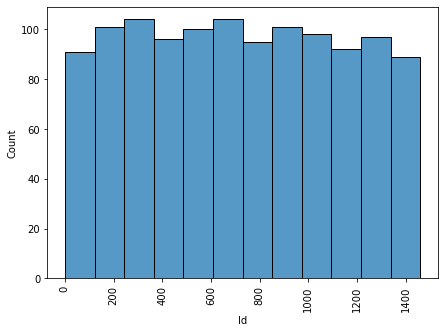



The Value Counts for the attribute "MSSubClass" is
 20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

The Histogram Diagram for the attribute "MSSubClass" is
 AxesSubplot(0.125,0.125;0.775x0.755)


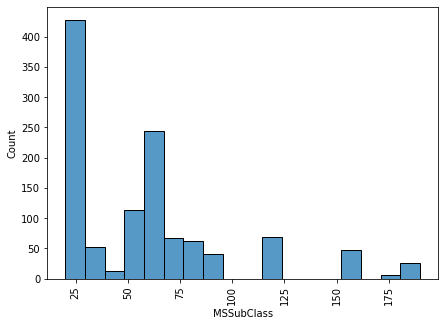



The Value Counts for the attribute "MSZoning" is
 RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

The Histogram Diagram for the attribute "MSZoning" is
 AxesSubplot(0.125,0.125;0.775x0.755)


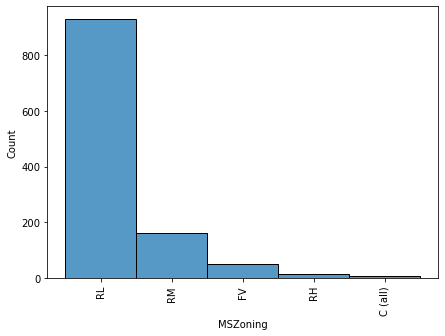



The Value Counts for the attribute "LotFrontage" is
 60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64

The Histogram Diagram for the attribute "LotFrontage" is
 AxesSubplot(0.125,0.125;0.775x0.755)


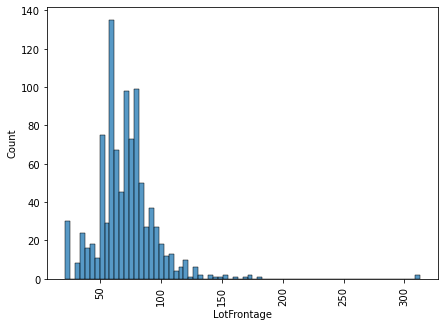



The Value Counts for the attribute "LotArea" is
 9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64

The Histogram Diagram for the attribute "LotArea" is
 AxesSubplot(0.125,0.125;0.775x0.755)


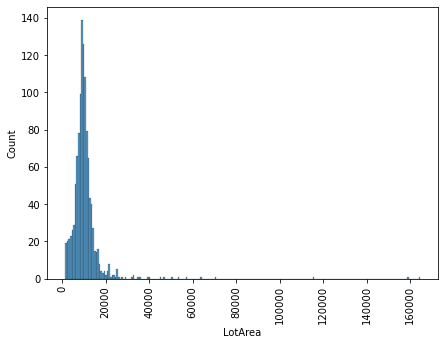



The Value Counts for the attribute "Street" is
 Pave    1164
Grvl       4
Name: Street, dtype: int64

The Histogram Diagram for the attribute "Street" is
 AxesSubplot(0.125,0.125;0.775x0.755)


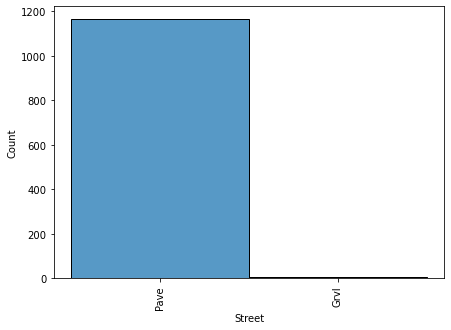



The Value Counts for the attribute "Alley" is
 Grvl    41
Pave    36
Name: Alley, dtype: int64

The Histogram Diagram for the attribute "Alley" is
 AxesSubplot(0.125,0.125;0.775x0.755)


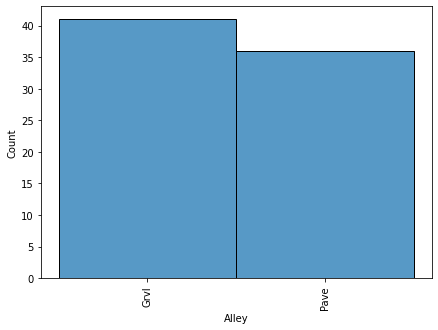



The Value Counts for the attribute "LotShape" is
 Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

The Histogram Diagram for the attribute "LotShape" is
 AxesSubplot(0.125,0.125;0.775x0.755)


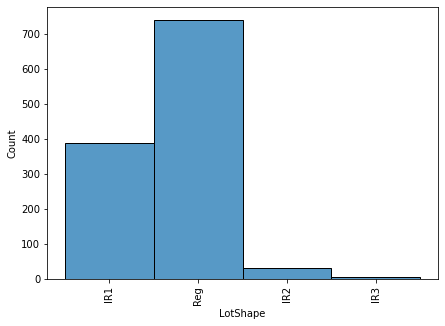



The Value Counts for the attribute "LandContour" is
 Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

The Histogram Diagram for the attribute "LandContour" is
 AxesSubplot(0.125,0.125;0.775x0.755)


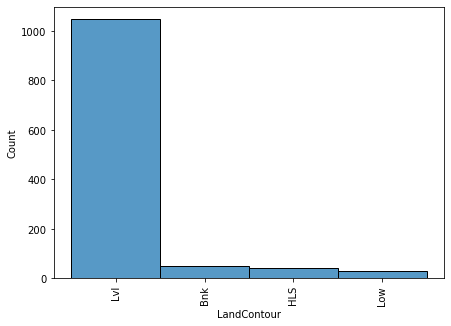



The Value Counts for the attribute "Utilities" is
 AllPub    1168
Name: Utilities, dtype: int64

The Histogram Diagram for the attribute "Utilities" is
 AxesSubplot(0.125,0.125;0.775x0.755)


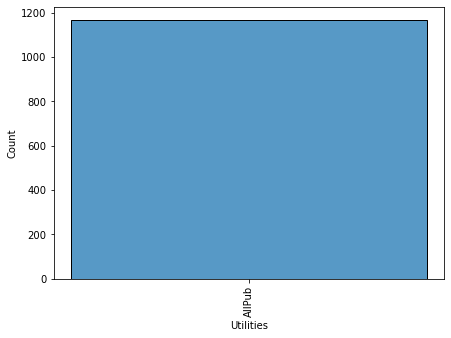



The Value Counts for the attribute "LotConfig" is
 Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

The Histogram Diagram for the attribute "LotConfig" is
 AxesSubplot(0.125,0.125;0.775x0.755)


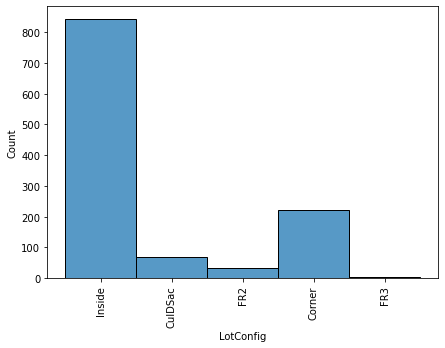



The Value Counts for the attribute "LandSlope" is
 Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

The Histogram Diagram for the attribute "LandSlope" is
 AxesSubplot(0.125,0.125;0.775x0.755)


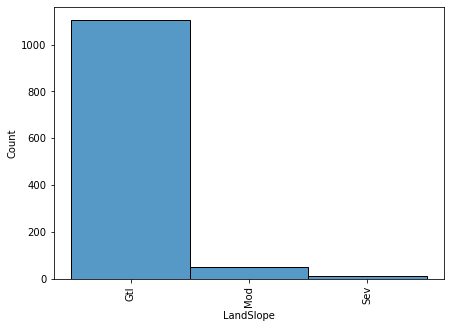



The Value Counts for the attribute "Neighborhood" is
 NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

The Histogram Diagram for the attribute "Neighborhood" is
 AxesSubplot(0.125,0.125;0.775x0.755)


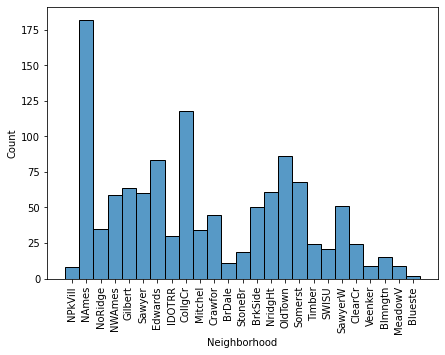



The Value Counts for the attribute "Condition1" is
 Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

The Histogram Diagram for the attribute "Condition1" is
 AxesSubplot(0.125,0.125;0.775x0.755)


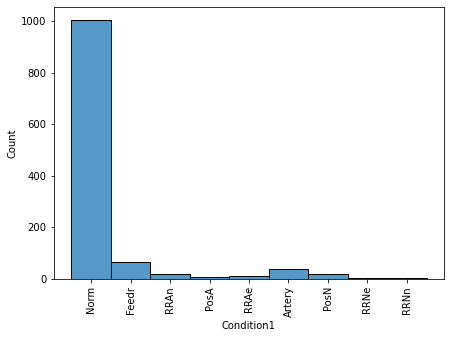



The Value Counts for the attribute "Condition2" is
 Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

The Histogram Diagram for the attribute "Condition2" is
 AxesSubplot(0.125,0.125;0.775x0.755)


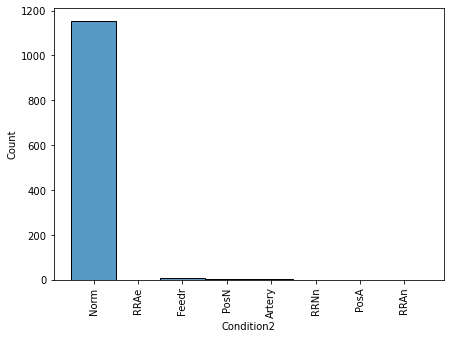



The Value Counts for the attribute "BldgType" is
 1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

The Histogram Diagram for the attribute "BldgType" is
 AxesSubplot(0.125,0.125;0.775x0.755)


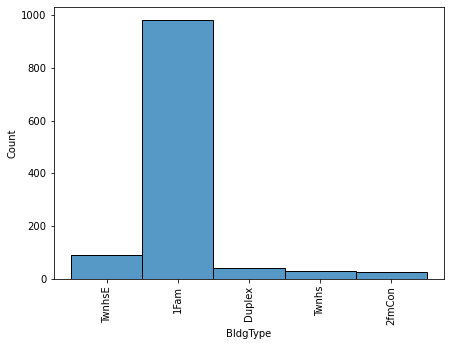



The Value Counts for the attribute "HouseStyle" is
 1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

The Histogram Diagram for the attribute "HouseStyle" is
 AxesSubplot(0.125,0.125;0.775x0.755)


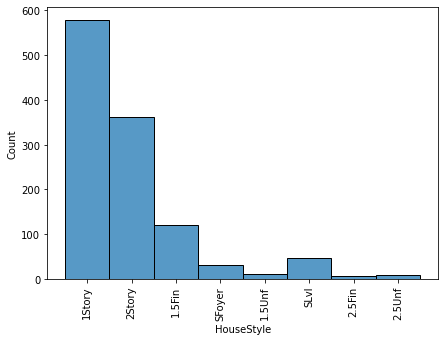



The Value Counts for the attribute "OverallQual" is
 5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

The Histogram Diagram for the attribute "OverallQual" is
 AxesSubplot(0.125,0.125;0.775x0.755)


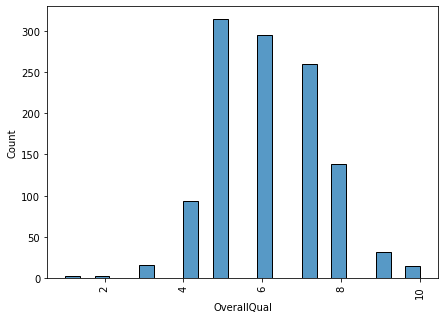



The Value Counts for the attribute "OverallCond" is
 5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64

The Histogram Diagram for the attribute "OverallCond" is
 AxesSubplot(0.125,0.125;0.775x0.755)


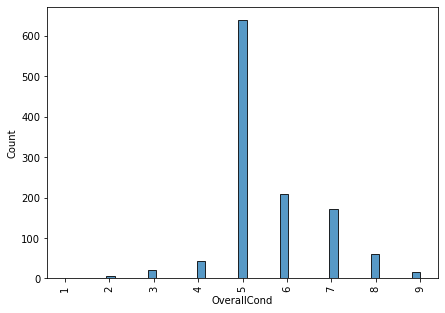



The Value Counts for the attribute "YearBuilt" is
 2006    57
2005    51
2007    41
2004    37
2003    33
        ..
1927     1
1911     1
2010     1
1892     1
1913     1
Name: YearBuilt, Length: 110, dtype: int64

The Histogram Diagram for the attribute "YearBuilt" is
 AxesSubplot(0.125,0.125;0.775x0.755)


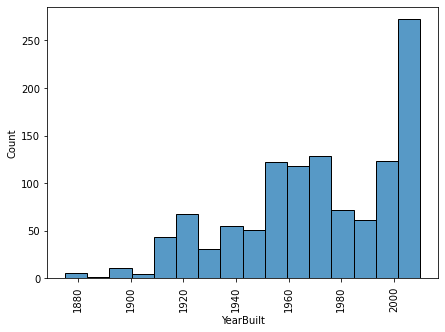



The Value Counts for the attribute "YearRemodAdd" is
 1950    146
2006     82
2007     64
2005     57
2004     46
       ... 
1984      5
1951      4
1983      4
1952      4
1974      4
Name: YearRemodAdd, Length: 61, dtype: int64

The Histogram Diagram for the attribute "YearRemodAdd" is
 AxesSubplot(0.125,0.125;0.775x0.755)


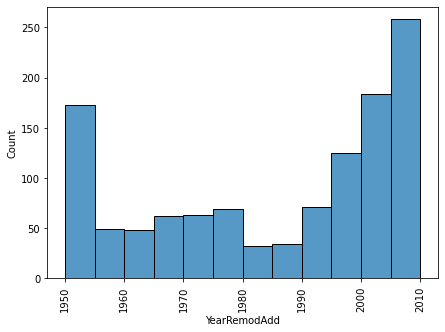



The Value Counts for the attribute "RoofStyle" is
 Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

The Histogram Diagram for the attribute "RoofStyle" is
 AxesSubplot(0.125,0.125;0.775x0.755)


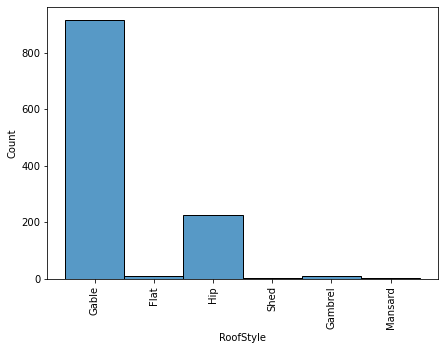



The Value Counts for the attribute "RoofMatl" is
 CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

The Histogram Diagram for the attribute "RoofMatl" is
 AxesSubplot(0.125,0.125;0.775x0.755)


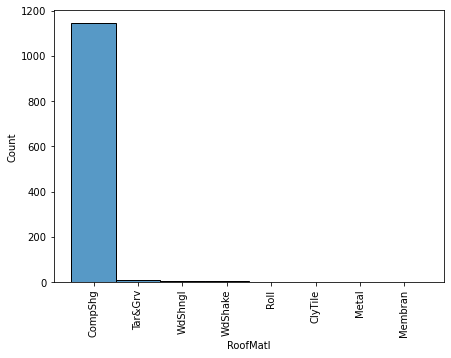



The Value Counts for the attribute "Exterior1st" is
 VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64

The Histogram Diagram for the attribute "Exterior1st" is
 AxesSubplot(0.125,0.125;0.775x0.755)


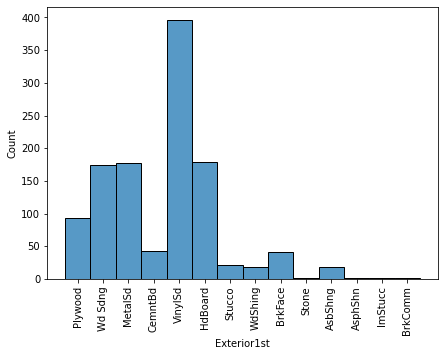



The Value Counts for the attribute "Exterior2nd" is
 VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64

The Histogram Diagram for the attribute "Exterior2nd" is
 AxesSubplot(0.125,0.125;0.775x0.755)


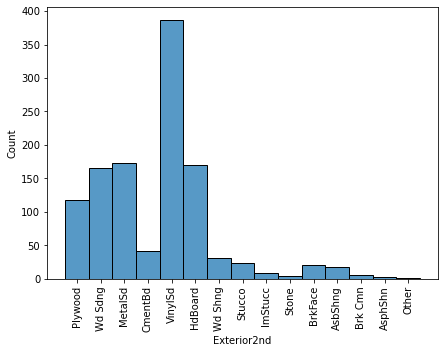



The Value Counts for the attribute "MasVnrType" is
 None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

The Histogram Diagram for the attribute "MasVnrType" is
 AxesSubplot(0.125,0.125;0.775x0.755)


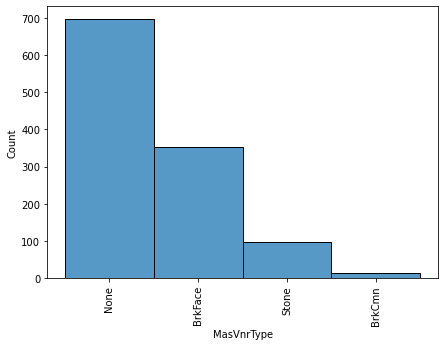



The Value Counts for the attribute "MasVnrArea" is
 0.0      692
72.0       7
180.0      6
120.0      6
106.0      5
        ... 
653.0      1
975.0      1
226.0      1
204.0      1
31.0       1
Name: MasVnrArea, Length: 283, dtype: int64

The Histogram Diagram for the attribute "MasVnrArea" is
 AxesSubplot(0.125,0.125;0.775x0.755)


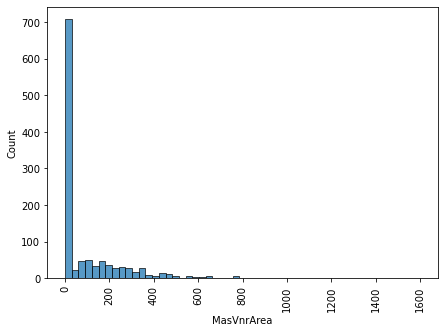



The Value Counts for the attribute "ExterQual" is
 TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

The Histogram Diagram for the attribute "ExterQual" is
 AxesSubplot(0.125,0.125;0.775x0.755)


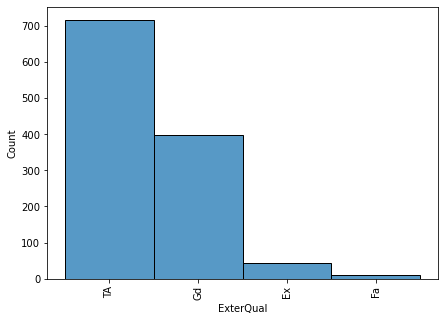



The Value Counts for the attribute "ExterCond" is
 TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64

The Histogram Diagram for the attribute "ExterCond" is
 AxesSubplot(0.125,0.125;0.775x0.755)


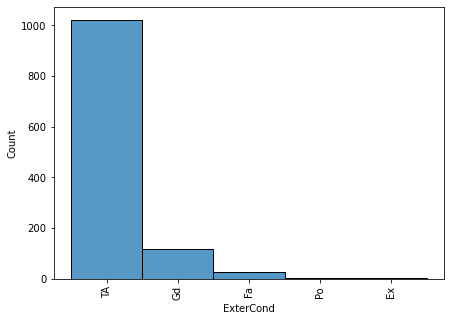



The Value Counts for the attribute "Foundation" is
 CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

The Histogram Diagram for the attribute "Foundation" is
 AxesSubplot(0.125,0.125;0.775x0.755)


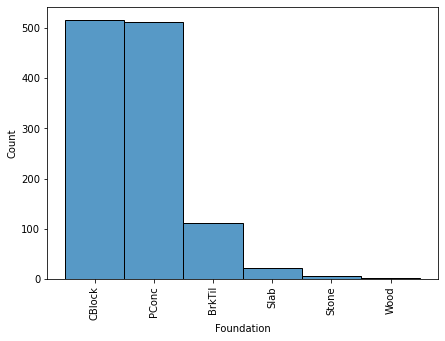



The Value Counts for the attribute "BsmtQual" is
 TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

The Histogram Diagram for the attribute "BsmtQual" is
 AxesSubplot(0.125,0.125;0.775x0.755)


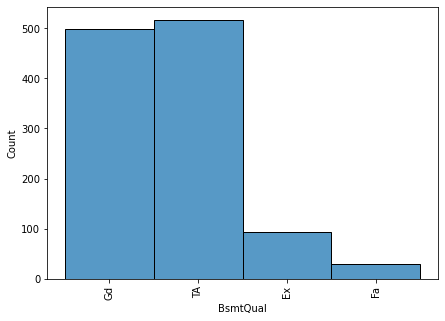



The Value Counts for the attribute "BsmtCond" is
 TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

The Histogram Diagram for the attribute "BsmtCond" is
 AxesSubplot(0.125,0.125;0.775x0.755)


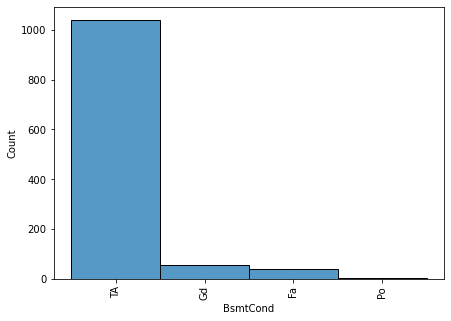



The Value Counts for the attribute "BsmtExposure" is
 No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

The Histogram Diagram for the attribute "BsmtExposure" is
 AxesSubplot(0.125,0.125;0.775x0.755)


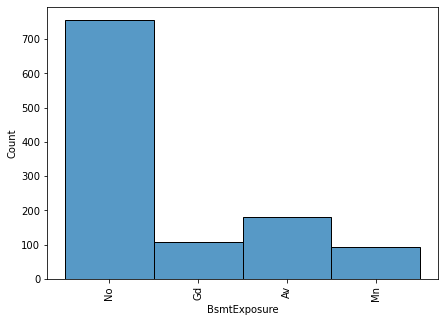



The Value Counts for the attribute "BsmtFinType1" is
 Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

The Histogram Diagram for the attribute "BsmtFinType1" is
 AxesSubplot(0.125,0.125;0.775x0.755)


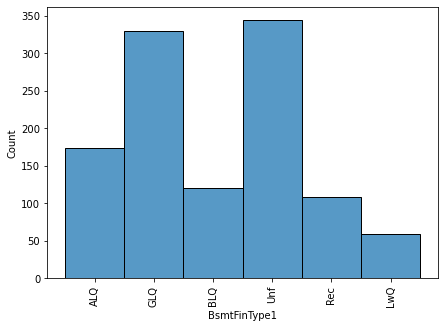



The Value Counts for the attribute "BsmtFinSF1" is
 0      375
24      10
16       8
20       5
616      5
      ... 
586      1
412      1
416      1
602      1
457      1
Name: BsmtFinSF1, Length: 551, dtype: int64

The Histogram Diagram for the attribute "BsmtFinSF1" is
 AxesSubplot(0.125,0.125;0.775x0.755)


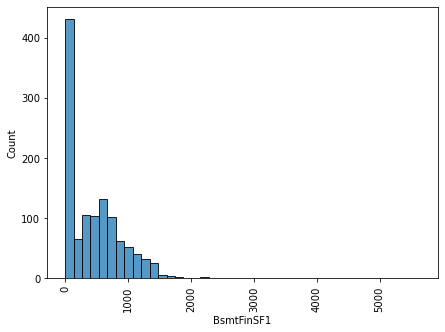



The Value Counts for the attribute "BsmtFinType2" is
 Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

The Histogram Diagram for the attribute "BsmtFinType2" is
 AxesSubplot(0.125,0.125;0.775x0.755)


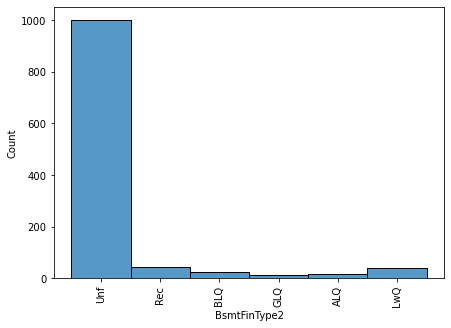



The Value Counts for the attribute "BsmtFinSF2" is
 0      1032
180       5
41        2
147       2
117       2
       ... 
531       1
40        1
121       1
608       1
546       1
Name: BsmtFinSF2, Length: 122, dtype: int64

The Histogram Diagram for the attribute "BsmtFinSF2" is
 AxesSubplot(0.125,0.125;0.775x0.755)


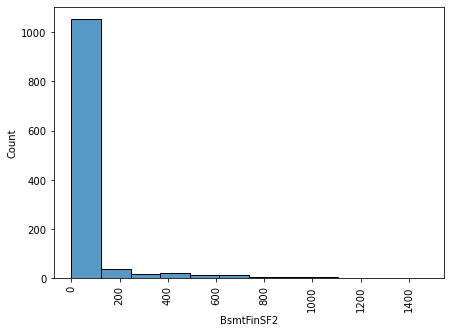



The Value Counts for the attribute "BsmtUnfSF" is
 0      97
728     8
440     6
600     6
300     6
       ..
323     1
487     1
349     1
793     1
649     1
Name: BsmtUnfSF, Length: 681, dtype: int64

The Histogram Diagram for the attribute "BsmtUnfSF" is
 AxesSubplot(0.125,0.125;0.775x0.755)


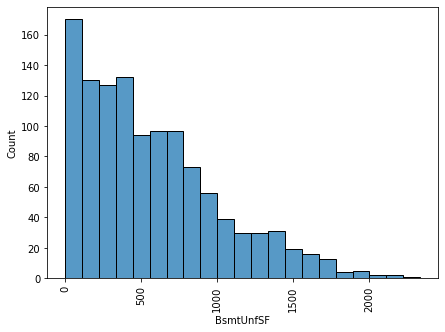



The Value Counts for the attribute "TotalBsmtSF" is
 0       30
864     28
912     13
672     13
816     12
        ..
319      1
1318     1
1198     1
1251     1
1582     1
Name: TotalBsmtSF, Length: 636, dtype: int64

The Histogram Diagram for the attribute "TotalBsmtSF" is
 AxesSubplot(0.125,0.125;0.775x0.755)


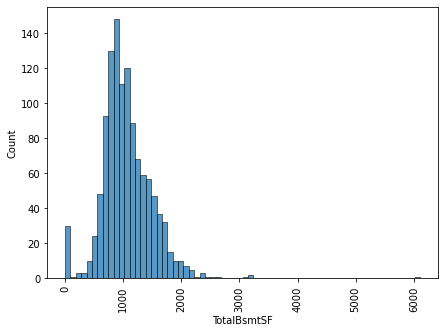



The Value Counts for the attribute "Heating" is
 GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64

The Histogram Diagram for the attribute "Heating" is
 AxesSubplot(0.125,0.125;0.775x0.755)


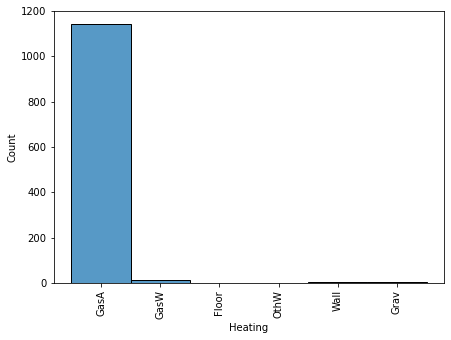



The Value Counts for the attribute "HeatingQC" is
 Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

The Histogram Diagram for the attribute "HeatingQC" is
 AxesSubplot(0.125,0.125;0.775x0.755)


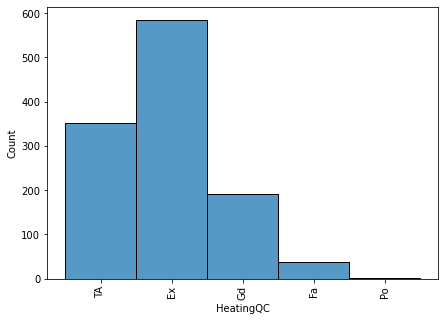



The Value Counts for the attribute "CentralAir" is
 Y    1090
N      78
Name: CentralAir, dtype: int64

The Histogram Diagram for the attribute "CentralAir" is
 AxesSubplot(0.125,0.125;0.775x0.755)


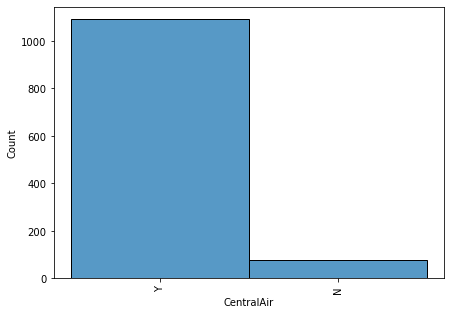



The Value Counts for the attribute "Electrical" is
 SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64

The Histogram Diagram for the attribute "Electrical" is
 AxesSubplot(0.125,0.125;0.775x0.755)


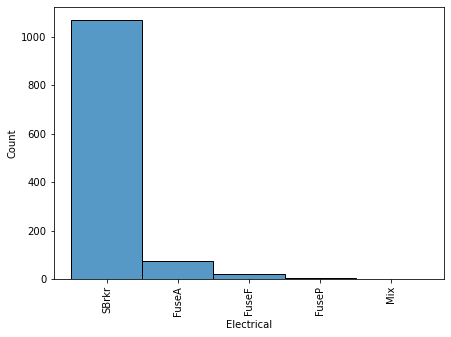



The Value Counts for the attribute "1stFlrSF" is
 864     19
1040    13
912     12
894     10
848      9
        ..
1516     1
813      1
2633     1
1015     1
807      1
Name: 1stFlrSF, Length: 669, dtype: int64

The Histogram Diagram for the attribute "1stFlrSF" is
 AxesSubplot(0.125,0.125;0.775x0.755)


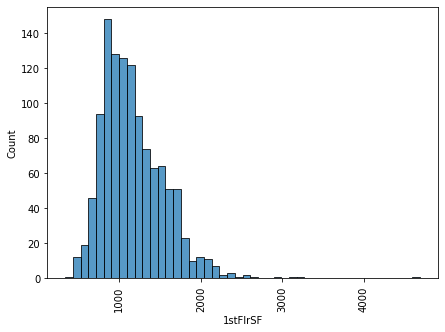



The Value Counts for the attribute "2ndFlrSF" is
 0       663
728       9
504       7
600       6
672       6
       ... 
1066      1
467       1
1038      1
881       1
978       1
Name: 2ndFlrSF, Length: 351, dtype: int64

The Histogram Diagram for the attribute "2ndFlrSF" is
 AxesSubplot(0.125,0.125;0.775x0.755)


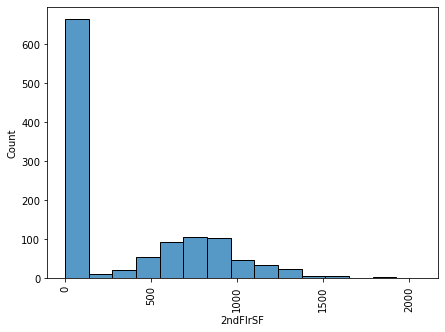



The Value Counts for the attribute "LowQualFinSF" is
 0      1145
80        3
360       2
384       1
420       1
473       1
371       1
232       1
513       1
481       1
515       1
514       1
120       1
528       1
572       1
144       1
234       1
390       1
156       1
53        1
392       1
Name: LowQualFinSF, dtype: int64

The Histogram Diagram for the attribute "LowQualFinSF" is
 AxesSubplot(0.125,0.125;0.775x0.755)


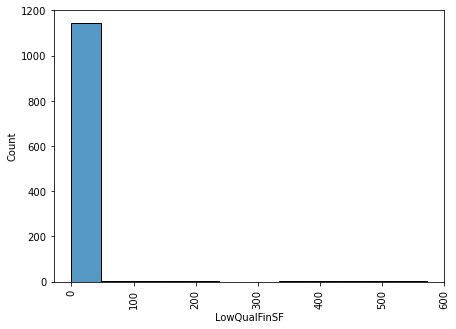



The Value Counts for the attribute "GrLivArea" is
 864     16
1040    11
894     10
1456     9
1200     8
        ..
1610     1
2576     1
2810     1
1691     1
1509     1
Name: GrLivArea, Length: 746, dtype: int64

The Histogram Diagram for the attribute "GrLivArea" is
 AxesSubplot(0.125,0.125;0.775x0.755)


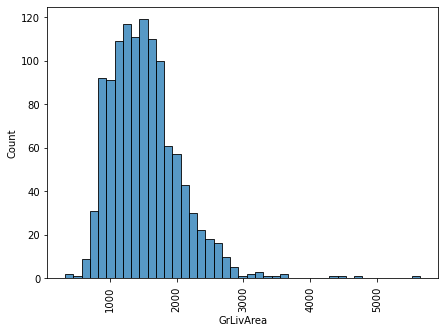



The Value Counts for the attribute "BsmtFullBath" is
 0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64

The Histogram Diagram for the attribute "BsmtFullBath" is
 AxesSubplot(0.125,0.125;0.775x0.755)


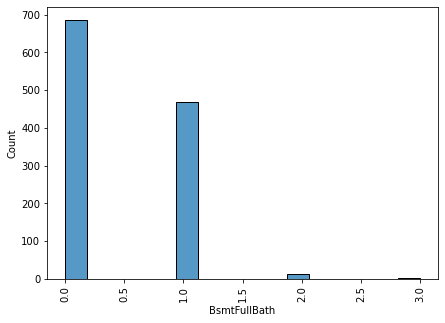



The Value Counts for the attribute "BsmtHalfBath" is
 0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64

The Histogram Diagram for the attribute "BsmtHalfBath" is
 AxesSubplot(0.125,0.125;0.775x0.755)


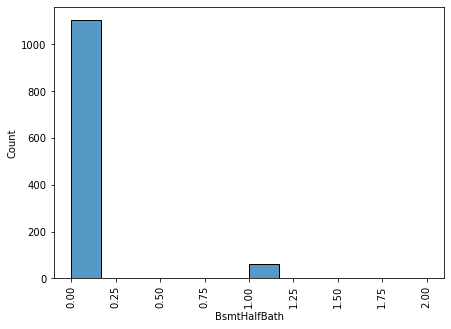



The Value Counts for the attribute "FullBath" is
 2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64

The Histogram Diagram for the attribute "FullBath" is
 AxesSubplot(0.125,0.125;0.775x0.755)


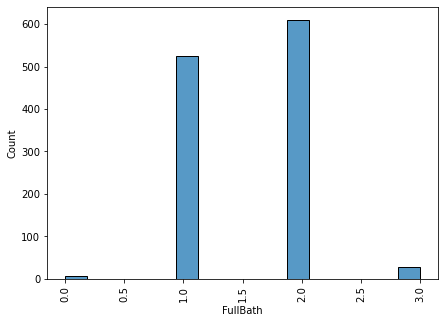



The Value Counts for the attribute "HalfBath" is
 0    724
1    434
2     10
Name: HalfBath, dtype: int64

The Histogram Diagram for the attribute "HalfBath" is
 AxesSubplot(0.125,0.125;0.775x0.755)


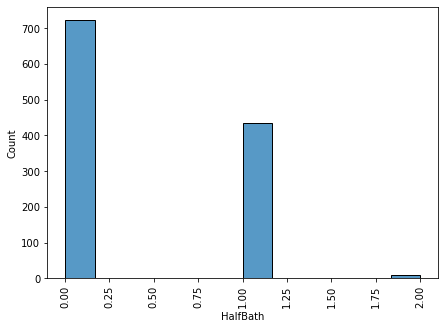



The Value Counts for the attribute "BedroomAbvGr" is
 3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64

The Histogram Diagram for the attribute "BedroomAbvGr" is
 AxesSubplot(0.125,0.125;0.775x0.755)


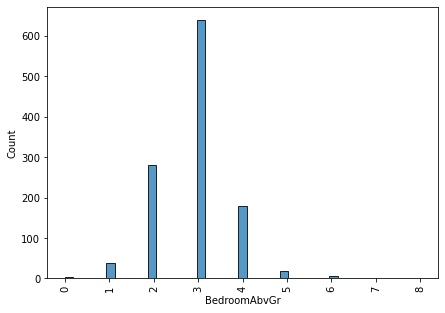



The Value Counts for the attribute "KitchenAbvGr" is
 1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64

The Histogram Diagram for the attribute "KitchenAbvGr" is
 AxesSubplot(0.125,0.125;0.775x0.755)


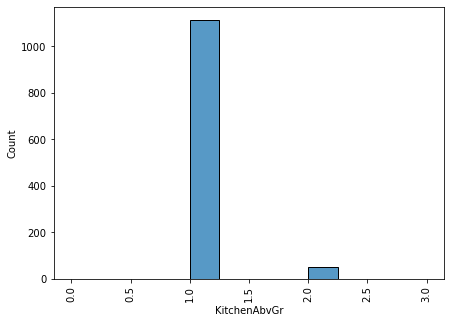



The Value Counts for the attribute "KitchenQual" is
 TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64

The Histogram Diagram for the attribute "KitchenQual" is
 AxesSubplot(0.125,0.125;0.775x0.755)


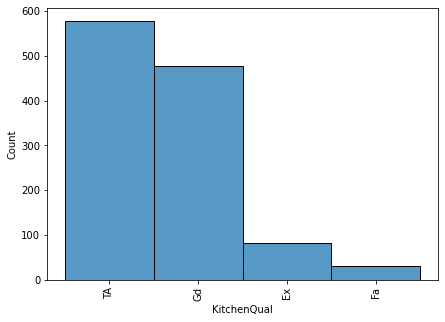



The Value Counts for the attribute "TotRmsAbvGrd" is
 6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

The Histogram Diagram for the attribute "TotRmsAbvGrd" is
 AxesSubplot(0.125,0.125;0.775x0.755)


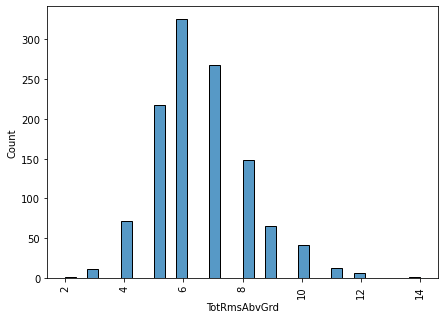



The Value Counts for the attribute "Functional" is
 Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

The Histogram Diagram for the attribute "Functional" is
 AxesSubplot(0.125,0.125;0.775x0.755)


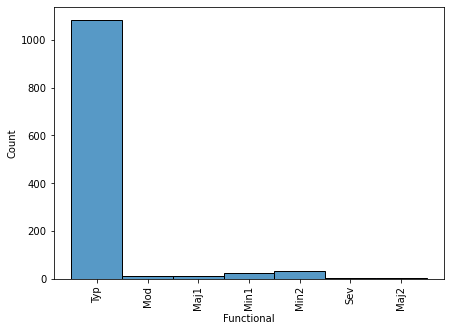



The Value Counts for the attribute "Fireplaces" is
 0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

The Histogram Diagram for the attribute "Fireplaces" is
 AxesSubplot(0.125,0.125;0.775x0.755)


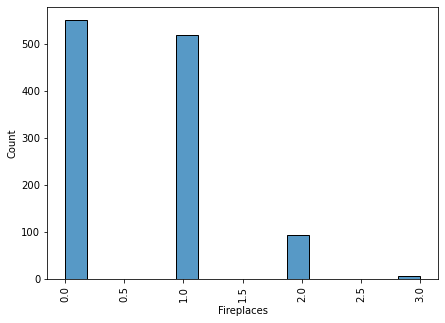



The Value Counts for the attribute "FireplaceQu" is
 Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

The Histogram Diagram for the attribute "FireplaceQu" is
 AxesSubplot(0.125,0.125;0.775x0.755)


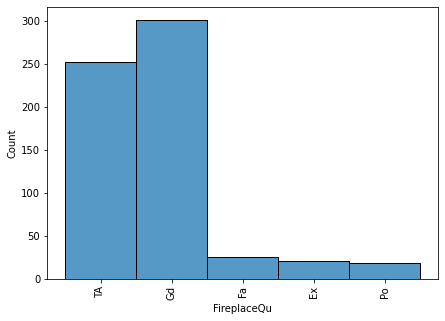



The Value Counts for the attribute "GarageType" is
 Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

The Histogram Diagram for the attribute "GarageType" is
 AxesSubplot(0.125,0.125;0.775x0.755)


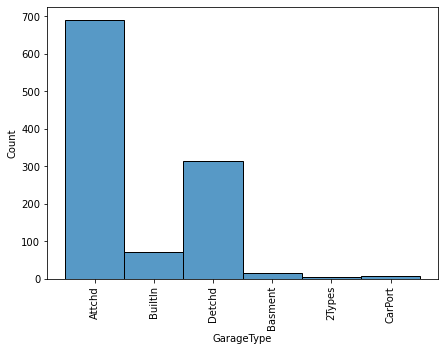



The Value Counts for the attribute "GarageYrBlt" is
 2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
          ..
1900.0     1
1927.0     1
1908.0     1
1933.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

The Histogram Diagram for the attribute "GarageYrBlt" is
 AxesSubplot(0.125,0.125;0.775x0.755)


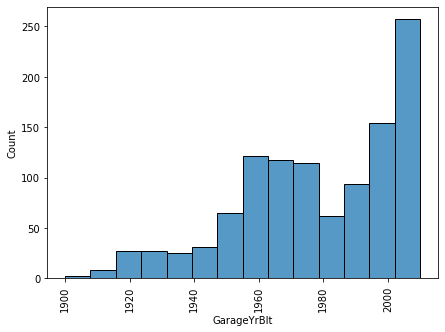



The Value Counts for the attribute "GarageFinish" is
 Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

The Histogram Diagram for the attribute "GarageFinish" is
 AxesSubplot(0.125,0.125;0.775x0.755)


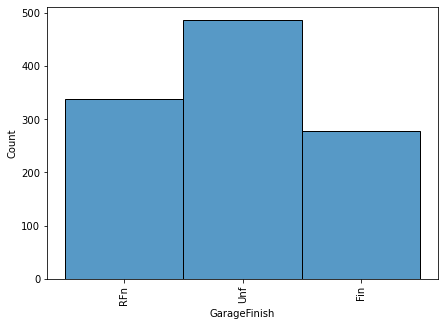



The Value Counts for the attribute "GarageCars" is
 2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64

The Histogram Diagram for the attribute "GarageCars" is
 AxesSubplot(0.125,0.125;0.775x0.755)


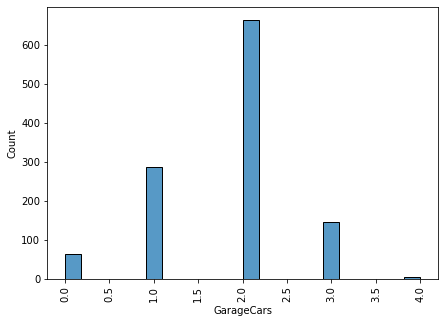



The Value Counts for the attribute "GarageArea" is
 0      64
440    44
576    39
240    31
528    26
       ..
748     1
433     1
818     1
604     1
250     1
Name: GarageArea, Length: 392, dtype: int64

The Histogram Diagram for the attribute "GarageArea" is
 AxesSubplot(0.125,0.125;0.775x0.755)


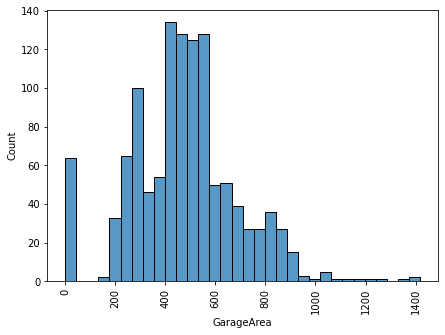



The Value Counts for the attribute "GarageQual" is
 TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

The Histogram Diagram for the attribute "GarageQual" is
 AxesSubplot(0.125,0.125;0.775x0.755)


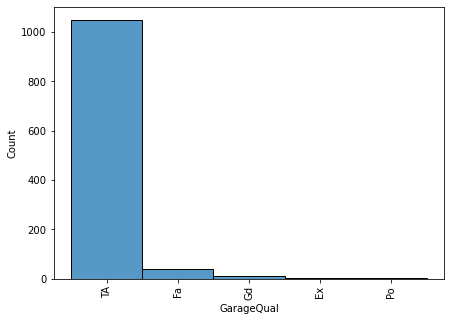



The Value Counts for the attribute "GarageCond" is
 TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

The Histogram Diagram for the attribute "GarageCond" is
 AxesSubplot(0.125,0.125;0.775x0.755)


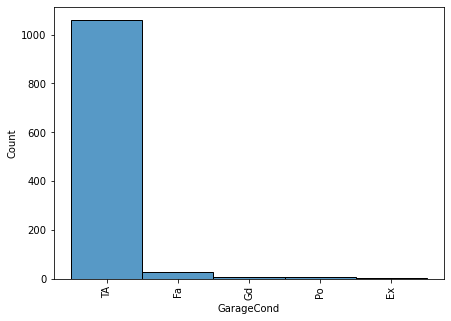



The Value Counts for the attribute "PavedDrive" is
 Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64

The Histogram Diagram for the attribute "PavedDrive" is
 AxesSubplot(0.125,0.125;0.775x0.755)


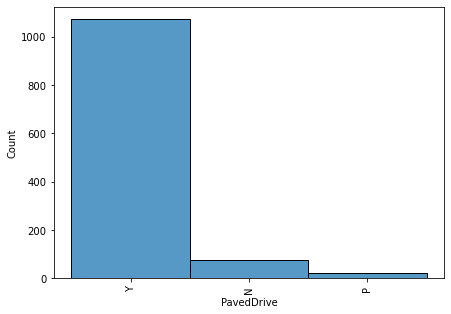



The Value Counts for the attribute "WoodDeckSF" is
 0      603
144     29
192     28
100     26
120     25
      ... 
278      1
70       1
351      1
314      1
87       1
Name: WoodDeckSF, Length: 244, dtype: int64

The Histogram Diagram for the attribute "WoodDeckSF" is
 AxesSubplot(0.125,0.125;0.775x0.755)


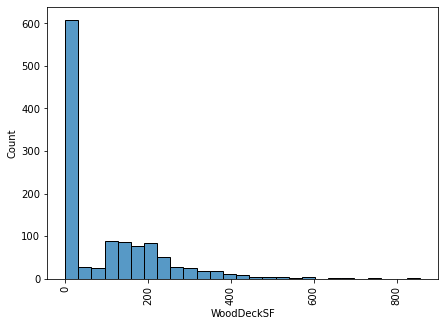



The Value Counts for the attribute "OpenPorchSF" is
 0      531
36      24
48      18
20      17
39      14
      ... 
406      1
176      1
137      1
135      1
15       1
Name: OpenPorchSF, Length: 176, dtype: int64

The Histogram Diagram for the attribute "OpenPorchSF" is
 AxesSubplot(0.125,0.125;0.775x0.755)


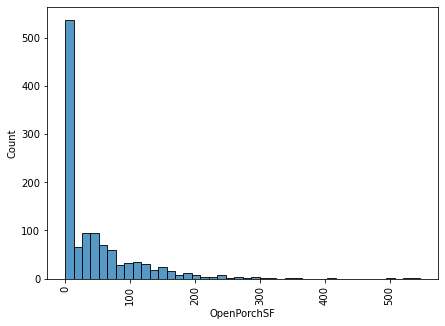



The Value Counts for the attribute "EnclosedPorch" is
 0      999
112     13
96       6
192      5
216      5
      ... 
80       1
242      1
136      1
272      1
172      1
Name: EnclosedPorch, Length: 106, dtype: int64

The Histogram Diagram for the attribute "EnclosedPorch" is
 AxesSubplot(0.125,0.125;0.775x0.755)


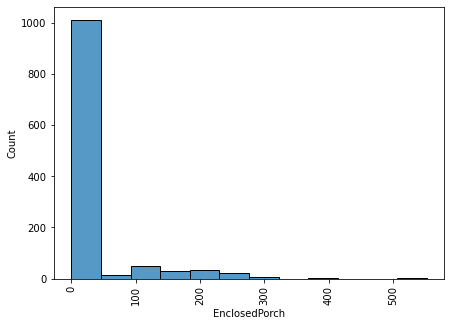



The Value Counts for the attribute "3SsnPorch" is
 0      1146
168       3
216       2
180       2
144       2
153       1
23        1
304       1
130       1
182       1
290       1
238       1
245       1
162       1
96        1
140       1
196       1
508       1
Name: 3SsnPorch, dtype: int64

The Histogram Diagram for the attribute "3SsnPorch" is
 AxesSubplot(0.125,0.125;0.775x0.755)


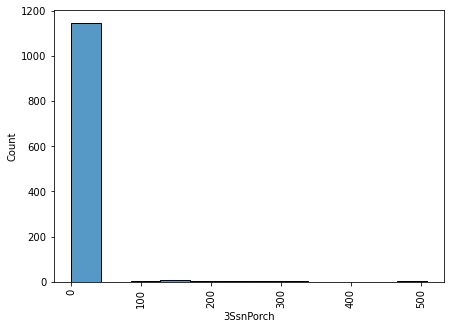



The Value Counts for the attribute "ScreenPorch" is
 0      1073
192       5
224       5
189       4
180       3
       ... 
273       1
99        1
122       1
80        1
130       1
Name: ScreenPorch, Length: 65, dtype: int64

The Histogram Diagram for the attribute "ScreenPorch" is
 AxesSubplot(0.125,0.125;0.775x0.755)


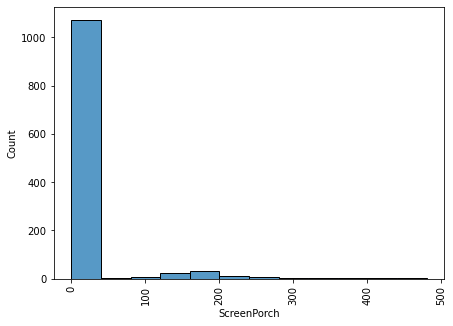



The Value Counts for the attribute "PoolArea" is
 0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64

The Histogram Diagram for the attribute "PoolArea" is
 AxesSubplot(0.125,0.125;0.775x0.755)


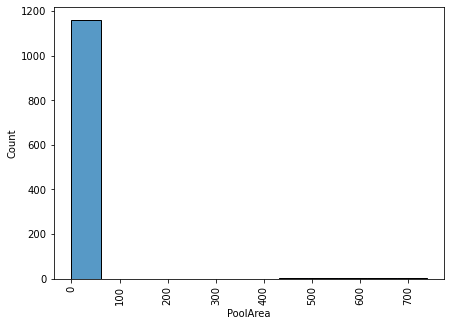



The Value Counts for the attribute "PoolQC" is
 Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

The Histogram Diagram for the attribute "PoolQC" is
 AxesSubplot(0.125,0.125;0.775x0.755)


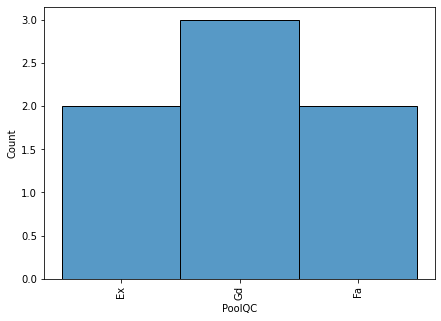



The Value Counts for the attribute "Fence" is
 MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

The Histogram Diagram for the attribute "Fence" is
 AxesSubplot(0.125,0.125;0.775x0.755)


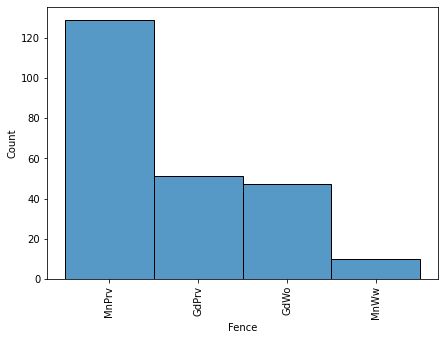



The Value Counts for the attribute "MiscFeature" is
 Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

The Histogram Diagram for the attribute "MiscFeature" is
 AxesSubplot(0.125,0.125;0.775x0.755)


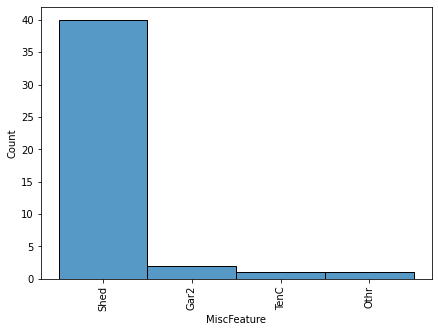



The Value Counts for the attribute "MiscVal" is
 0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64

The Histogram Diagram for the attribute "MiscVal" is
 AxesSubplot(0.125,0.125;0.775x0.755)


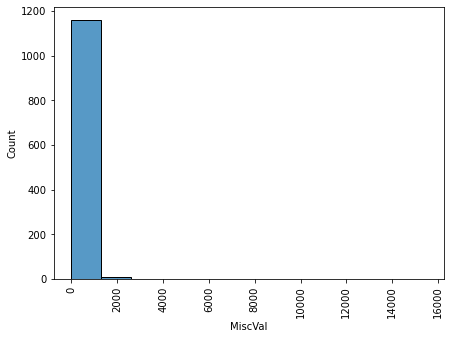



The Value Counts for the attribute "MoSold" is
 6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64

The Histogram Diagram for the attribute "MoSold" is
 AxesSubplot(0.125,0.125;0.775x0.755)


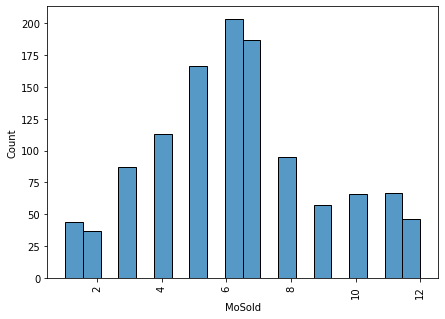



The Value Counts for the attribute "YrSold" is
 2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64

The Histogram Diagram for the attribute "YrSold" is
 AxesSubplot(0.125,0.125;0.775x0.755)


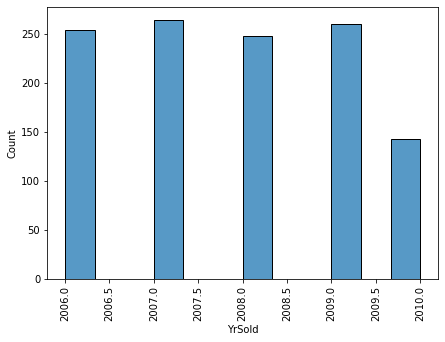



The Value Counts for the attribute "SaleType" is
 WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64

The Histogram Diagram for the attribute "SaleType" is
 AxesSubplot(0.125,0.125;0.775x0.755)


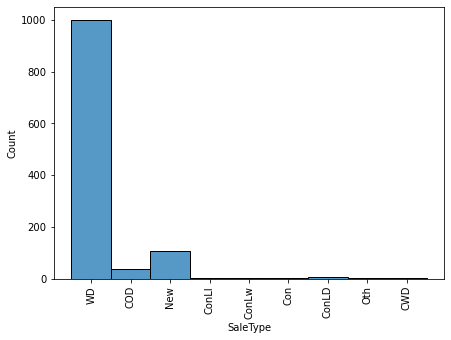



The Value Counts for the attribute "SaleCondition" is
 Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

The Histogram Diagram for the attribute "SaleCondition" is
 AxesSubplot(0.125,0.125;0.775x0.755)


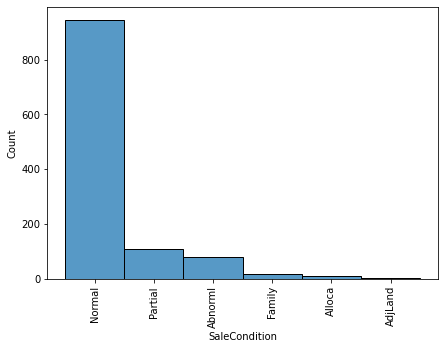



The Value Counts for the attribute "SalePrice" is
 140000    18
135000    16
155000    12
139000    11
160000    11
          ..
203000     1
144900     1
37900      1
178400     1
183200     1
Name: SalePrice, Length: 581, dtype: int64

The Histogram Diagram for the attribute "SalePrice" is
 AxesSubplot(0.125,0.125;0.775x0.755)


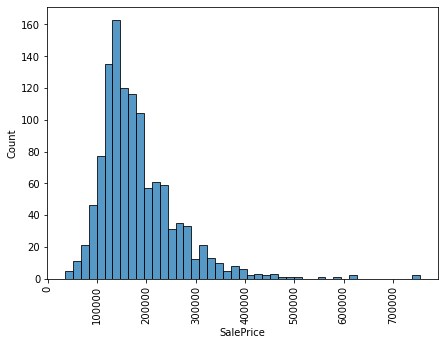

In [28]:
for i in df_train:
    print(f'The Value Counts for the attribute "{i}" is\n {df_train[i].value_counts()}')
    plt.figure(figsize=(7,5))
    print(f'\nThe Histogram Diagram for the attribute "{i}" is\n {sns.histplot(df_train[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

#### 2. Scatter Plot

The Scatter Plot for the attribute "SalePrice" & "Id" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


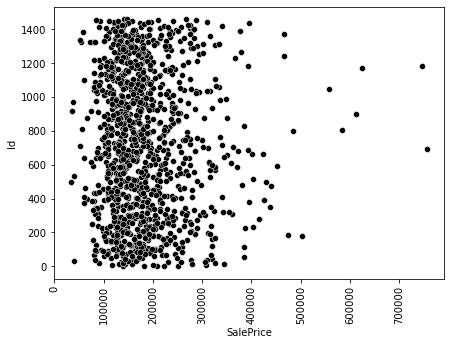



The Scatter Plot for the attribute "SalePrice" & "MSSubClass" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


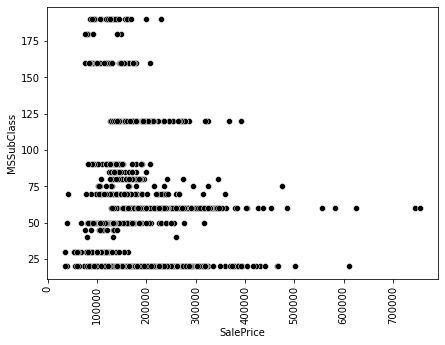



The Scatter Plot for the attribute "SalePrice" & "MSZoning" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


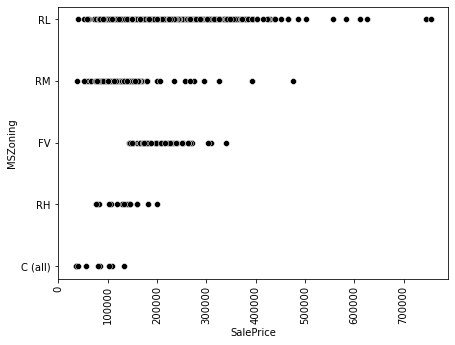



The Scatter Plot for the attribute "SalePrice" & "LotFrontage" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


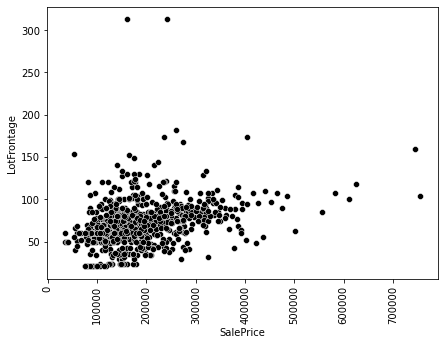



The Scatter Plot for the attribute "SalePrice" & "LotArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


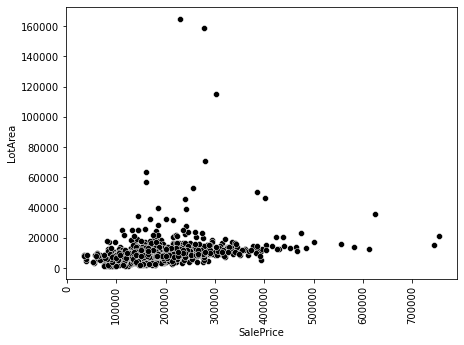



The Scatter Plot for the attribute "SalePrice" & "Street" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


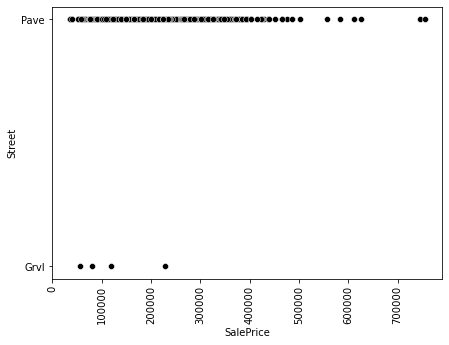



The Scatter Plot for the attribute "SalePrice" & "Alley" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


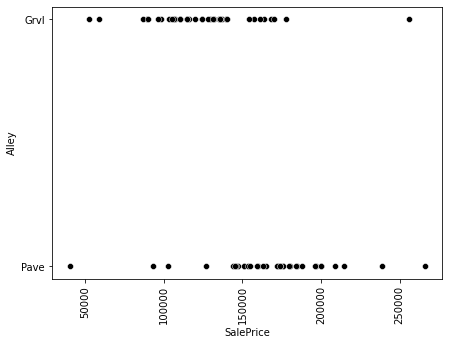



The Scatter Plot for the attribute "SalePrice" & "LotShape" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


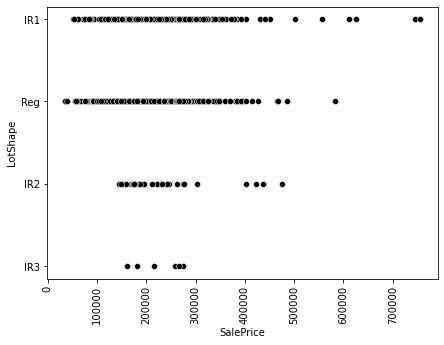



The Scatter Plot for the attribute "SalePrice" & "LandContour" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


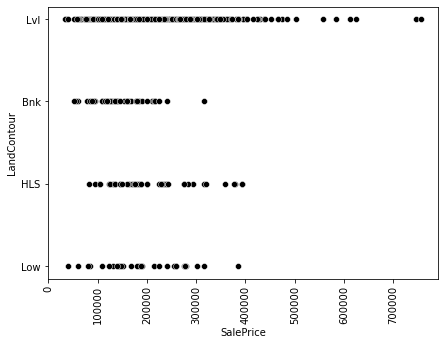



The Scatter Plot for the attribute "SalePrice" & "Utilities" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


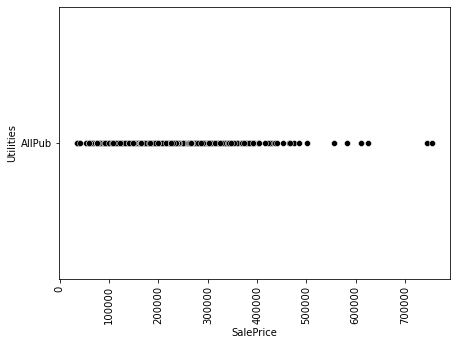



The Scatter Plot for the attribute "SalePrice" & "LotConfig" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


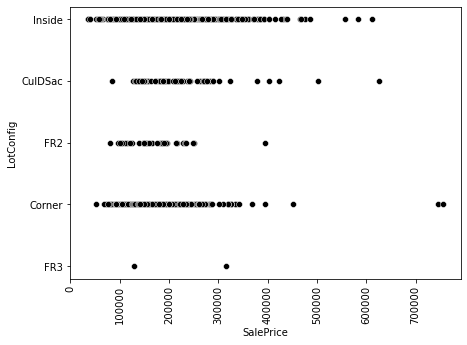



The Scatter Plot for the attribute "SalePrice" & "LandSlope" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


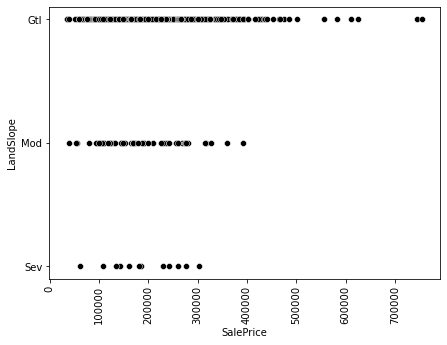



The Scatter Plot for the attribute "SalePrice" & "Neighborhood" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


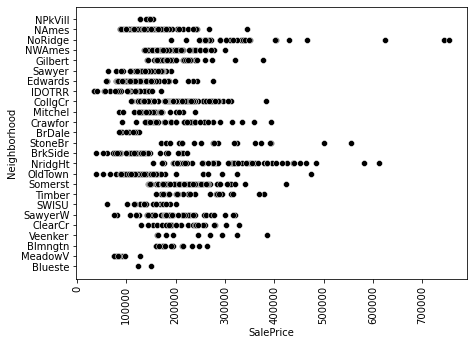



The Scatter Plot for the attribute "SalePrice" & "Condition1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


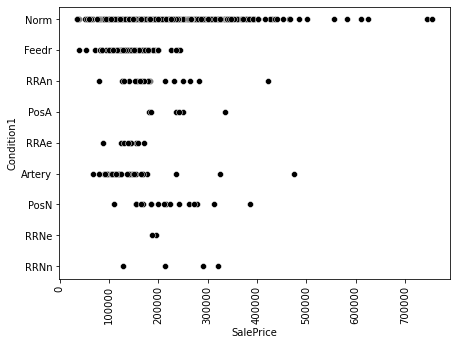



The Scatter Plot for the attribute "SalePrice" & "Condition2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


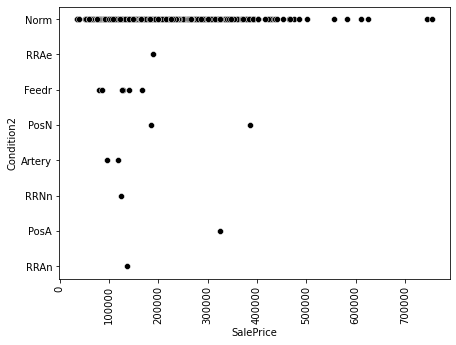



The Scatter Plot for the attribute "SalePrice" & "BldgType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


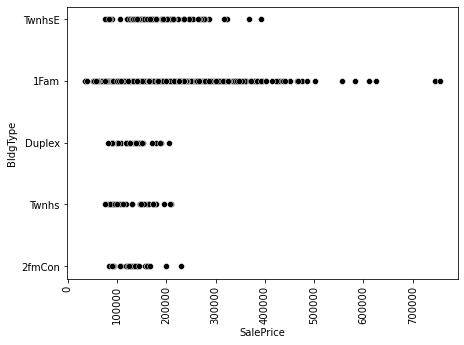



The Scatter Plot for the attribute "SalePrice" & "HouseStyle" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


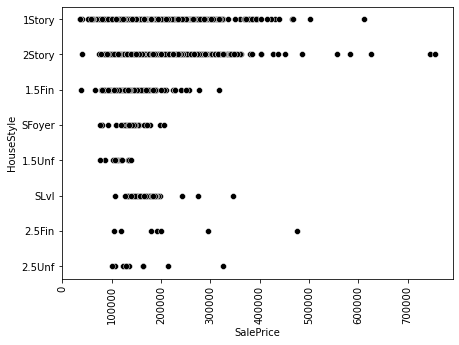



The Scatter Plot for the attribute "SalePrice" & "OverallQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


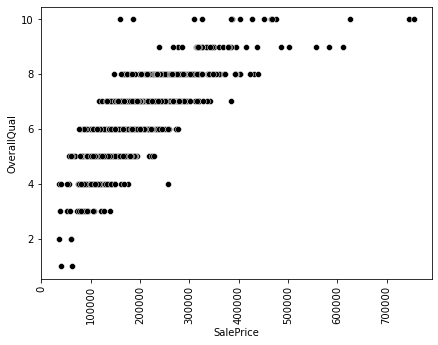



The Scatter Plot for the attribute "SalePrice" & "OverallCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


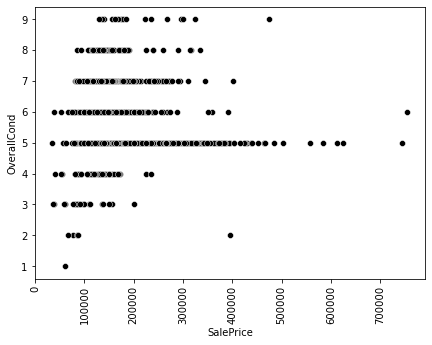



The Scatter Plot for the attribute "SalePrice" & "YearBuilt" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


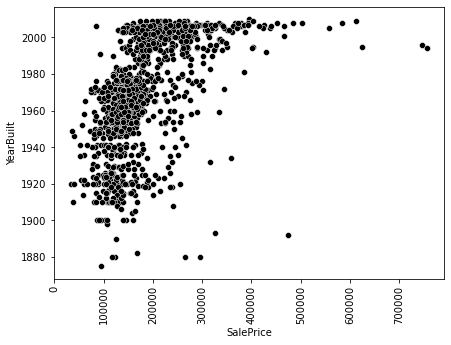



The Scatter Plot for the attribute "SalePrice" & "YearRemodAdd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


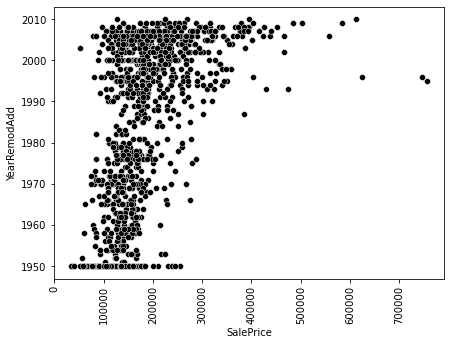



The Scatter Plot for the attribute "SalePrice" & "RoofStyle" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


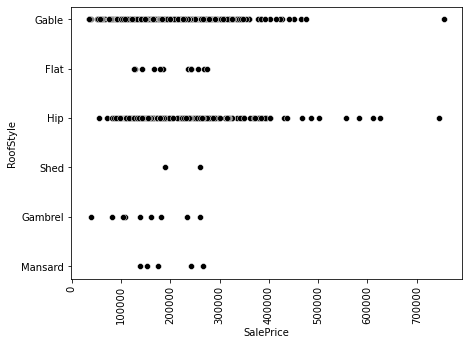



The Scatter Plot for the attribute "SalePrice" & "RoofMatl" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


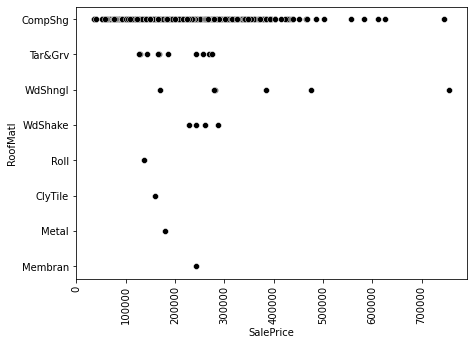



The Scatter Plot for the attribute "SalePrice" & "Exterior1st" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


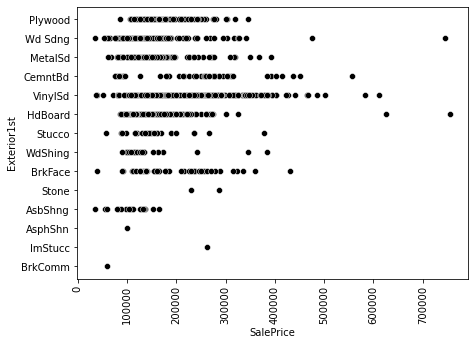



The Scatter Plot for the attribute "SalePrice" & "Exterior2nd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


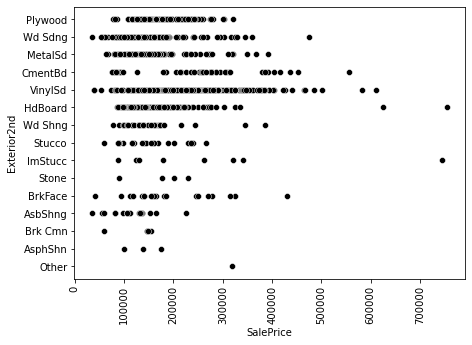



The Scatter Plot for the attribute "SalePrice" & "MasVnrType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


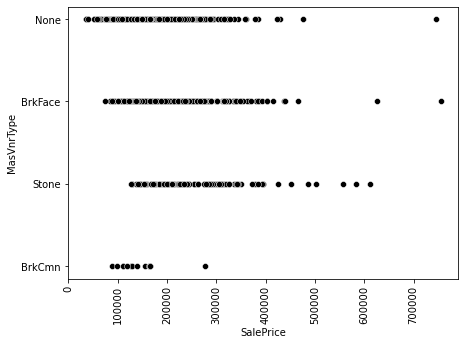



The Scatter Plot for the attribute "SalePrice" & "MasVnrArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


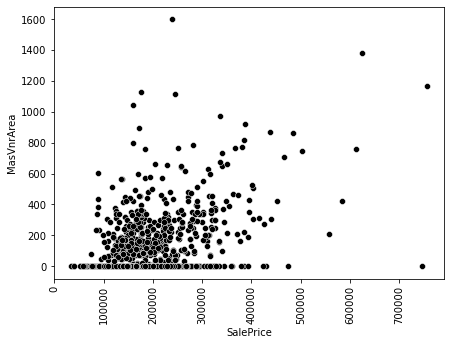



The Scatter Plot for the attribute "SalePrice" & "ExterQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


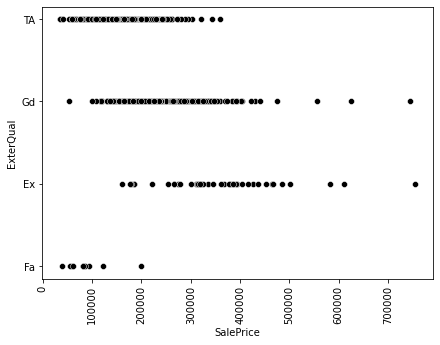



The Scatter Plot for the attribute "SalePrice" & "ExterCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


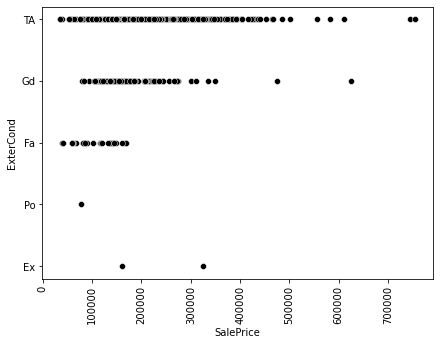



The Scatter Plot for the attribute "SalePrice" & "Foundation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


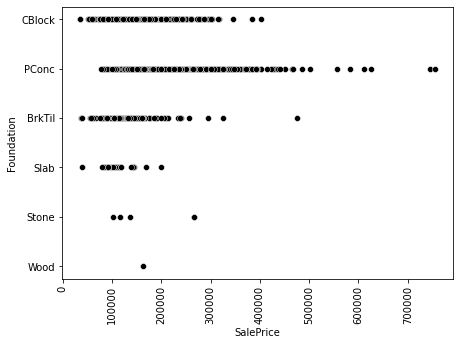



The Scatter Plot for the attribute "SalePrice" & "BsmtQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


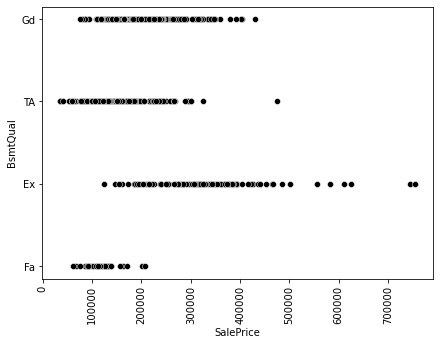



The Scatter Plot for the attribute "SalePrice" & "BsmtCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


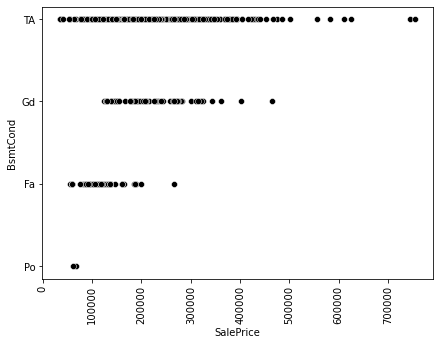



The Scatter Plot for the attribute "SalePrice" & "BsmtExposure" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


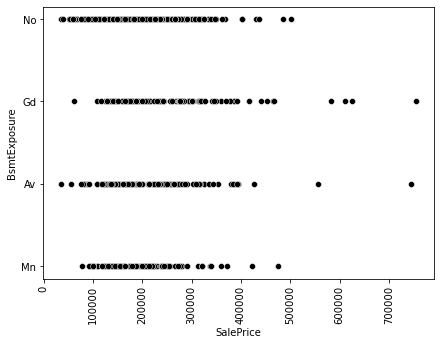



The Scatter Plot for the attribute "SalePrice" & "BsmtFinType1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


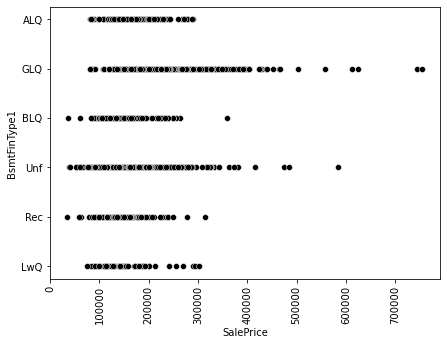



The Scatter Plot for the attribute "SalePrice" & "BsmtFinSF1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


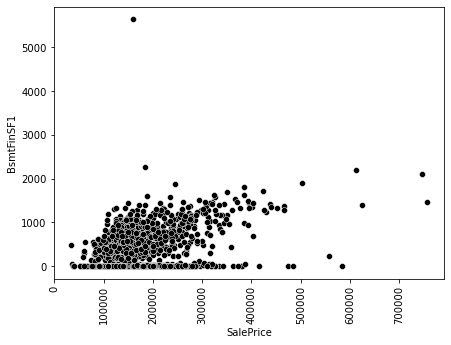



The Scatter Plot for the attribute "SalePrice" & "BsmtFinType2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


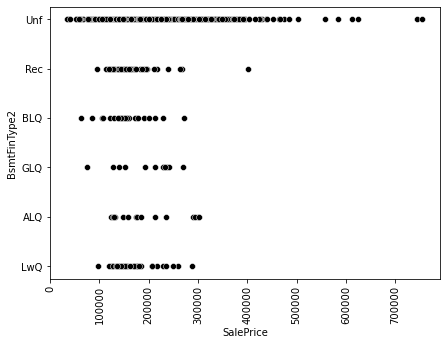



The Scatter Plot for the attribute "SalePrice" & "BsmtFinSF2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


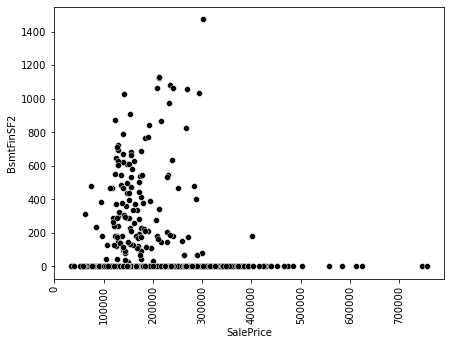



The Scatter Plot for the attribute "SalePrice" & "BsmtUnfSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


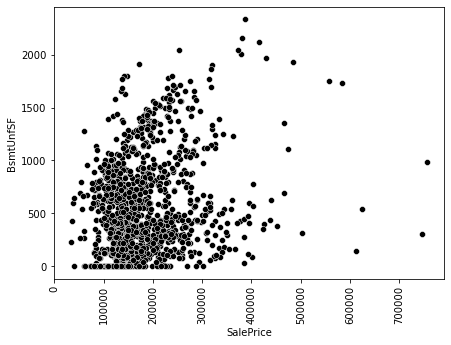



The Scatter Plot for the attribute "SalePrice" & "TotalBsmtSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


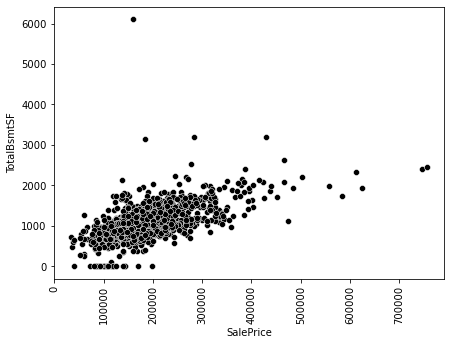



The Scatter Plot for the attribute "SalePrice" & "Heating" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


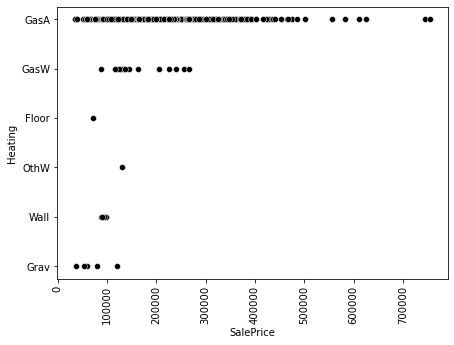



The Scatter Plot for the attribute "SalePrice" & "HeatingQC" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


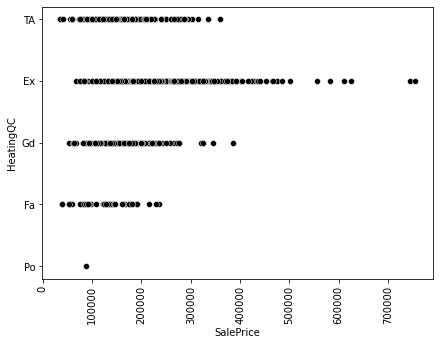



The Scatter Plot for the attribute "SalePrice" & "CentralAir" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


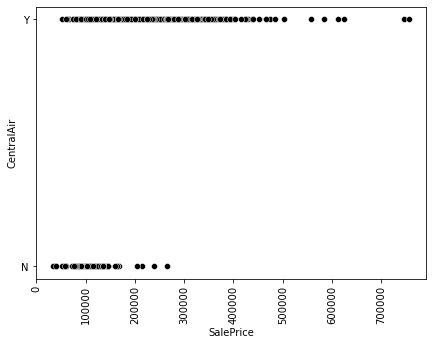



The Scatter Plot for the attribute "SalePrice" & "Electrical" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


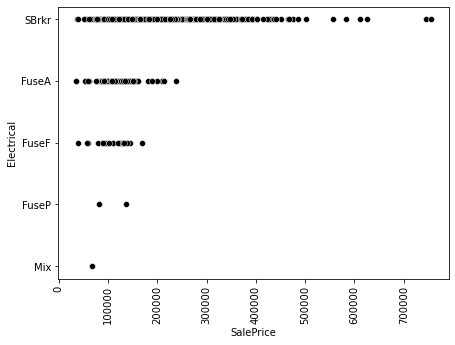



The Scatter Plot for the attribute "SalePrice" & "1stFlrSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


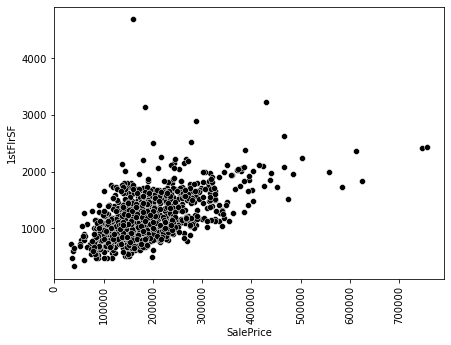



The Scatter Plot for the attribute "SalePrice" & "2ndFlrSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


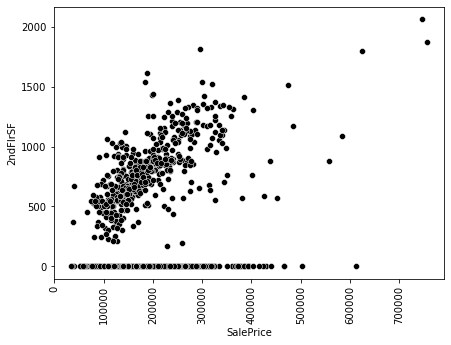



The Scatter Plot for the attribute "SalePrice" & "LowQualFinSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


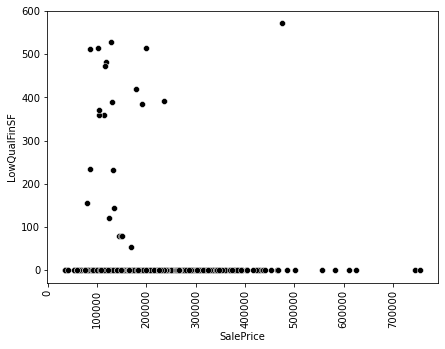



The Scatter Plot for the attribute "SalePrice" & "GrLivArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


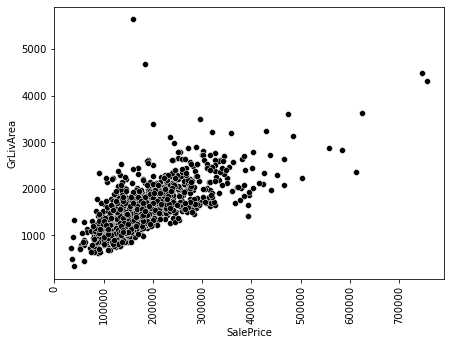



The Scatter Plot for the attribute "SalePrice" & "BsmtFullBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


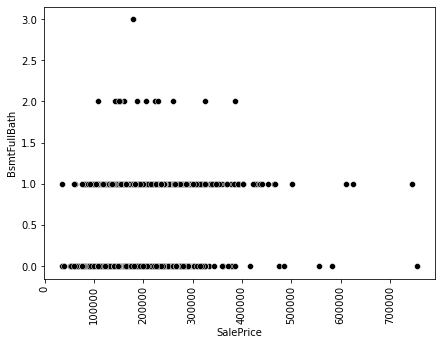



The Scatter Plot for the attribute "SalePrice" & "BsmtHalfBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


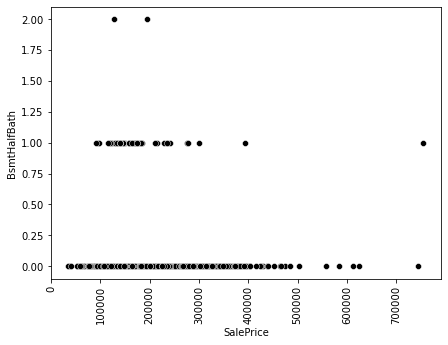



The Scatter Plot for the attribute "SalePrice" & "FullBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


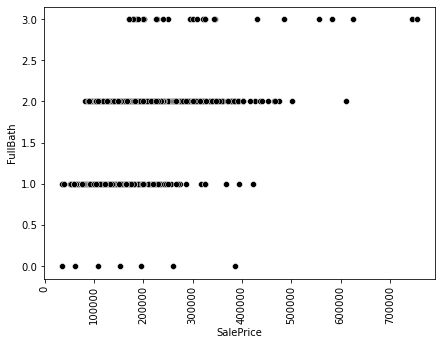



The Scatter Plot for the attribute "SalePrice" & "HalfBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


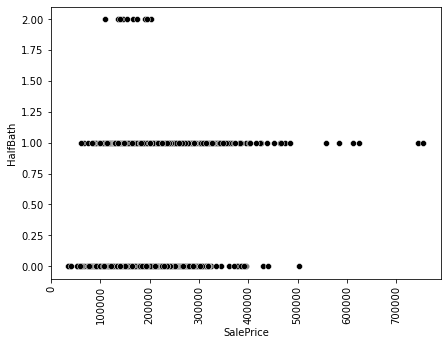



The Scatter Plot for the attribute "SalePrice" & "BedroomAbvGr" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


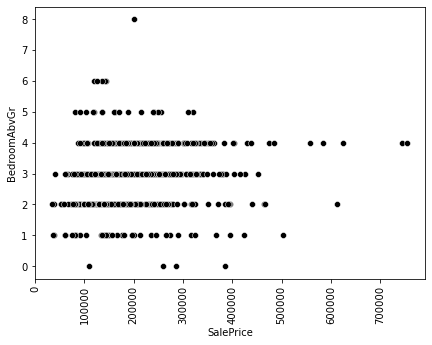



The Scatter Plot for the attribute "SalePrice" & "KitchenAbvGr" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


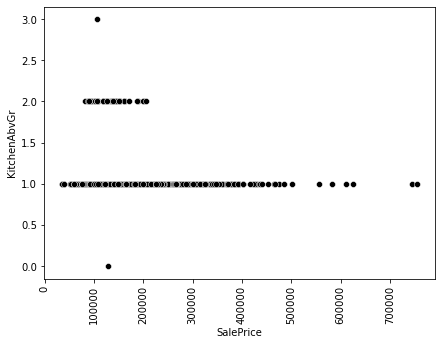



The Scatter Plot for the attribute "SalePrice" & "KitchenQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


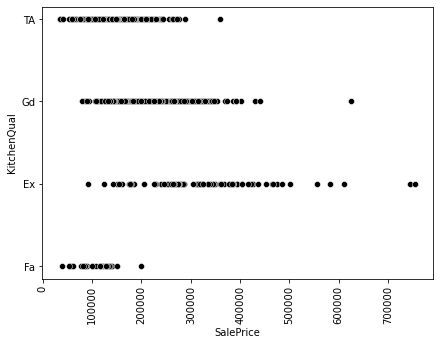



The Scatter Plot for the attribute "SalePrice" & "TotRmsAbvGrd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


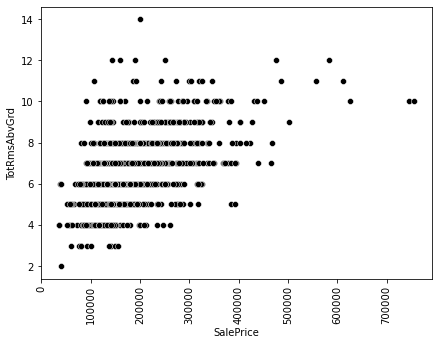



The Scatter Plot for the attribute "SalePrice" & "Functional" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


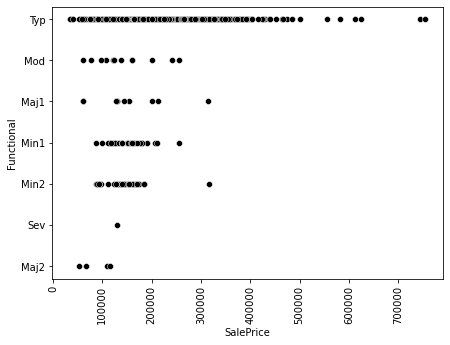



The Scatter Plot for the attribute "SalePrice" & "Fireplaces" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


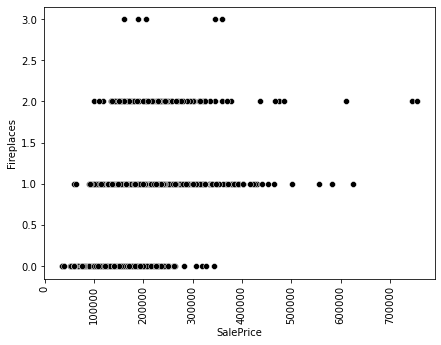



The Scatter Plot for the attribute "SalePrice" & "FireplaceQu" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


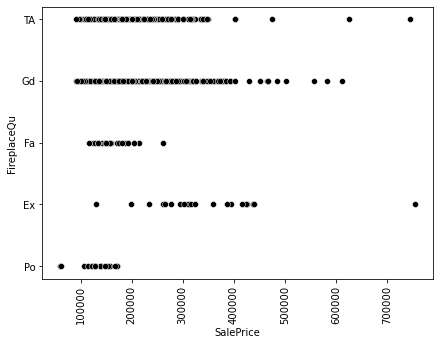



The Scatter Plot for the attribute "SalePrice" & "GarageType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


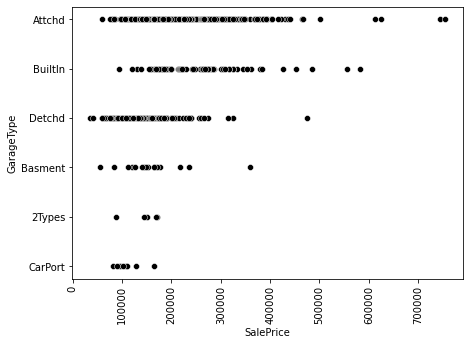



The Scatter Plot for the attribute "SalePrice" & "GarageYrBlt" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


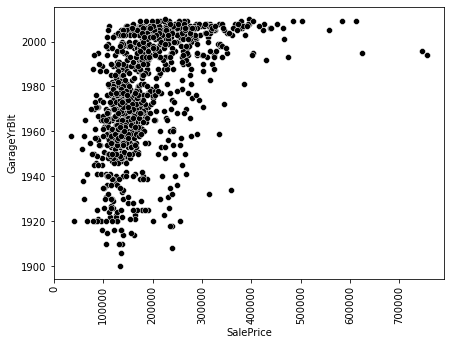



The Scatter Plot for the attribute "SalePrice" & "GarageFinish" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


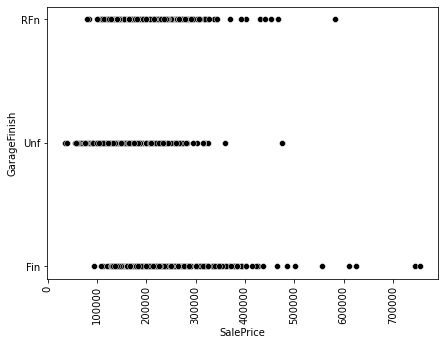



The Scatter Plot for the attribute "SalePrice" & "GarageCars" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


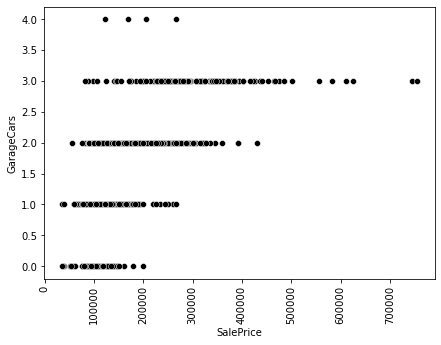



The Scatter Plot for the attribute "SalePrice" & "GarageArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


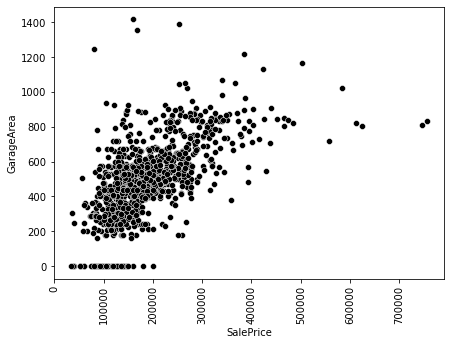



The Scatter Plot for the attribute "SalePrice" & "GarageQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


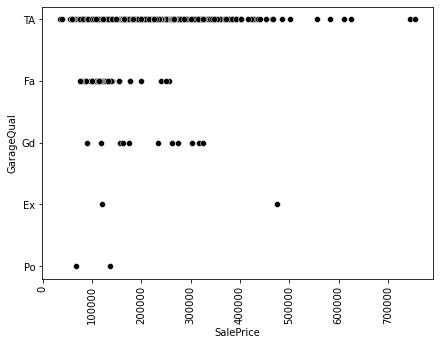



The Scatter Plot for the attribute "SalePrice" & "GarageCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


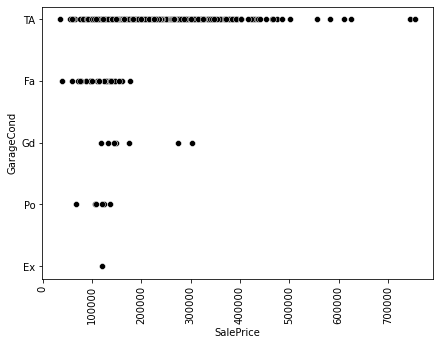



The Scatter Plot for the attribute "SalePrice" & "PavedDrive" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


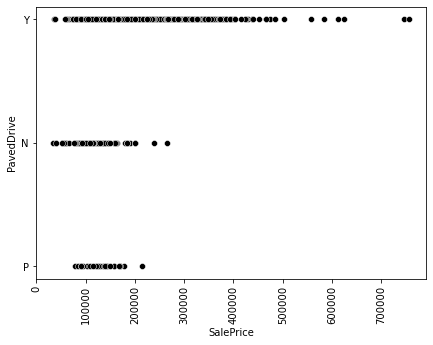



The Scatter Plot for the attribute "SalePrice" & "WoodDeckSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


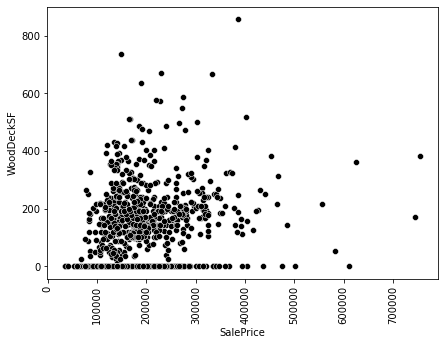



The Scatter Plot for the attribute "SalePrice" & "OpenPorchSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


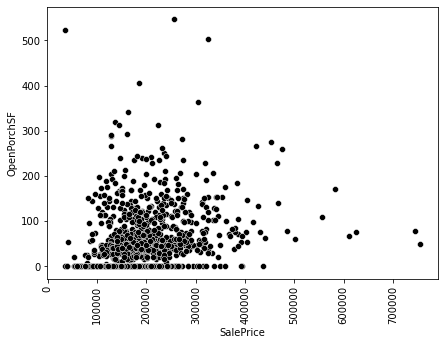



The Scatter Plot for the attribute "SalePrice" & "EnclosedPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


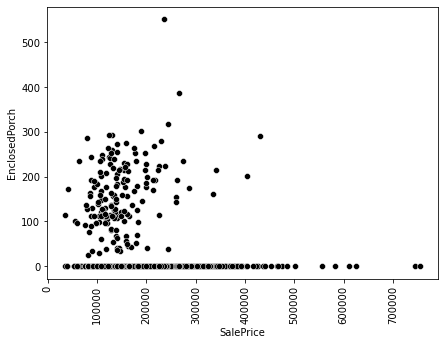



The Scatter Plot for the attribute "SalePrice" & "3SsnPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


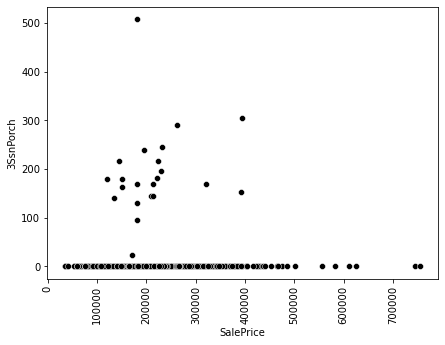



The Scatter Plot for the attribute "SalePrice" & "ScreenPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


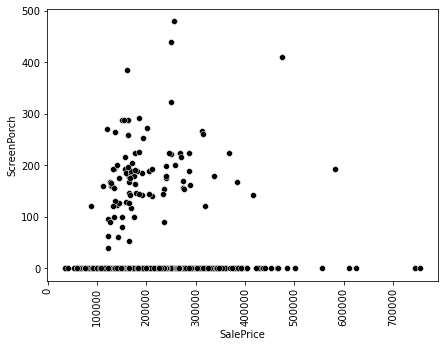



The Scatter Plot for the attribute "SalePrice" & "PoolArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


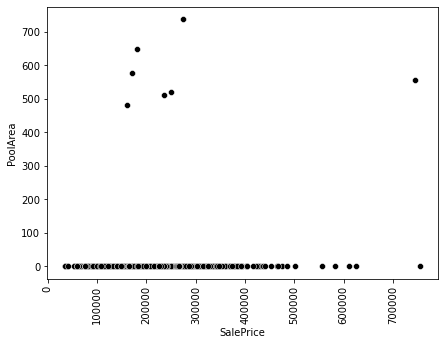



The Scatter Plot for the attribute "SalePrice" & "PoolQC" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


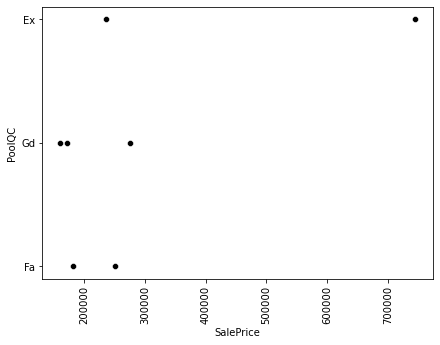



The Scatter Plot for the attribute "SalePrice" & "Fence" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


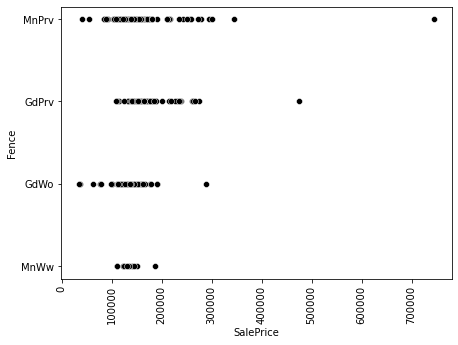



The Scatter Plot for the attribute "SalePrice" & "MiscFeature" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


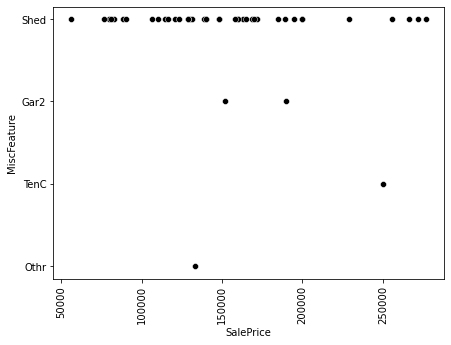



The Scatter Plot for the attribute "SalePrice" & "MiscVal" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


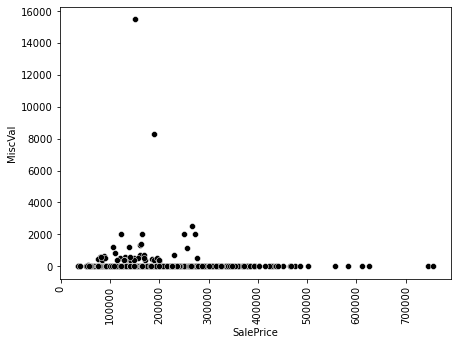



The Scatter Plot for the attribute "SalePrice" & "MoSold" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


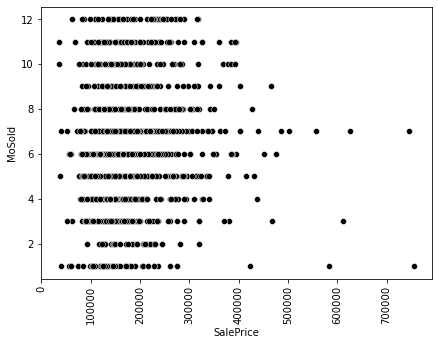



The Scatter Plot for the attribute "SalePrice" & "YrSold" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


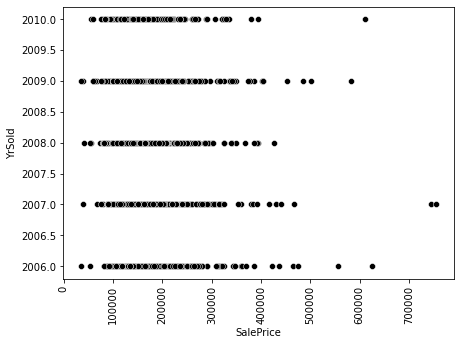



The Scatter Plot for the attribute "SalePrice" & "SaleType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


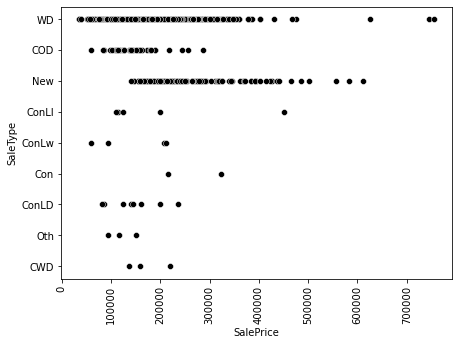



The Scatter Plot for the attribute "SalePrice" & "SaleCondition" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


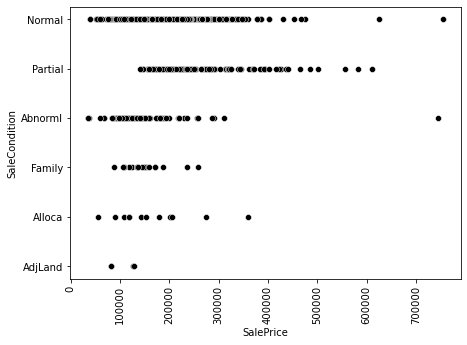



The Scatter Plot for the attribute "SalePrice" & "SalePrice" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


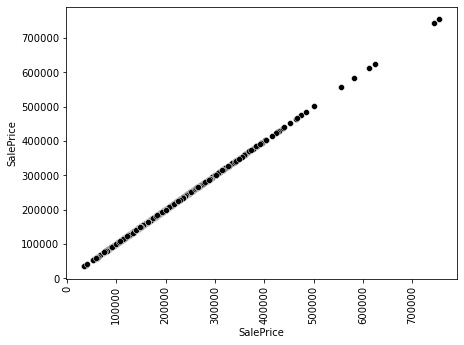

In [29]:
for i in df_train:
    plt.figure(figsize=(7,5))
    print(f'The Scatter Plot for the attribute "SalePrice" & "{i}" is-\n {sns.scatterplot(df_train["SalePrice"],df_train[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### 3.Categorical Plot

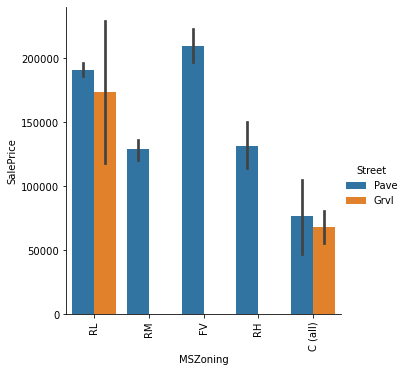

In [30]:
sns.catplot(x='MSZoning',y='SalePrice',hue='Street',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

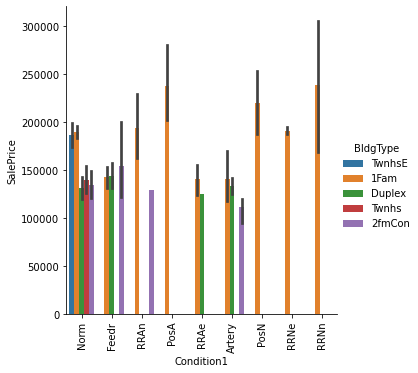

In [31]:
sns.catplot(x='Condition1',y='SalePrice',hue='BldgType',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

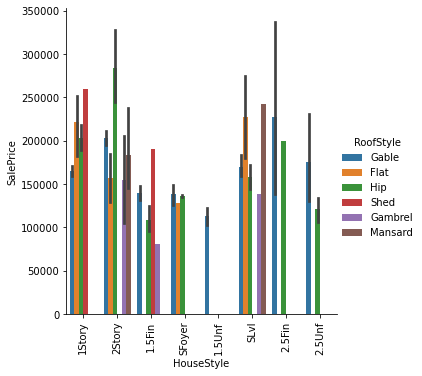

In [32]:
sns.catplot(x='HouseStyle',y='SalePrice',hue='RoofStyle',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

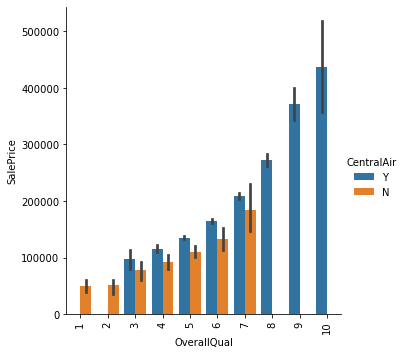

In [33]:
sns.catplot(x='OverallQual',y='SalePrice',hue='CentralAir',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

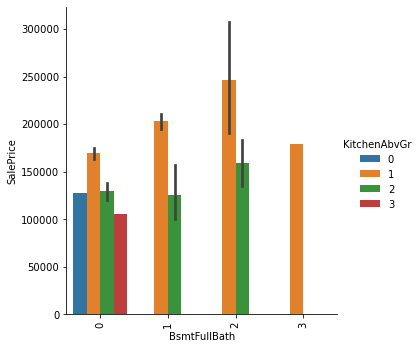

In [34]:
sns.catplot(x='BsmtFullBath',y='SalePrice',hue='KitchenAbvGr',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

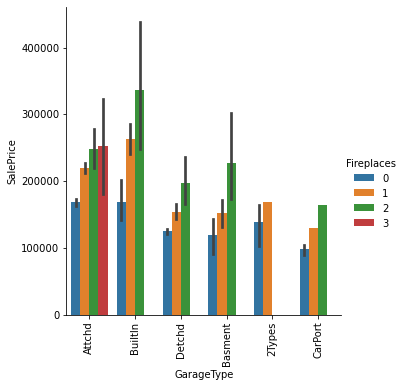

In [35]:
sns.catplot(x='GarageType',y='SalePrice',hue='Fireplaces',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

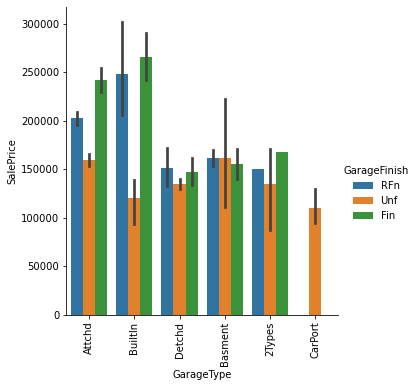

In [36]:
sns.catplot(x='GarageType',y='SalePrice',hue='GarageFinish',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

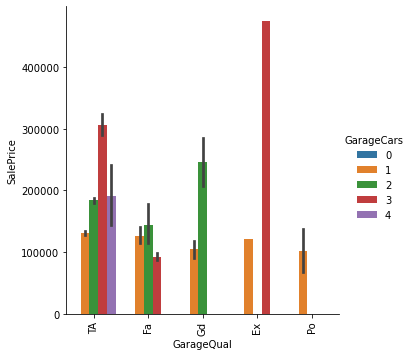

In [37]:
sns.catplot(x='GarageQual',y='SalePrice',hue='GarageCars',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

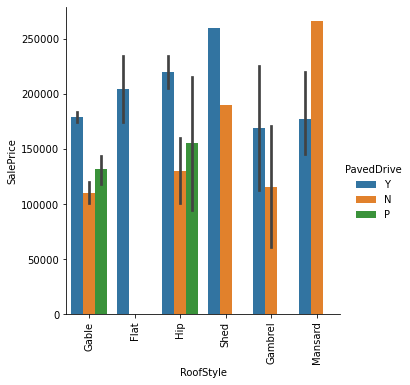

In [38]:
sns.catplot(x='RoofStyle',y='SalePrice',hue='PavedDrive',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

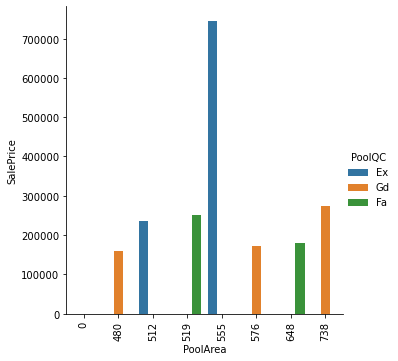

In [39]:
sns.catplot(x='PoolArea',y='SalePrice',hue='PoolQC',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

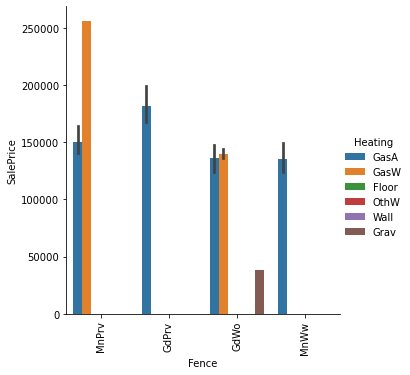

In [40]:
sns.catplot(x='Fence',y='SalePrice',hue='Heating',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

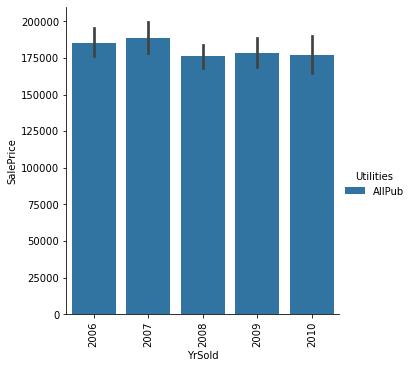

In [41]:
sns.catplot(x='YrSold',y='SalePrice',hue='Utilities',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

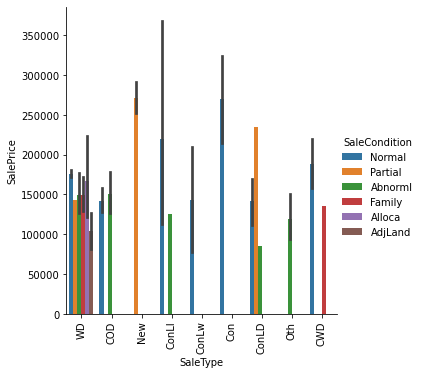

In [42]:
sns.catplot(x='SaleType',y='SalePrice',hue='SaleCondition',data=df_train,kind='bar')
plt.xticks(rotation=90)
plt.show()

###### Explanation from above Graphs-
MSSubClass: Identifies the type of dwelling involved in the sale and 428 people are buying out flats of type '1-STORY 1946 & NEWER ALL STYLES'.

MSZoning: Identifies the general zoning classification of the sale and 928 people have bought flats in (RL)'Residential Low Density' category.

LotFrontage: Linear feet of street connected to property 111 flats those have been sold are connected with linear feet of the street

21 flats have lot size of 9600 square feet.

1164 flats are connected to paved road while 4 flats are situated at garvel road side.

An alley is a narrow passage or street with buildings or walls on both sides flats those are connected with garvel road have 41 alleys whereas the flats connected with paved road have 36 alleys.

740 flats are of regular('reg') shape which is highest

LandContour: Flatness of the property-1046 flats are having flat surface.

842 flats are present in the inside lot

1105 flats have gentle land slope

182 flats are nearby to North Ames

981 flats are there of single-family detached type

314 flats have Average material and finish of the house and only 15 flats have Very excellent material and finish

Overall condition of 640 flats are average

Most of the flats are built in year 2005-2006

915 flats have roof type as Gable-A gable roof is a type of roof design where two sides slope downward toward the walls – and the other two sides include walls that extend from the bottom of the eaves to the peak of the ridge. The purpose of home's roof is to protect the entire structure (and us) from weather.

1144 flats roof material is Standard (Composite) Shingle

396 flats are using Vinyl siding as exterior covering- Vinyl siding is plastic exterior siding for houses and small apartment buildings, used for decoration and weatherproofing

696 flats have Masonry veneer type as Brick Face-- Masonry veneer walls consist of a single non-structural external layer of masonry, typically made of brick, stone or manufactured stone.

External quality of the material on the exterior of 717 flats are Average and the present condition of the material on the exterior of 1022 flats are Average

516 flats have type of foundation is Cinder Block

Height of basement in 517 flats are Typical (80-89 inches)

general condition of the basement of 1041 flats are Typical i.e. slight dampness allowed

756 flats has no exposure to walkout or garden level walls.

28 flats are having 864 squarefoot of basement area

1143 flats have type of heating as Gas forced warm air furnace

585 flats are having excellent heating quality

1090 flats are having Central air conditioning inside the flat

1070 flats are having electrical system as Standard Circuit Breakers & Romex

1st floor is of 864 square feet of 19 flats,whereas 13 flats are having 1st floor size as 1040 sqrft

578 flats kitchen quality is Average

325 flats have 6 rooms above grade and doesn't have bathroom attached to it.

551 flats have zero Fireplaces

301 flats are having Good fireplace quality i.e. - Masonry Fireplace in main level

691 flats have garage Attached to home

Interior finish of the garage is unfinished in 487 flats

In 665 flats garage can store 2 cars at a time.

1050 flats have garage quality as average

Interior finish of the garage is paved for 1071 flats

264 flats have been sold in year 2007999 flats had sale type as Warranty Deed - Conventional

945 flats are sold as normal sale

#### Since below four attributes have almost 1000 and above missing values hence will drop these attributes from train data set and later on from test data set too as we need to maintain the number of columns equal in train and test both the dataset.

In [43]:
df_train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [44]:
df_test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

##### SimpleImputer
To replace nan values of categorical and numeric columns w.r.t. mode and mean/median for train and test both the datasets

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
#replacing nan of numerical columns with mean
for i in ['LotFrontage','MasVnrArea','GarageYrBlt']:
    df_train[i]=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df_train[i].values.reshape(-1,1))

In [47]:
#replacing nan of categorical columns with mode
for i in ['GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType']:
    df_train[i]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df_train[i].values.reshape(-1,1))

In [48]:
df_train.isnull().sum().sum()

0

In [49]:
#replacing nan of numerical columns with mean
for i in ['LotFrontage','MasVnrArea','GarageYrBlt']:
    df_test[i]=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df_test[i].values.reshape(-1,1))

In [50]:
#replacing nan of categorical columns with mode
for i in ['GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType','Electrical']:
    df_test[i]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df_test[i].values.reshape(-1,1))

In [51]:
df_test.isnull().sum().sum()

0

###### Encoding
Now I'll convert all the categorical columns of train as well as test datset into numeric one by applying label encoder technique

Label Encoder

In [52]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [53]:
categorical_columns=selector(dtype_include=object)(df_train)
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [54]:
for j in categorical_columns:
    df_train[j]=LabelEncoder().fit_transform(df_train[j].astype(str))

In [55]:
df_train.drop('Utilities',axis=1,inplace=True)

In [56]:
df_train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3     70.98847     4928       1         0   
1  889          20         3     95.00000    15865       1         0   
2  793          60         3     92.00000     9920       1         0   
3  110          20         3    105.00000    11751       1         0   
4  422          20         3     70.98847    16635       1         0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            3          4          0            13           2           2   
1            3          4          1            12           2           2   
2            3          1          0            15           2           2   
3            3          4          0            14           2           2   
4            3          2          0            14           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         4           2            6            5       1976          1976   
1         0           2            8            6       1970          1970   
2         0           5            7            5       1996          1997   
3         0           2            6            6       1977          1977   
4         0           2            6            7       1977          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1            8            9           2         0.0   
1          0         5           12           13           2         0.0   
2          1         1            7            7           2         0.0   
3          3         1            8            9           1       480.0   
4          1         1            4            4           3       126.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          4           1         2         3             3   
1          2          2           2         3         1             1   
2          2          4           2         2         3             0   
3          3          4           1         2         3             3   
4          2          4           1         2         3             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0         120             5           0        958         1078   
1             0         351             4         823       1043         2217   
2             2         862             5           0        255         1117   
3             1         705             5           0       1139         1844   
4             0        1246             5           0        356         1602   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          4           1           4       958         0   
1        1          0           1           4      2217         0   
2        1          0           1           4      1127       886   
3        1          0           1           4      1844         0   
4        1          2           1           4      1602         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1            3             5           6   
1             4             1            2             8           6   
2             3             1            3             8           6   
3             3             1            3             7           6   
4     

In [57]:
df_train.tail()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1163  289          20         3     70.98847     9819       1         0   
1164  554          20         3     67.00000     8777       1         3   
1165  196         160         3     24.00000     2280       1         3   
1166   31          70         0     50.00000     8500       1         3   
1167  617          60         3     70.98847     7861       1         0   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1163            3          4          0            19           2           2   
1164            3          4          0             7           1           2   
1165            3          2          0            13           2           2   
1166            3          4          0             9           1           2   
1167            3          4          0             8           2           2   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1163         0           2            5            5       1967          1967   
1164         0           2            4            5       1949          2003   
1165         3           5            6            6       1976          1976   
1166         0           5            4            4       1920          1950   
1167         0           5            6            5       2002          2003   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
1163          1         1            7            7           1        31.0   
1164          1         1           11           12           2         0.0   
1165          1         1            8            2           2         0.0   
1166          2         1            3            3           2         0.0   
1167          1         1           11           12           2         0.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
1163          3          2           1         3         3             3   
1164          3          4           1         3         3             3   
1165          3          4           1         2         3             3   
1166          3          1           0         3         3             3   
1167          2          4           2         2         3             3   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1163             1         450             5           0        432   
1164             5           0             5           0          0   
1165             0         566             5           0        289   
1166             5           0             5           0        649   
1167             2         457             5           0        326   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
1163          882        1          4           1           4       900   
1164            0        1          0           1           4      1126   
1165          855        1          4           1           4       855   
1166          649        1          4           0           4       649   
1167          783        1          0           1           4       807   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1163         0             0        900             0             0         1   
1164         0             0       1126             0             0         2   
1165       601             0       1456             0             0         2   
1166       668             0       1317             0             0         1   
1167       702             0       1509             1             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
1163         0             3             1            3             5   
1164         0             2             1            2             5   
1165         1             3             1            3           

In [58]:
df_train.sample()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1054  752          60         3     70.98847     7750       1         3   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1054            3          4          0             8           6           2   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1054         0           5            7            5       2003          2003   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
1054          1         1           11           12           2         0.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
1054          2          4           2         2         3             3   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1054             5           0             5           0        660   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
1054          660        1          0           1           4       660   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1054       660             0       1320             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
1054         1             3             1            2             6   

      Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  \
1054           6           0            2           1       2003.0   

      GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
1054             0           2         400           4           4   

      PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1054           2           0           48              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
1054            0         0        0       8    2007         8              4   

      SalePrice  
1054     162000

##### Label Encoder in test dataset

In [59]:
categorical_test_columns=selector(dtype_include=object)(df_test)

In [60]:
for j in categorical_test_columns:
    df_test[j]=LabelEncoder().fit_transform(df_test[j].astype(str))

In [61]:
df_test.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   337          20         2    86.000000    14157       1         0   
1  1018         120         2    66.425101     5814       1         0   
2   929          20         2    66.425101    11838       1         3   
3  1148          70         2    75.000000    12000       1         3   
4  1227          60         2    86.000000    14598       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          0          0          0            21           2   
1            3          0          1          0            21           2   
2            3          0          4          0             4           2   
3            0          0          4          0             5           2   
4            3          0          1          0            20           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           2            9            5       2005   
1           0         4           2            8            5       1984   
2           0         0           2            8            5       2001   
3           0         0           5            7            7       1941   
4           0         0           5            6            5       2007   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2006          3         0            9           11           3   
1          1984          1         0            5            5           2   
2          2001          3         0            9           11           2   
3          1950          1         0            6            7           2   
4          2007          1         0            9           11           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       200.0          2          3           2         0         2   
1         0.0          2          3           1         2         2   
2         0.0          2          3           2         2         2   
3         0.0          3          3           1         3         2   
4        74.0          2          3           2         2         2   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             2        1249             5           0   
1             0             2        1036             5           0   
2             0             5           0             5           0   
3             3             4         275             5           0   
4             2             5           0             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        673         1922        0          0           1           3   
1        184         1220        0          2           1           3   
2       1753         1753        0          0           1           3   
3        429          704        0          0           1           3   
4        894          894        0          0           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      1922         0             0       1922             1             0   
1      1360         0             0       1360             1             0   
2      1788         0             0       1788             0             0   
3       860       704             0       1564             0             0   
4       894      1039             0       1933             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             3             1            2             8   
1         1         0             1             1            2             4   
2         2         0             3             1            0             7   
3         1         1             3             1            1             7   
4         2    

In [62]:
df_test.tail()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
287    83          20         2    78.000000    10206       1         3   
288  1048          20         2    57.000000     9245       1         1   
289    17          20         2    66.425101    11241       1         0   
290   523          50         3    50.000000     5000       1         3   
291  1379         160         3    21.000000     1953       1         3   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
287            3          0          4          0            20           2   
288            3          0          4          0             4           2   
289            3          0          1          0            11           2   
290            3          0          0          0             2           1   
291            3          0          4          0             1           2   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
287           0         0           2            8            5       2007   
288           0         0           2            5            5       1994   
289           0         0           2            6            7       1970   
290           0         0           0            6            7       1947   
291           0         3           5            6            5       1973   

     YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
287          2007          1         0            9           11           3   
288          1995          1         0            9           11           2   
289          1970          1         0           10           12           1   
290          1950          1         0            4            4           2   
291          1973          1         0            5            5           1   

     MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
287       468.0          3          3           2         2         2   
288         0.0          3          3           2         2         2   
289       180.0          3          3           1         3         2   
290         0.0          3          2           1         3         2   
291       408.0          3          3           1         3         0   

     BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
287             3             2          33             5           0   
288             3             2         686             5           0   
289             3             0         578             5           0   
290             3             0         399             5           0   
291             3             1         309             5           0   

     BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
287       1530         1563        0          0           1           3   
288        304          990        0          0           1           3   
289        426         1004        0          0           1           3   
290        605         1004        0          0           1           3   
291        174          483        0          3           1           3   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
287      1563         0             0       1563             0             0   
288       990         0             0        990             0             1   
289      1004         0             0       1004             1             0   
290      1004       660             0       1664             0             0   
291       483       504             0        987             0             0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
287         2         0             3             1            2   
288         1         0             3             1            3   
289         1         0             2             1            3   
290         2         0             3            

##### 8. Violin Plot

The Violin-Plot for the attribute "Id" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


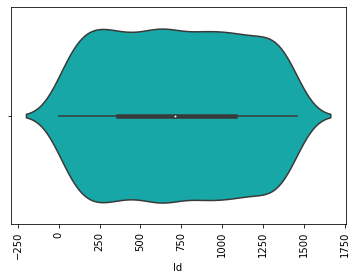



The Violin-Plot for the attribute "MSSubClass" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


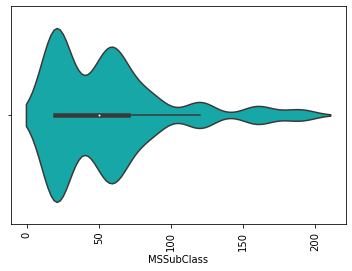



The Violin-Plot for the attribute "MSZoning" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


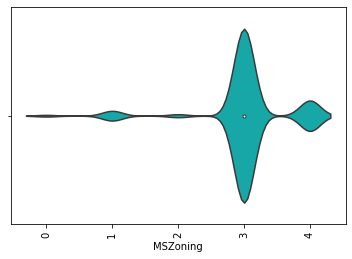



The Violin-Plot for the attribute "LotFrontage" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


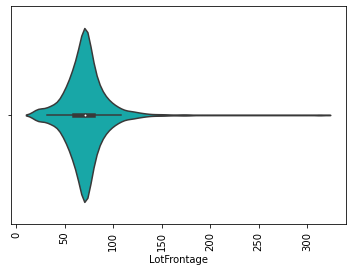



The Violin-Plot for the attribute "LotArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


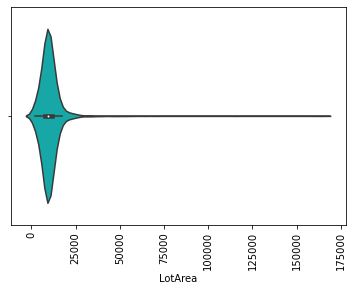



The Violin-Plot for the attribute "Street" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


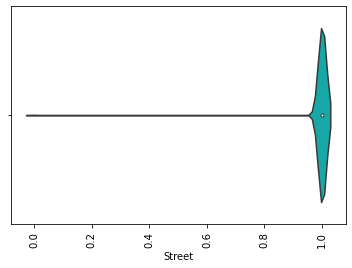



The Violin-Plot for the attribute "LotShape" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


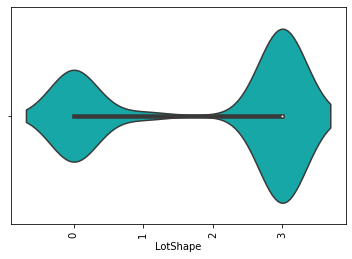



The Violin-Plot for the attribute "LandContour" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


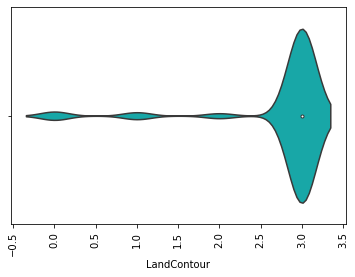



The Violin-Plot for the attribute "LotConfig" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


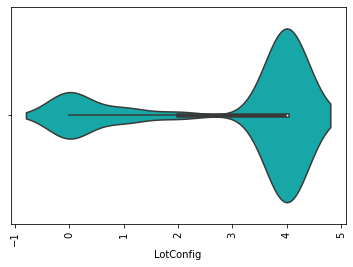



The Violin-Plot for the attribute "LandSlope" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


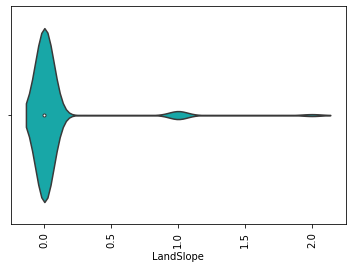



The Violin-Plot for the attribute "Neighborhood" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


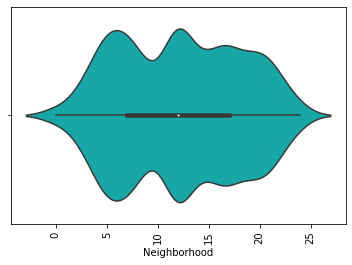



The Violin-Plot for the attribute "Condition1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


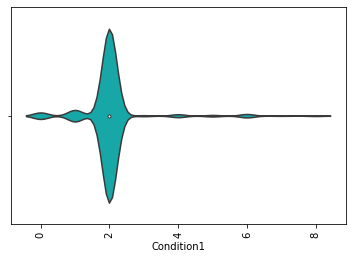



The Violin-Plot for the attribute "Condition2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


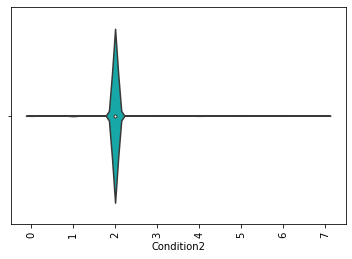



The Violin-Plot for the attribute "BldgType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


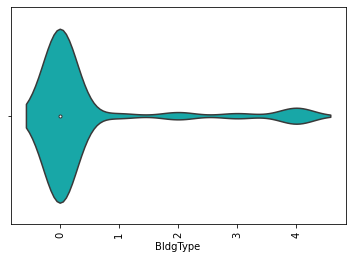



The Violin-Plot for the attribute "HouseStyle" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


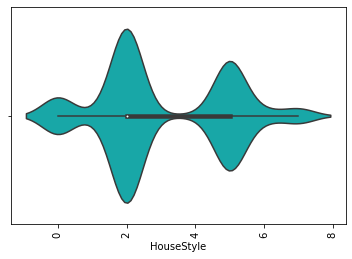



The Violin-Plot for the attribute "OverallQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


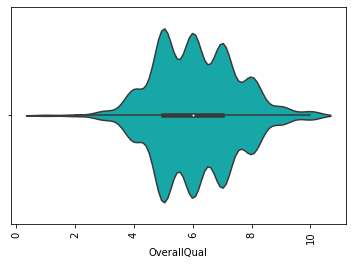



The Violin-Plot for the attribute "OverallCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


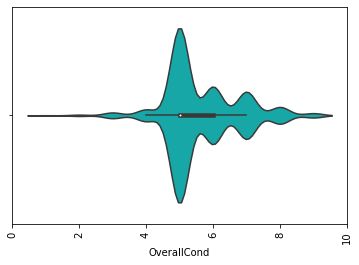



The Violin-Plot for the attribute "YearBuilt" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


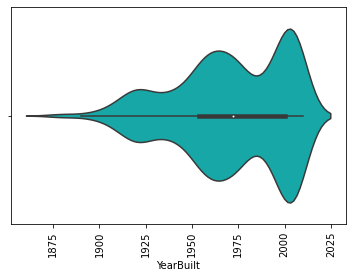



The Violin-Plot for the attribute "YearRemodAdd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


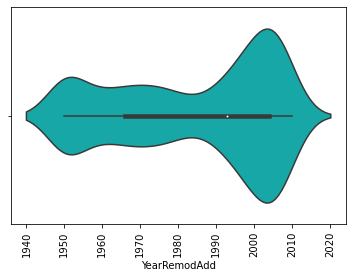



The Violin-Plot for the attribute "RoofStyle" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


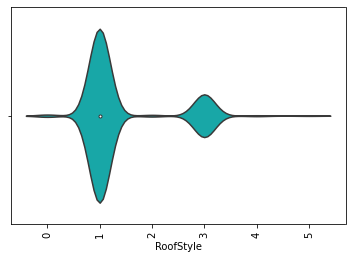



The Violin-Plot for the attribute "RoofMatl" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


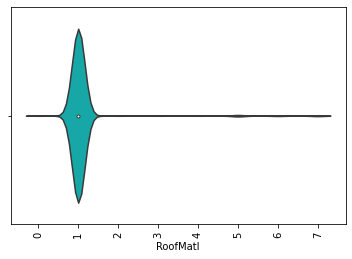



The Violin-Plot for the attribute "Exterior1st" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


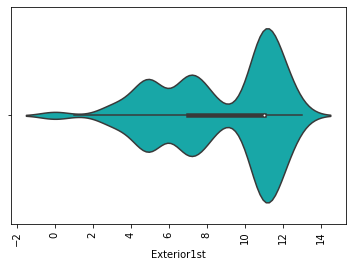



The Violin-Plot for the attribute "Exterior2nd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


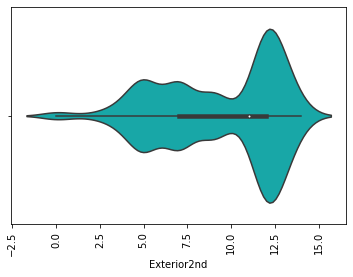



The Violin-Plot for the attribute "MasVnrType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


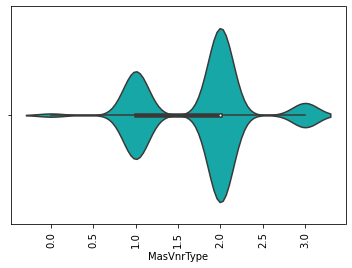



The Violin-Plot for the attribute "MasVnrArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


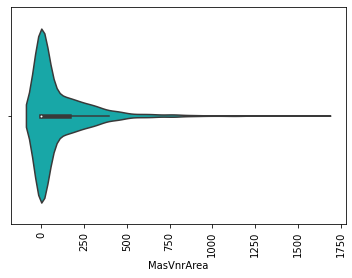



The Violin-Plot for the attribute "ExterQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


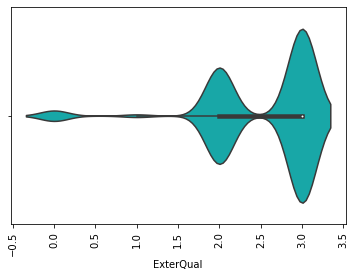



The Violin-Plot for the attribute "ExterCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


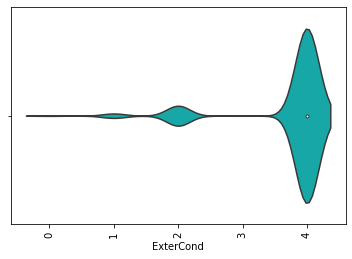



The Violin-Plot for the attribute "Foundation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


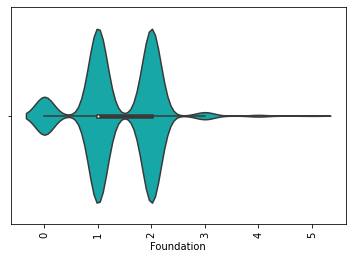



The Violin-Plot for the attribute "BsmtQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


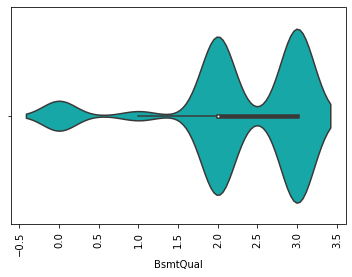



The Violin-Plot for the attribute "BsmtCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


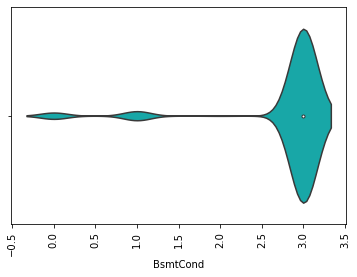



The Violin-Plot for the attribute "BsmtExposure" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


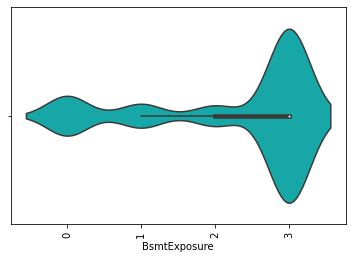



The Violin-Plot for the attribute "BsmtFinType1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


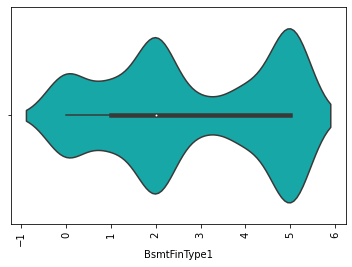



The Violin-Plot for the attribute "BsmtFinSF1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


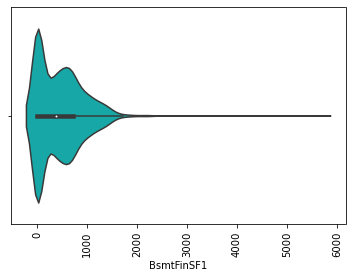



The Violin-Plot for the attribute "BsmtFinType2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


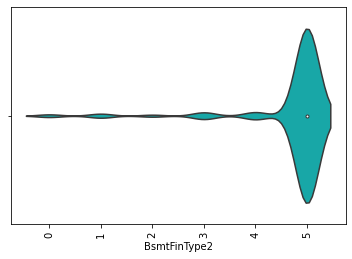



The Violin-Plot for the attribute "BsmtFinSF2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


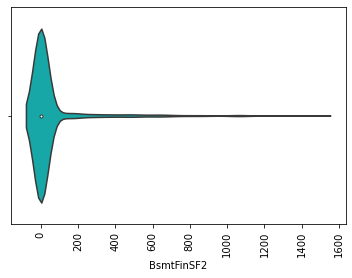



The Violin-Plot for the attribute "BsmtUnfSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


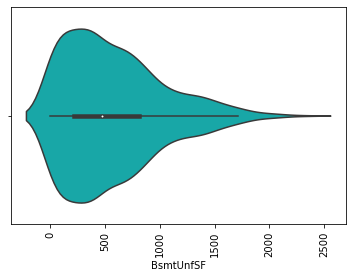



The Violin-Plot for the attribute "TotalBsmtSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


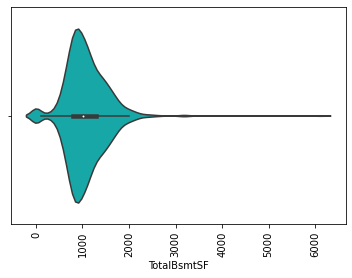



The Violin-Plot for the attribute "Heating" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


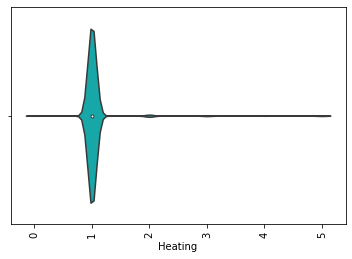



The Violin-Plot for the attribute "HeatingQC" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


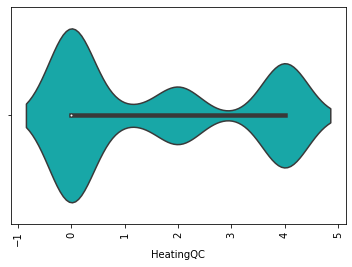



The Violin-Plot for the attribute "CentralAir" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


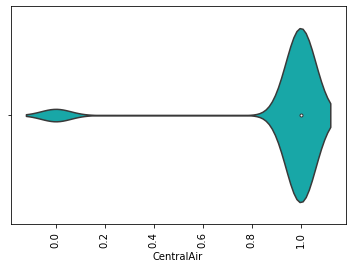



The Violin-Plot for the attribute "Electrical" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


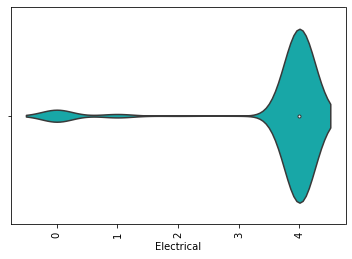



The Violin-Plot for the attribute "1stFlrSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


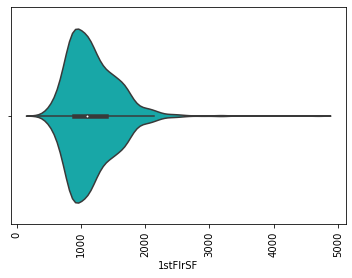



The Violin-Plot for the attribute "2ndFlrSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


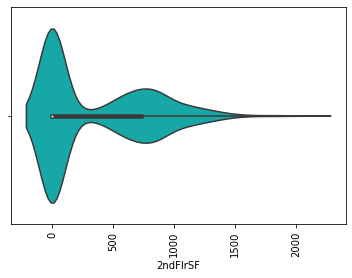



The Violin-Plot for the attribute "LowQualFinSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


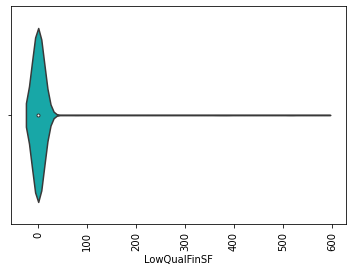



The Violin-Plot for the attribute "GrLivArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


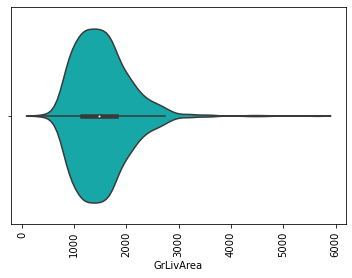



The Violin-Plot for the attribute "BsmtFullBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


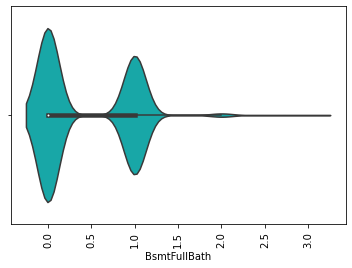



The Violin-Plot for the attribute "BsmtHalfBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


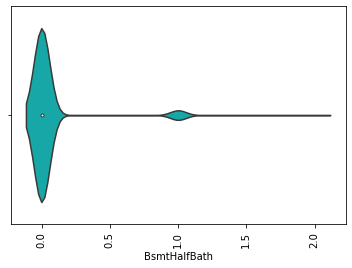



The Violin-Plot for the attribute "FullBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


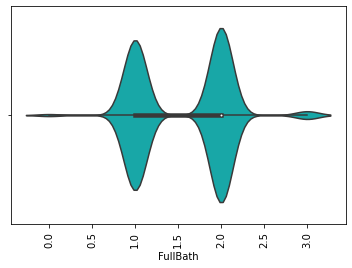



The Violin-Plot for the attribute "HalfBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


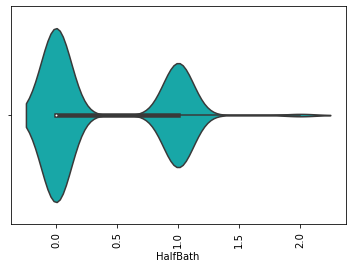



The Violin-Plot for the attribute "BedroomAbvGr" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


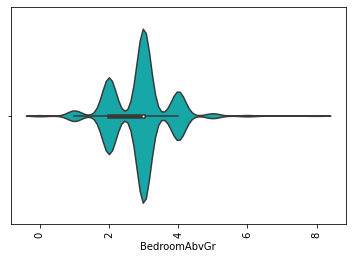



The Violin-Plot for the attribute "KitchenAbvGr" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


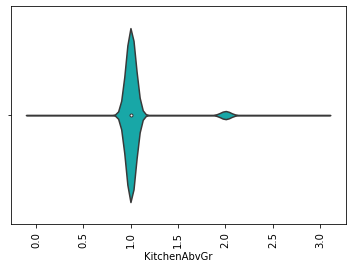



The Violin-Plot for the attribute "KitchenQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


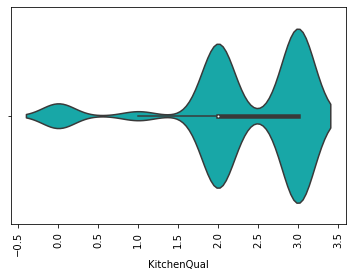



The Violin-Plot for the attribute "TotRmsAbvGrd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


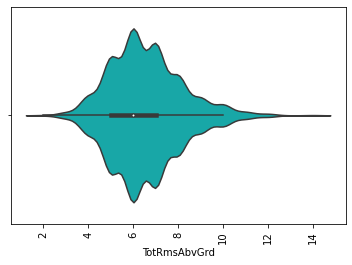



The Violin-Plot for the attribute "Functional" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


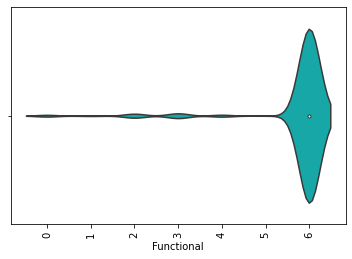



The Violin-Plot for the attribute "Fireplaces" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


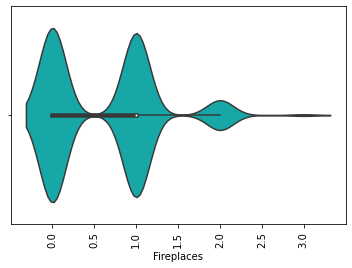



The Violin-Plot for the attribute "FireplaceQu" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


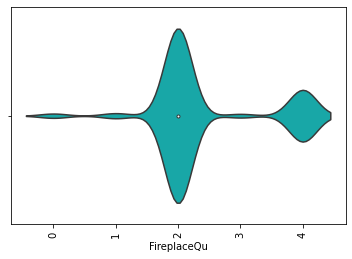



The Violin-Plot for the attribute "GarageType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


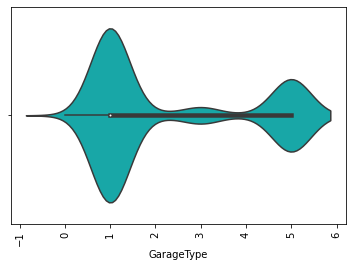



The Violin-Plot for the attribute "GarageYrBlt" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


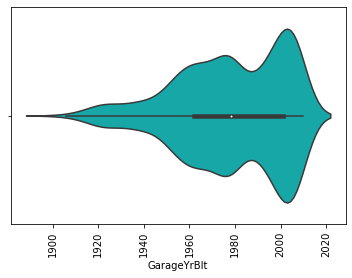



The Violin-Plot for the attribute "GarageFinish" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


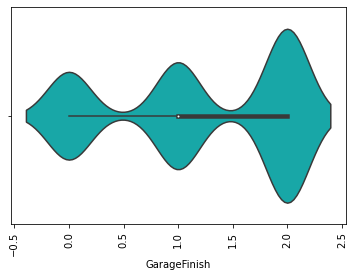



The Violin-Plot for the attribute "GarageCars" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


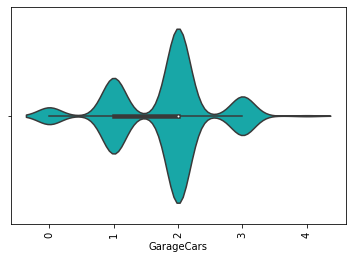



The Violin-Plot for the attribute "GarageArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


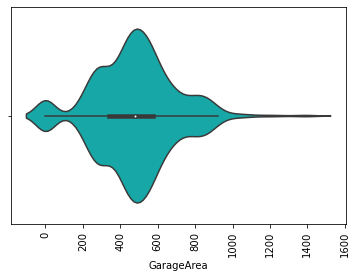



The Violin-Plot for the attribute "GarageQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


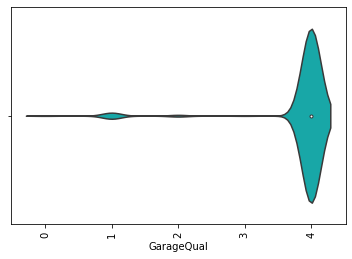



The Violin-Plot for the attribute "GarageCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


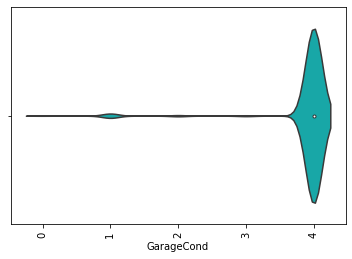



The Violin-Plot for the attribute "PavedDrive" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


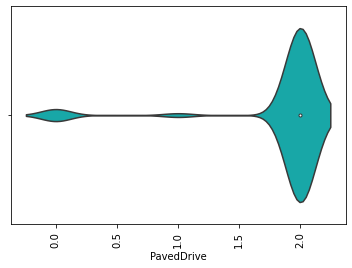



The Violin-Plot for the attribute "WoodDeckSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


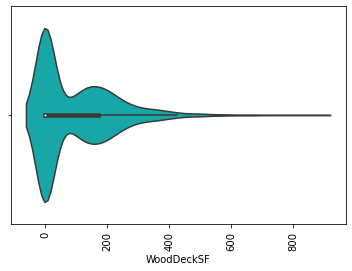



The Violin-Plot for the attribute "OpenPorchSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


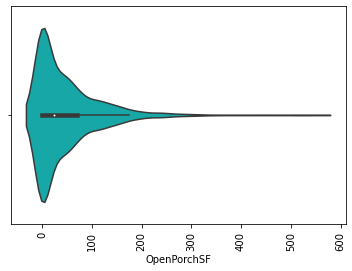



The Violin-Plot for the attribute "EnclosedPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


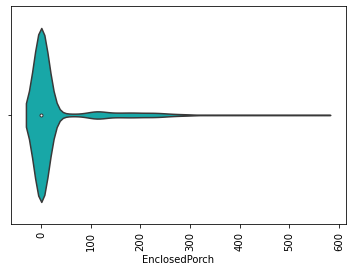



The Violin-Plot for the attribute "3SsnPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


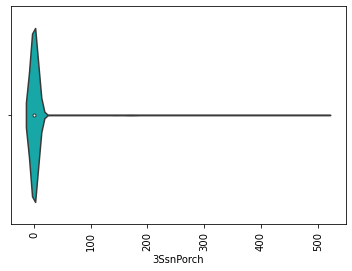



The Violin-Plot for the attribute "ScreenPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


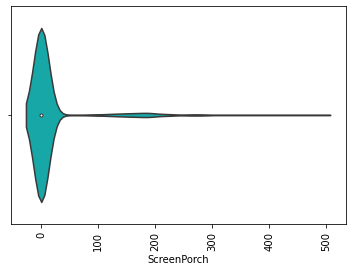



The Violin-Plot for the attribute "PoolArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


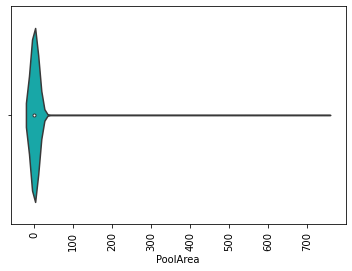



The Violin-Plot for the attribute "MiscVal" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


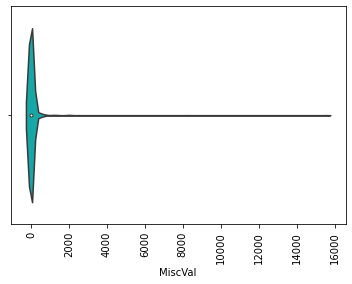



The Violin-Plot for the attribute "MoSold" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


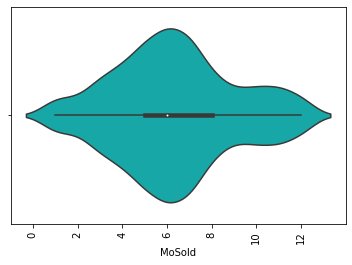



The Violin-Plot for the attribute "YrSold" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


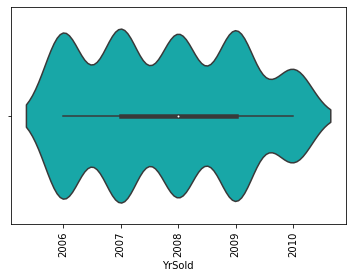



The Violin-Plot for the attribute "SaleType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


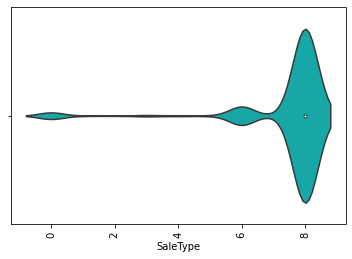



The Violin-Plot for the attribute "SaleCondition" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


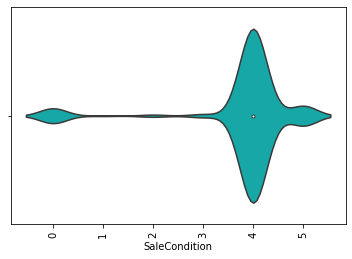



The Violin-Plot for the attribute "SalePrice" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


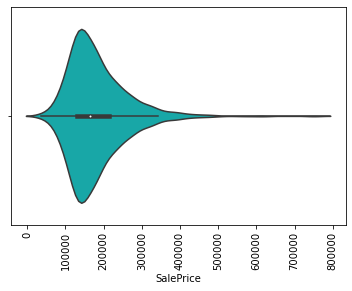

In [63]:
for i in df_train.columns:
    print(f'The Violin-Plot for the attribute "{i}" is-\n {sns.violinplot(df_train[i],color="c")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### Descriptive Statistics

In [64]:
df_train.describe().T

count           mean           std      min       25%  \
Id             1168.0     724.136130    416.159877      1.0     360.5   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.0   
MSZoning       1168.0       3.013699      0.633120      0.0       3.0   
LotFrontage    1168.0      70.988470     22.437056     21.0      60.0   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.5   
...               ...            ...           ...      ...       ...   
MoSold         1168.0       6.344178      2.686352      1.0       5.0   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.0   
SaleType       1168.0       7.465753      1.619459      0.0       8.0   
SaleCondition  1168.0       3.768836      1.112208      0.0       4.0   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.0   

                        50%        75%       max  
Id                714.50000    1079.50    1460.0  
MSSubClass         50.00000      70.00     190.0  
MSZoning            3.00000       3.00       4.0  
LotFrontage        70.98847      79.25     313.0  
LotArea          9522.50000   11515.50  164660.0  
...                     ...        ...       ...  
MoSold              6.00000       8.00      12.0  
YrSold           2008.00000    2009.00    2010.0  
SaleType            8.00000       8.00       8.0  
SaleCondition       4.00000       4.00       5.0  
SalePrice      163995.00000  215000.00  755000.0  

[76 rows x 8 columns]

In [65]:
df_test.describe().T

count          mean           std     min      25%  \
Id             292.0    755.955479    442.565228     6.0   377.75   
MSSubClass     292.0     57.414384     43.780649    20.0    20.00   
MSZoning       292.0      2.136986      0.478114     0.0     2.00   
LotFrontage    292.0     66.425101     19.975962    21.0    57.75   
LotArea        292.0  10645.143836  13330.669795  1526.0  7200.00   
...              ...           ...           ...     ...      ...   
MiscVal        292.0     28.184932    224.036218     0.0     0.00   
MoSold         292.0      6.232877      2.774556     1.0     4.00   
YrSold         292.0   2007.859589      1.322867  2006.0  2007.00   
SaleType       292.0      4.828767      0.744829     0.0     5.00   
SaleCondition  292.0      1.914384      0.576932     0.0     2.00   

                       50%       75%       max  
Id              778.000000   1152.25    1456.0  
MSSubClass       50.000000     70.00     190.0  
MSZoning          2.000000      2.00       3.0  
LotFrontage      66.425101     76.00     150.0  
LotArea        9200.000000  11658.75  215245.0  
...                    ...       ...       ...  
MiscVal           0.000000      0.00    3500.0  
MoSold            6.000000      8.00      12.0  
YrSold         2008.000000   2009.00    2010.0  
SaleType          5.000000      5.00       5.0  
SaleCondition     2.000000      2.00       3.0  

[76 rows x 8 columns]

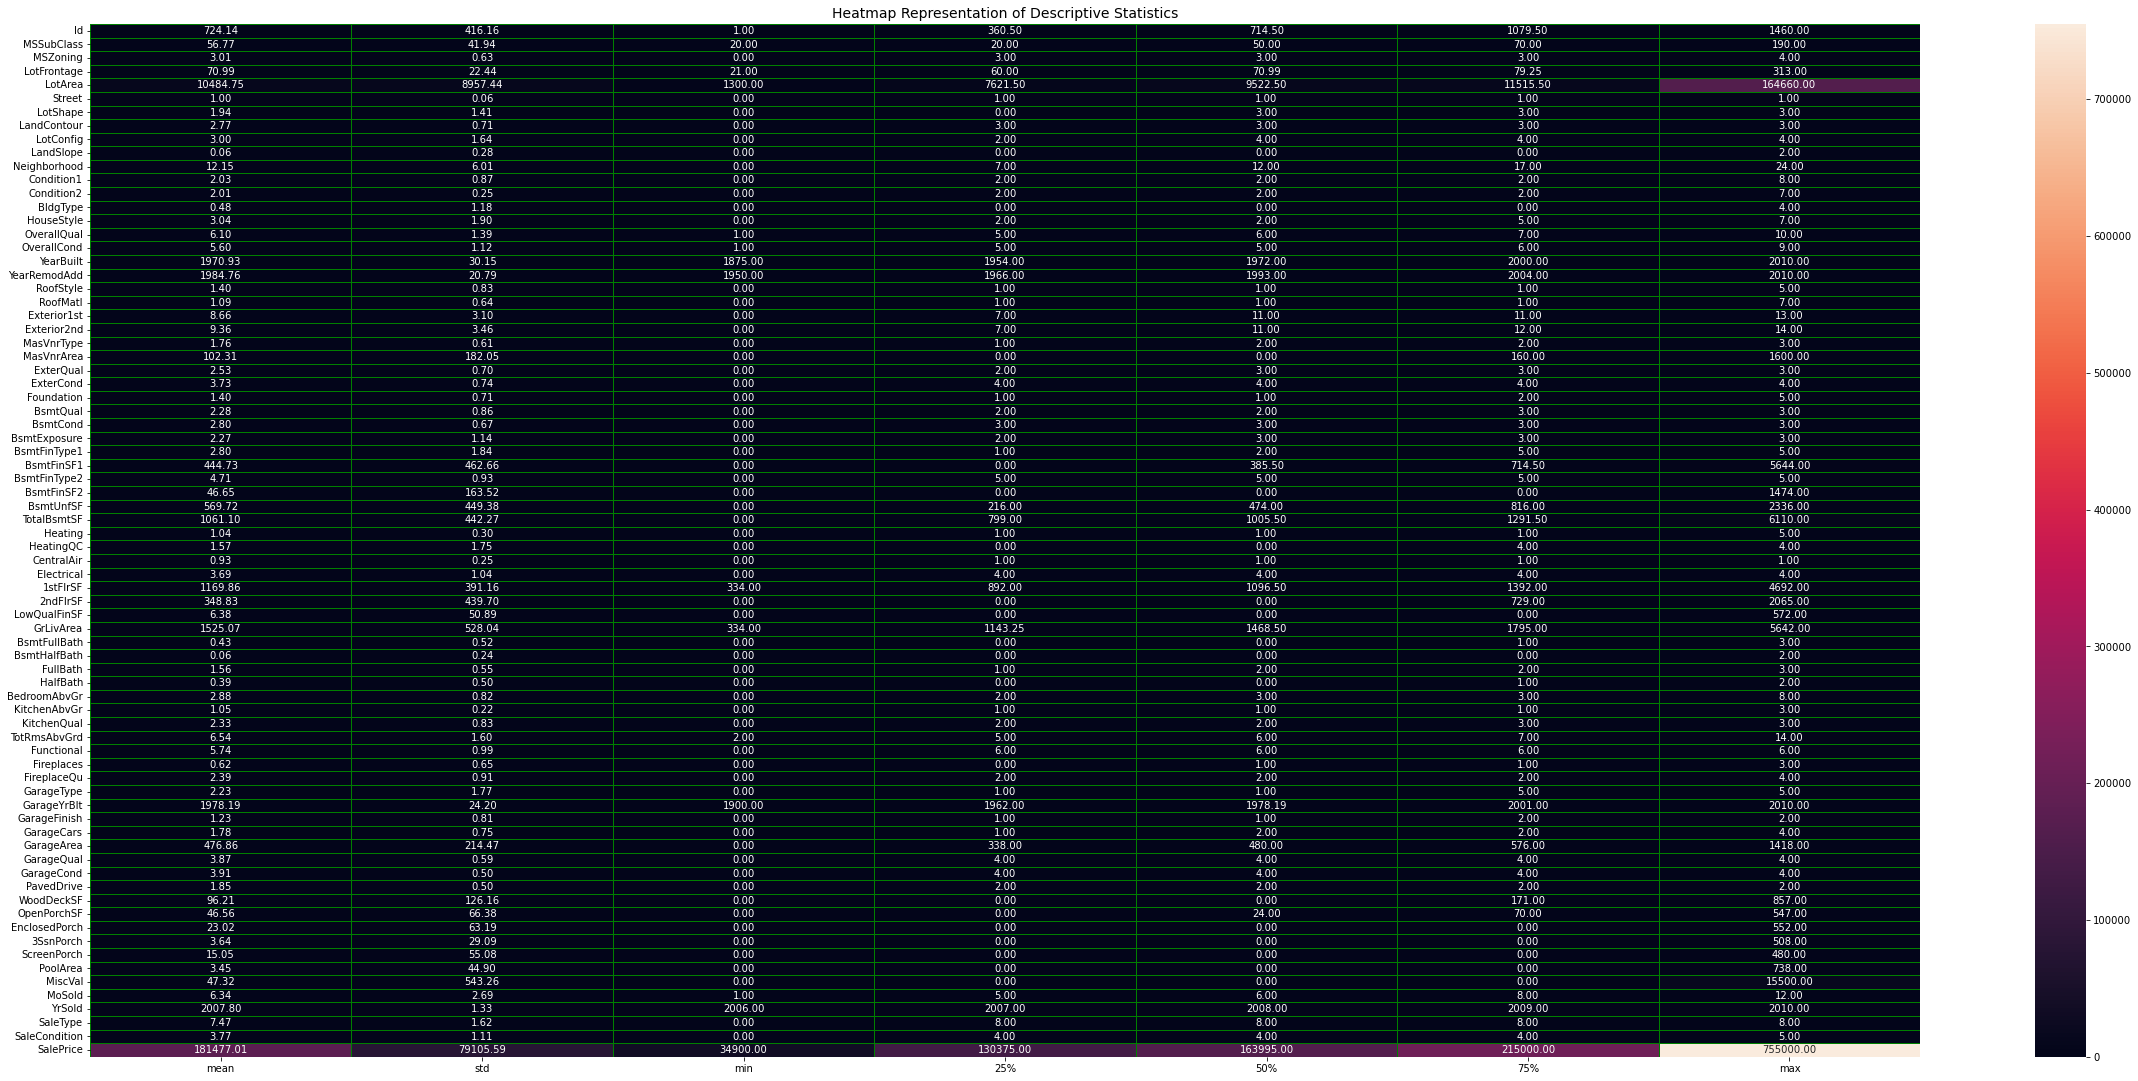

In [66]:
plt.figure(figsize=(41,19))
sns.heatmap(df_train.describe()[1:].transpose(),annot=True,linecolor='Green',linewidth='0.5',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

##### Correlation

In [67]:
df_train.corr().SalePrice.sort_values()[0:50]

BsmtQual        -0.626850
ExterQual       -0.624820
KitchenQual     -0.592468
GarageFinish    -0.537121
HeatingQC       -0.406604
GarageType      -0.299470
BsmtExposure    -0.268559
LotShape        -0.248171
MSZoning        -0.133221
KitchenAbvGr    -0.132108
EnclosedPorch   -0.115004
Heating         -0.100021
BsmtFinType1    -0.092109
BldgType        -0.066028
OverallCond     -0.065642
MSSubClass      -0.060775
LotConfig       -0.060452
SaleType        -0.050851
YrSold          -0.045508
LowQualFinSF    -0.032381
Id              -0.023897
MiscVal         -0.013071
BsmtHalfBath    -0.011109
BsmtFinSF2      -0.010151
MasVnrType       0.007732
LandSlope        0.015485
BsmtFinType2     0.032285
LandContour      0.032836
Condition2       0.033956
Street           0.044753
BsmtCond         0.048125
3SsnPorch        0.060119
MoSold           0.072764
GarageQual       0.080795
FireplaceQu      0.082705
Exterior2nd      0.097541
ScreenPorch      0.100284
PoolArea         0.103280
Condition1  

In [68]:
df_train.corr().SalePrice.sort_values()[49:77]

BsmtUnfSF        0.215724
SaleCondition    0.217687
PavedDrive       0.231707
Electrical       0.234621
CentralAir       0.246754
LotArea          0.249499
HalfBath         0.295592
WoodDeckSF       0.315444
LotFrontage      0.323779
2ndFlrSF         0.330386
OpenPorchSF      0.339500
BsmtFinSF1       0.362874
Foundation       0.374169
GarageYrBlt      0.458007
Fireplaces       0.459611
MasVnrArea       0.463626
YearRemodAdd     0.507831
YearBuilt        0.514408
TotRmsAbvGrd     0.528363
FullBath         0.554988
1stFlrSF         0.587642
TotalBsmtSF      0.595042
GarageArea       0.619000
GarageCars       0.628329
GrLivArea        0.707300
OverallQual      0.789185
SalePrice        1.000000
Name: SalePrice, dtype: float64

##### Attributes-OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt are highly and strongly correlated whereas attributes BsmtQual,ExterQual,KitchenQual,GarageFinish are strongly negative correlated with respect to the target variable SalePrice. Rest are either nominal correlated,zero correlated or negative correlated. Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process

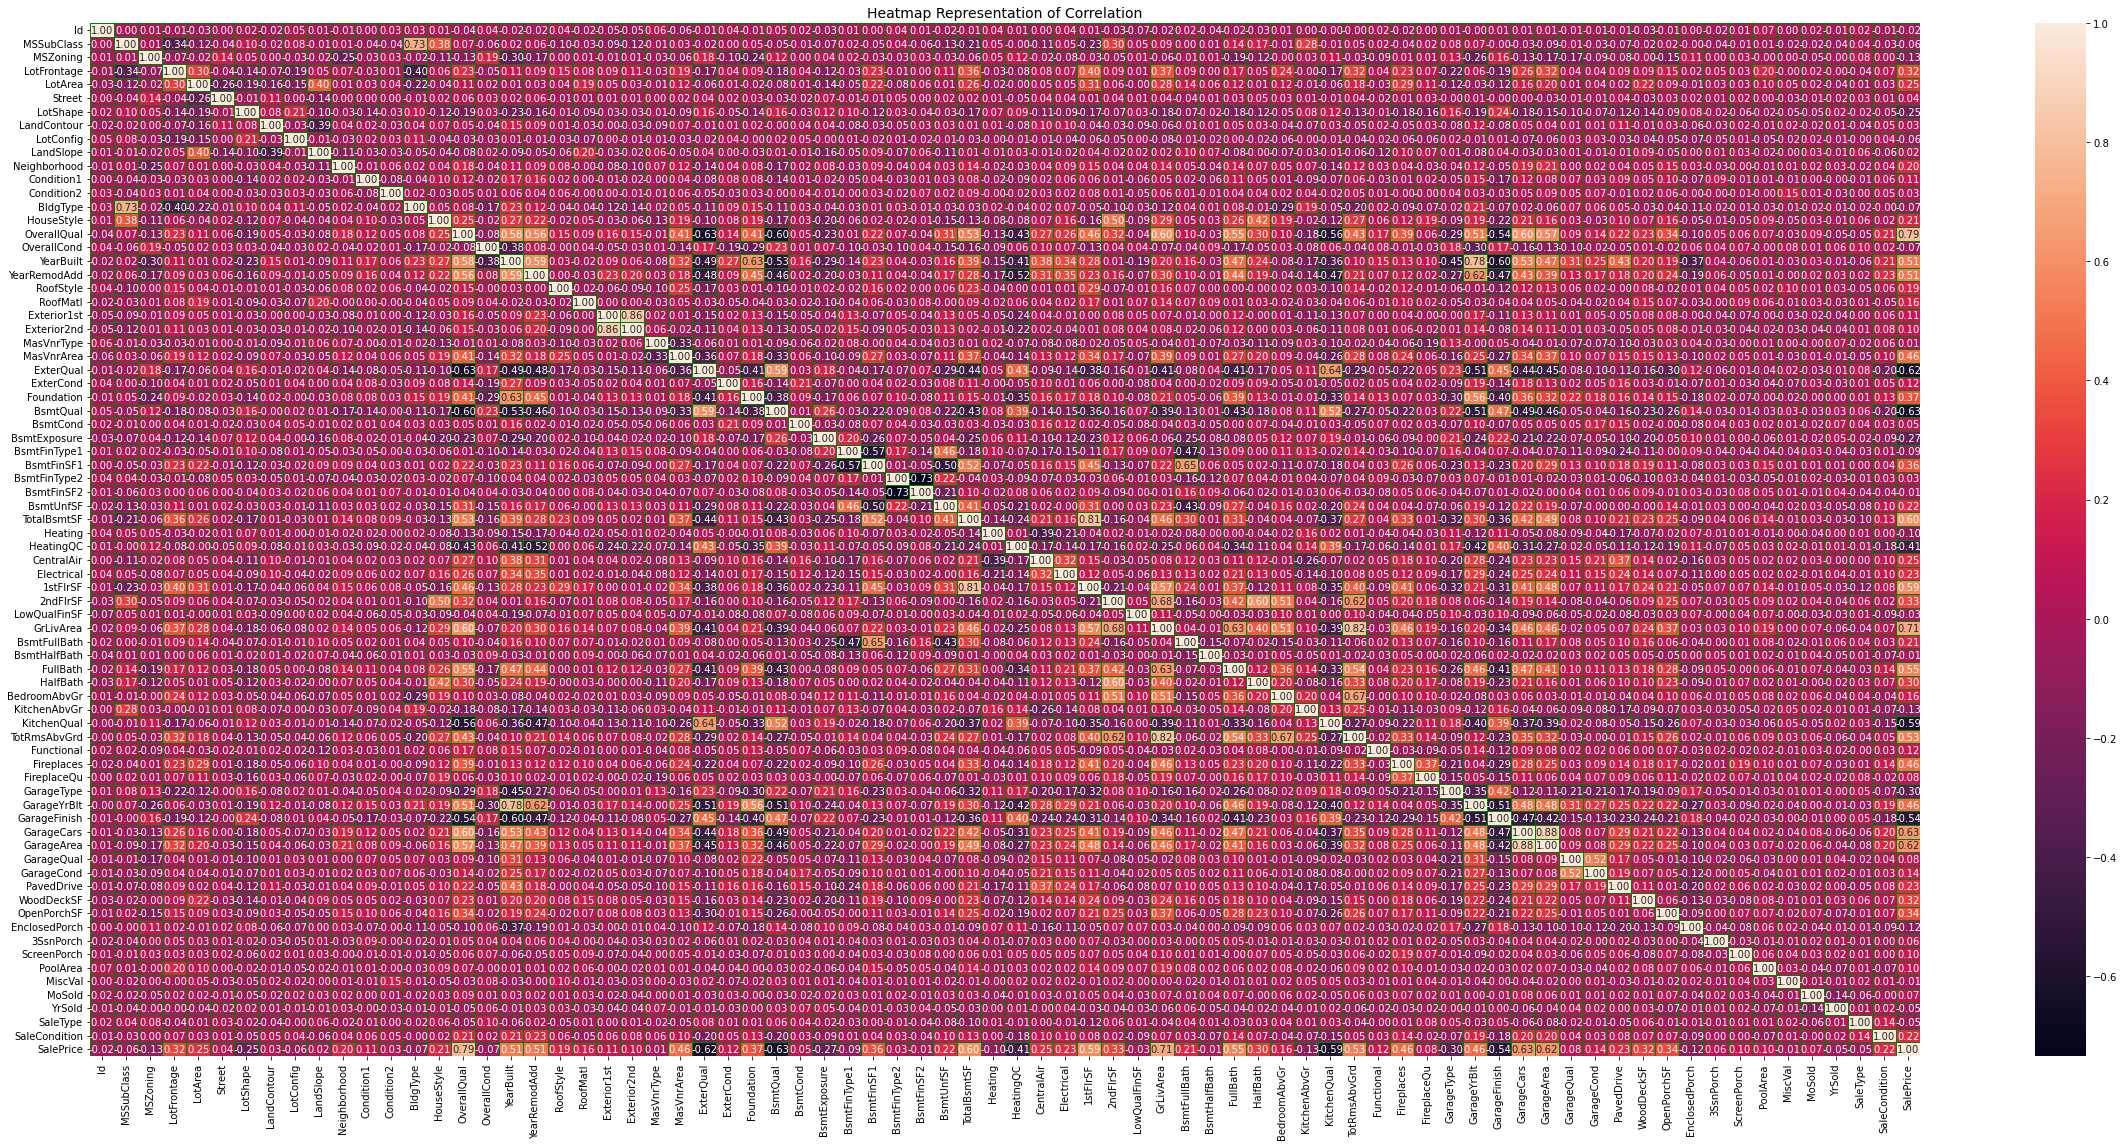

In [69]:
plt.figure(figsize=(41,19))
sns.heatmap(df_train.corr(),annot=True,linecolor='green',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

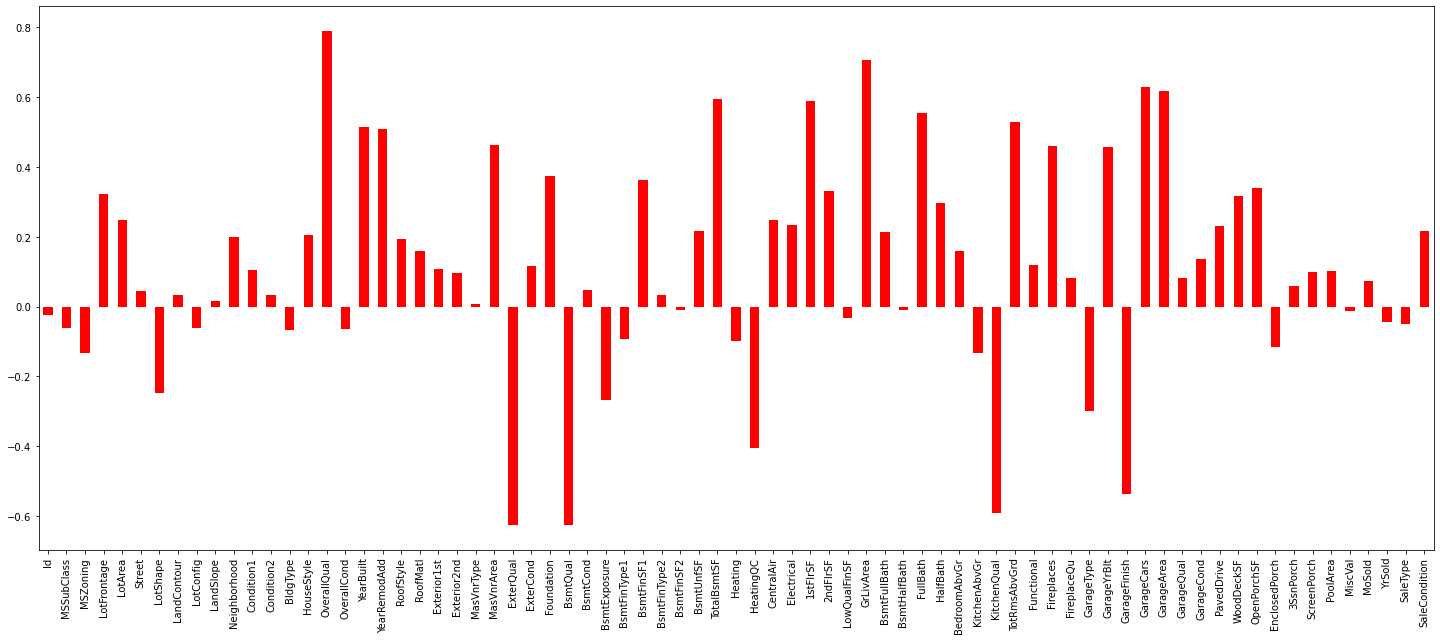

In [70]:
plt.figure(figsize=(25,10))
df_train.corr()['SalePrice'].drop(['SalePrice']).plot(kind='bar',color='r')
plt.show()

#### Skewness

In [71]:
df_train.skew().sort_values()[0:51]

Street          -17.021969
GarageCond       -5.422472
GarageQual       -4.582386
Functional       -3.999663
SaleType         -3.660513
BsmtFinType2     -3.615783
CentralAir       -3.475188
BsmtCond         -3.293554
PavedDrive       -3.274035
LandContour      -3.125982
Electrical       -3.104209
SaleCondition    -2.671829
ExterCond        -2.516219
ExterQual        -1.810843
MSZoning         -1.796785
KitchenQual      -1.408106
BsmtQual         -1.343781
BsmtExposure     -1.166987
LotConfig        -1.118821
GarageYrBlt      -0.662934
Exterior1st      -0.612816
LotShape         -0.603775
Exterior2nd      -0.592349
YearBuilt        -0.579204
YearRemodAdd     -0.495864
GarageFinish     -0.450190
GarageCars       -0.358556
MasVnrType       -0.104609
BsmtFinType1     -0.068901
Foundation       -0.002761
Id                0.026526
Neighborhood      0.043735
FullBath          0.057809
YrSold            0.115765
OverallQual       0.175082
GarageArea        0.189665
MoSold            0.220979
B

In [72]:
df_train.skew().sort_values()[50:77]

GrLivArea         1.449952
RoofStyle         1.498560
WoodDeckSF        1.504929
1stFlrSF          1.513707
TotalBsmtSF       1.744591
BsmtFinSF1        1.871606
SalePrice         1.953878
BldgType          2.318657
OpenPorchSF       2.410840
LotFrontage       2.710383
MasVnrArea        2.834658
Condition1        3.008289
EnclosedPorch     3.043610
ScreenPorch       4.105741
BsmtHalfBath      4.264403
KitchenAbvGr      4.365259
BsmtFinSF2        4.365829
LandSlope         4.812568
RoofMatl          7.577352
LowQualFinSF      8.666142
3SsnPorch         9.770611
Heating          10.103609
LotArea          10.659285
Condition2       11.514458
PoolArea         13.243711
MiscVal          23.065943
dtype: float64

##### The threshold value of Skewness is +/=0.5. lot of Attributes are either skewed right or left. will remove skewness from these columns later on in data cleansing part,also will not touch target column and categorical columns for removing the skewness.

#### Distribution Plot
Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side¶

The Distribution Plot for attribute "Id" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


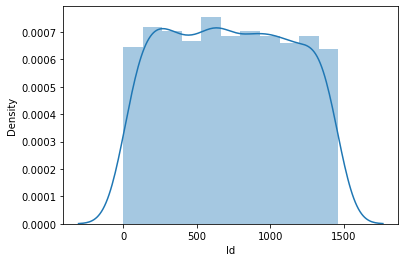



The Distribution Plot for attribute "MSSubClass" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


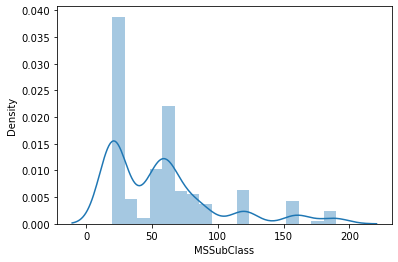



The Distribution Plot for attribute "MSZoning" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


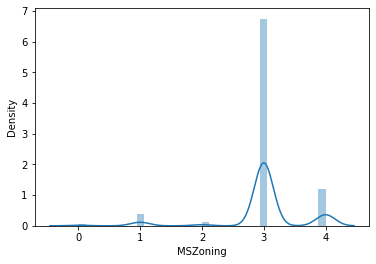



The Distribution Plot for attribute "LotFrontage" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


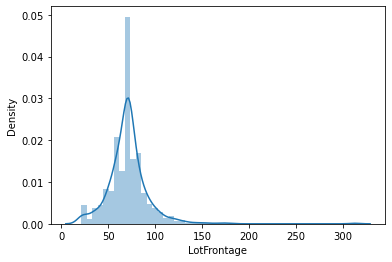



The Distribution Plot for attribute "LotArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


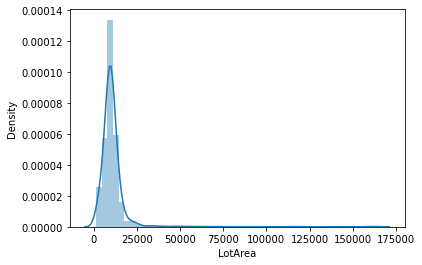



The Distribution Plot for attribute "Street" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


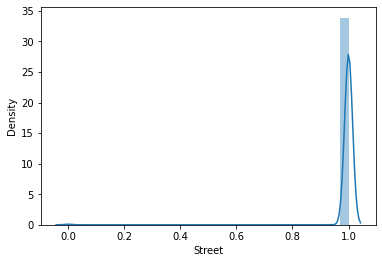



The Distribution Plot for attribute "LotShape" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


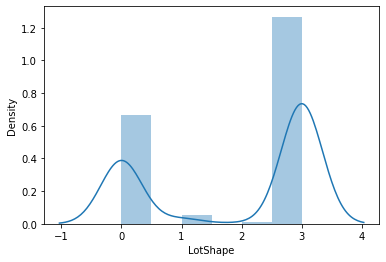



The Distribution Plot for attribute "LandContour" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


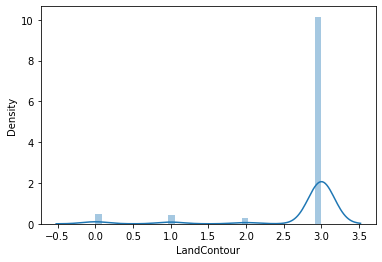



The Distribution Plot for attribute "LotConfig" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


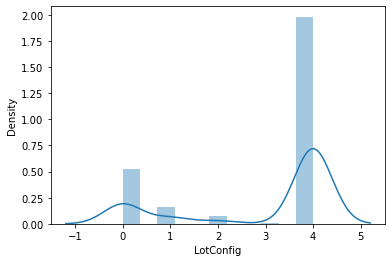



The Distribution Plot for attribute "LandSlope" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


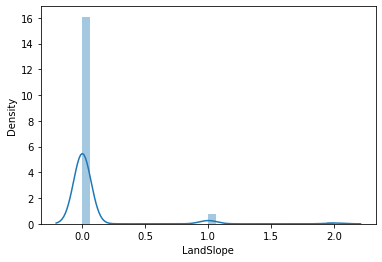



The Distribution Plot for attribute "Neighborhood" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


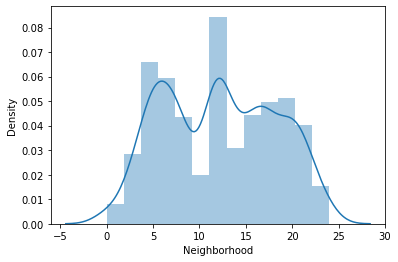



The Distribution Plot for attribute "Condition1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


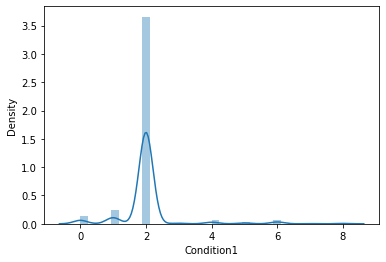



The Distribution Plot for attribute "Condition2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


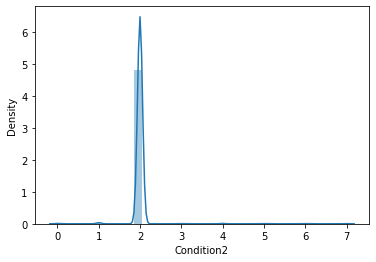



The Distribution Plot for attribute "BldgType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


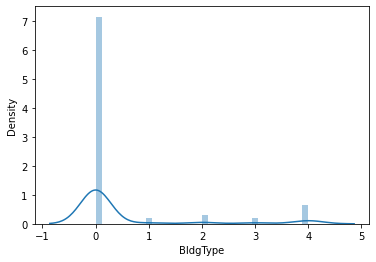



The Distribution Plot for attribute "HouseStyle" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


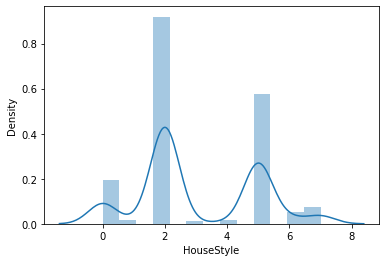



The Distribution Plot for attribute "OverallQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


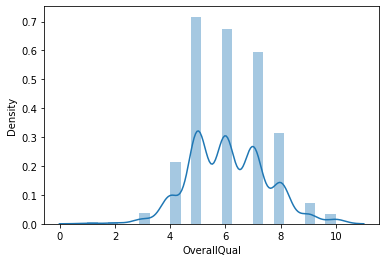



The Distribution Plot for attribute "OverallCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


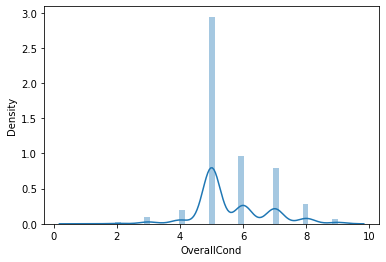



The Distribution Plot for attribute "YearBuilt" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


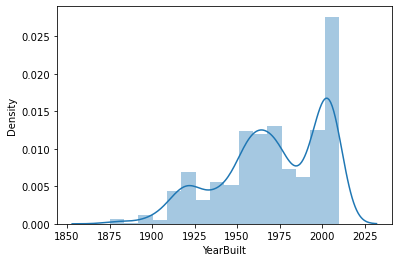



The Distribution Plot for attribute "YearRemodAdd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


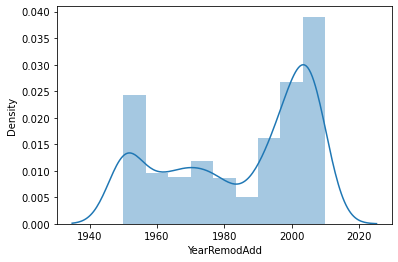



The Distribution Plot for attribute "RoofStyle" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


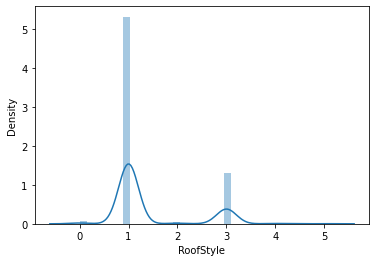



The Distribution Plot for attribute "RoofMatl" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


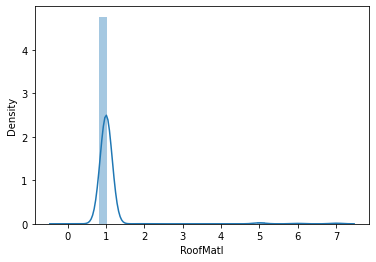



The Distribution Plot for attribute "Exterior1st" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


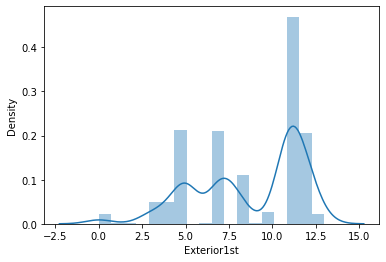



The Distribution Plot for attribute "Exterior2nd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


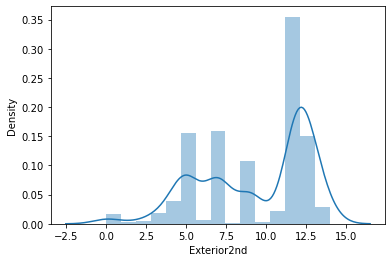



The Distribution Plot for attribute "MasVnrType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


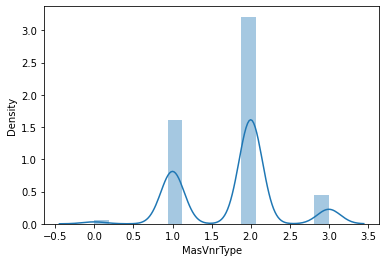



The Distribution Plot for attribute "MasVnrArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


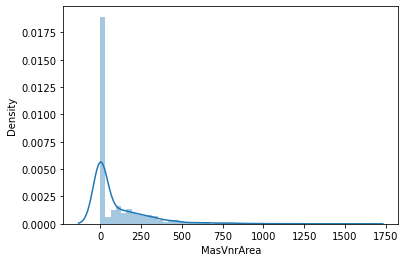



The Distribution Plot for attribute "ExterQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


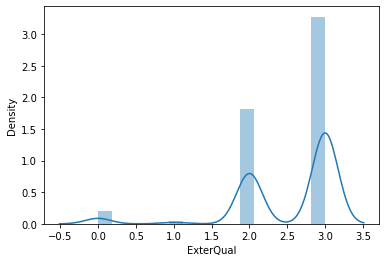



The Distribution Plot for attribute "ExterCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


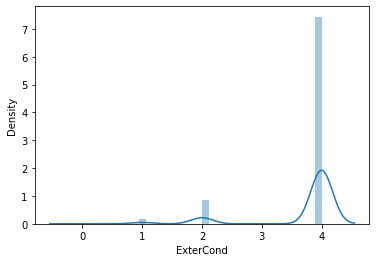



The Distribution Plot for attribute "Foundation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


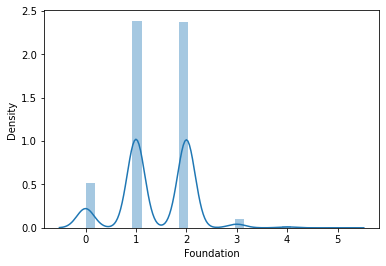



The Distribution Plot for attribute "BsmtQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


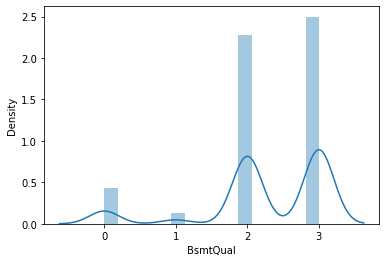



The Distribution Plot for attribute "BsmtCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


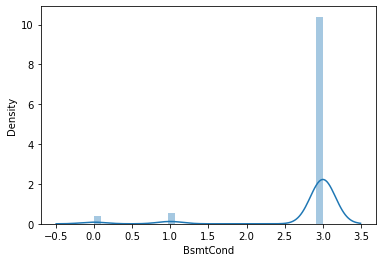



The Distribution Plot for attribute "BsmtExposure" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


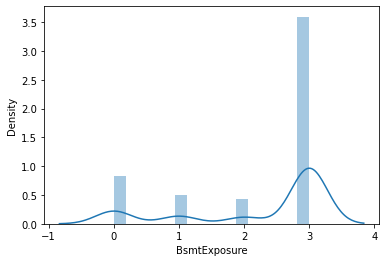



The Distribution Plot for attribute "BsmtFinType1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


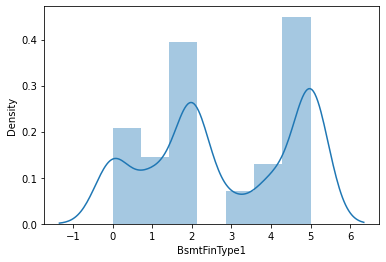



The Distribution Plot for attribute "BsmtFinSF1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


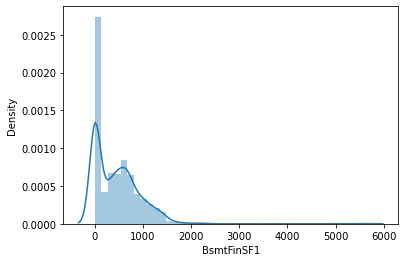



The Distribution Plot for attribute "BsmtFinType2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


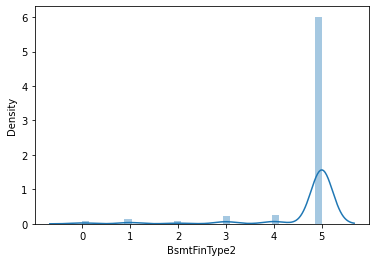



The Distribution Plot for attribute "BsmtFinSF2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


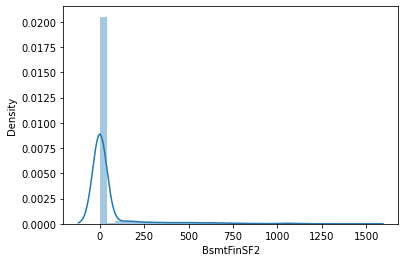



The Distribution Plot for attribute "BsmtUnfSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


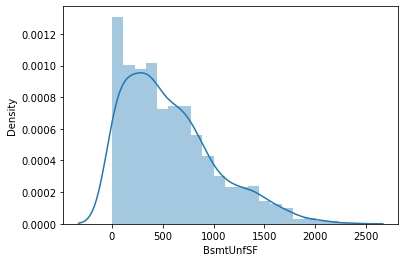



The Distribution Plot for attribute "TotalBsmtSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


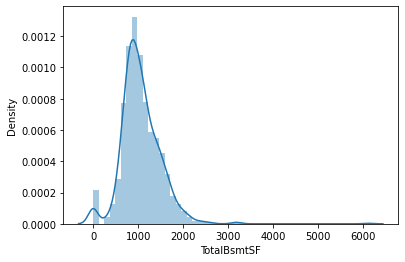



The Distribution Plot for attribute "Heating" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


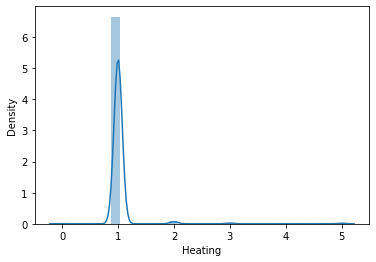



The Distribution Plot for attribute "HeatingQC" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


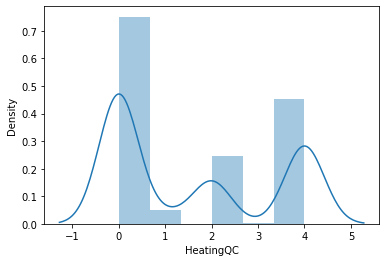



The Distribution Plot for attribute "CentralAir" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


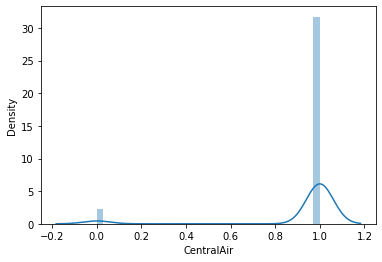



The Distribution Plot for attribute "Electrical" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


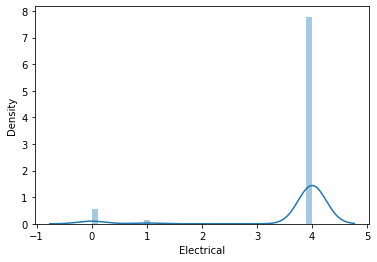



The Distribution Plot for attribute "1stFlrSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


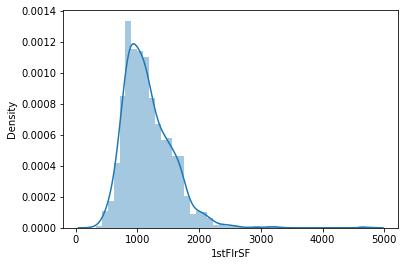



The Distribution Plot for attribute "2ndFlrSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


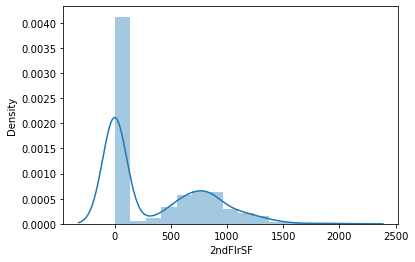



The Distribution Plot for attribute "LowQualFinSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


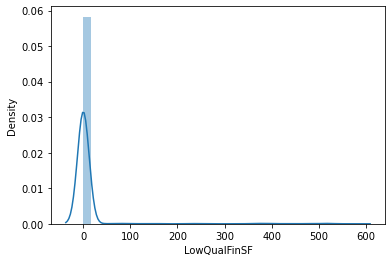



The Distribution Plot for attribute "GrLivArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


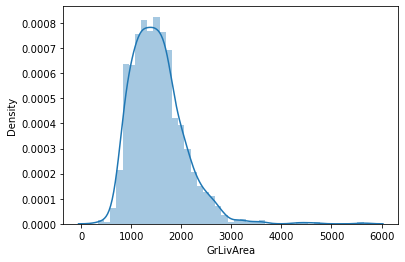



The Distribution Plot for attribute "BsmtFullBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


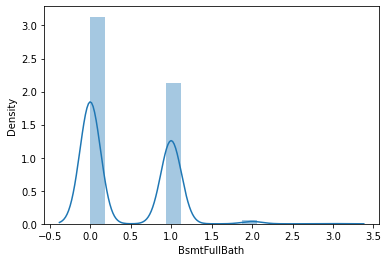



The Distribution Plot for attribute "BsmtHalfBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


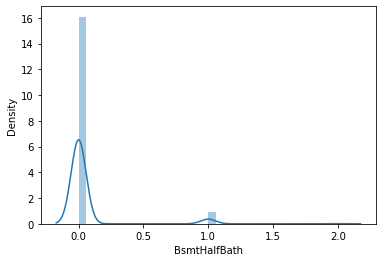



The Distribution Plot for attribute "FullBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


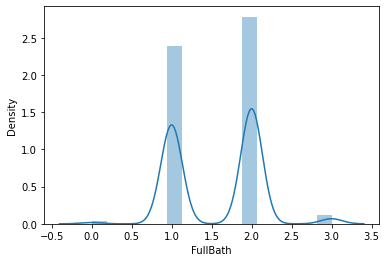



The Distribution Plot for attribute "HalfBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


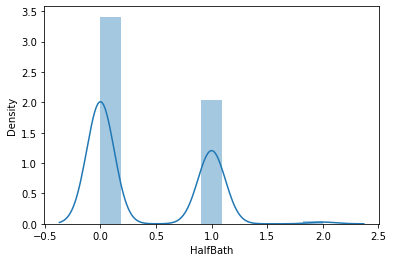



The Distribution Plot for attribute "BedroomAbvGr" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


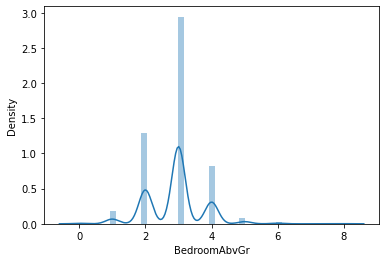



The Distribution Plot for attribute "KitchenAbvGr" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


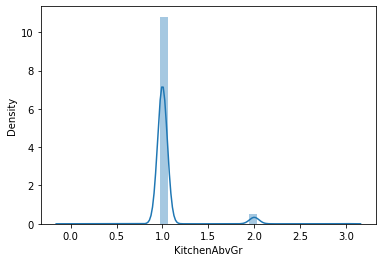



The Distribution Plot for attribute "KitchenQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


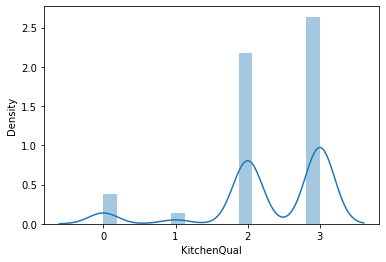



The Distribution Plot for attribute "TotRmsAbvGrd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


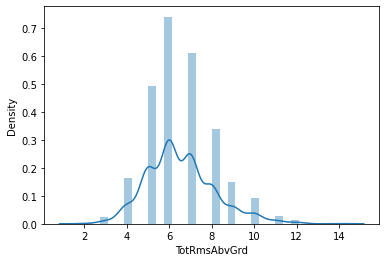



The Distribution Plot for attribute "Functional" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


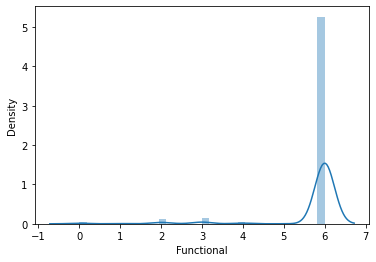



The Distribution Plot for attribute "Fireplaces" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


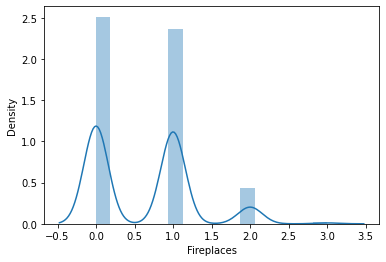



The Distribution Plot for attribute "FireplaceQu" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


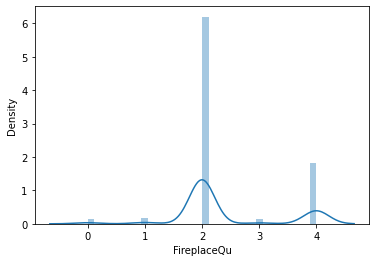



The Distribution Plot for attribute "GarageType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


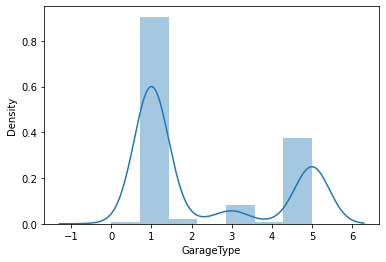



The Distribution Plot for attribute "GarageYrBlt" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


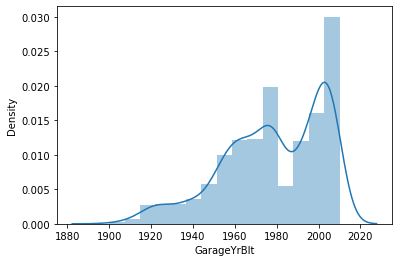



The Distribution Plot for attribute "GarageFinish" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


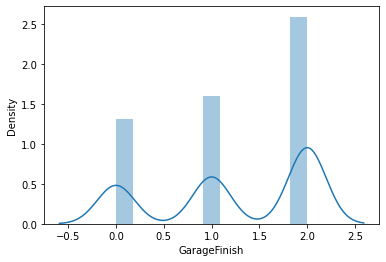



The Distribution Plot for attribute "GarageCars" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


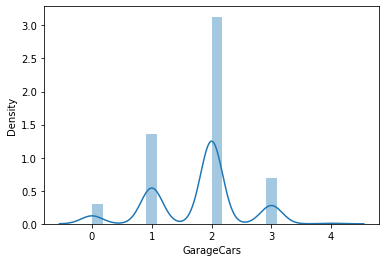



The Distribution Plot for attribute "GarageArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


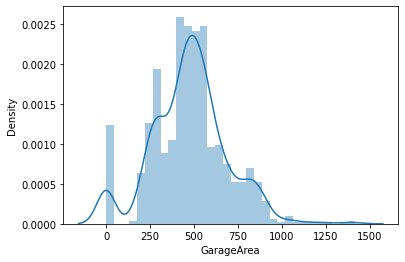



The Distribution Plot for attribute "GarageQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


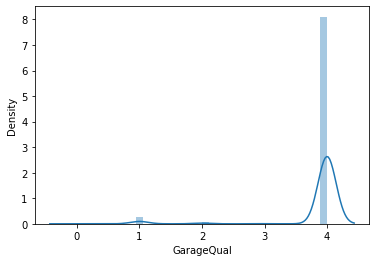



The Distribution Plot for attribute "GarageCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


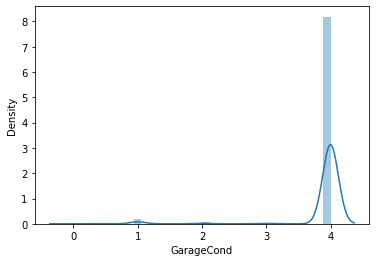



The Distribution Plot for attribute "PavedDrive" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


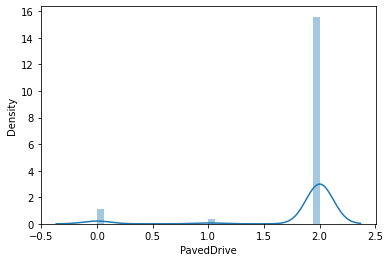



The Distribution Plot for attribute "WoodDeckSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


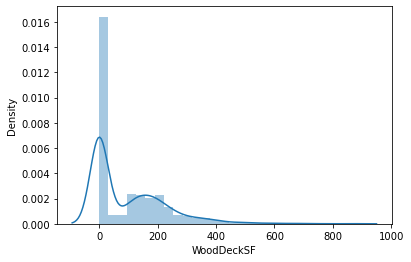



The Distribution Plot for attribute "OpenPorchSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


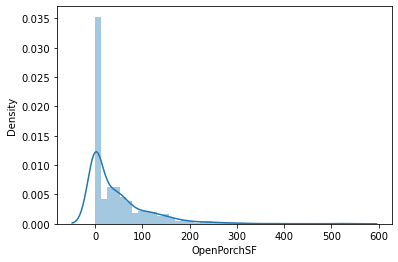



The Distribution Plot for attribute "EnclosedPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


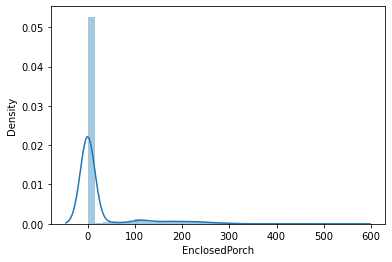



The Distribution Plot for attribute "3SsnPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


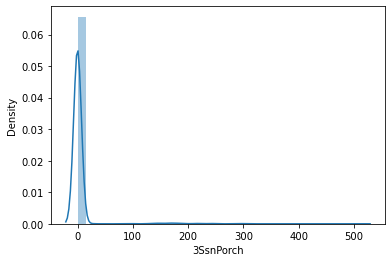



The Distribution Plot for attribute "ScreenPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


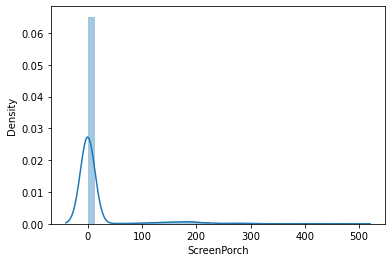



The Distribution Plot for attribute "PoolArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


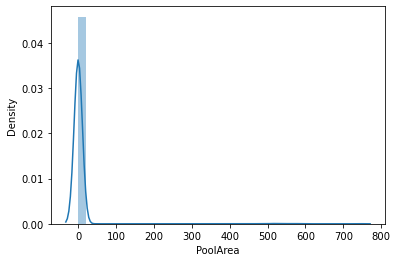



The Distribution Plot for attribute "MiscVal" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


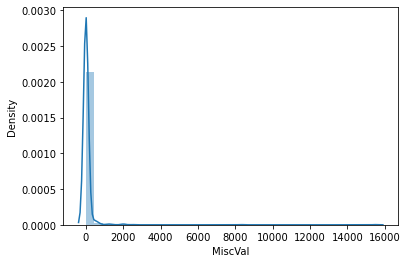



The Distribution Plot for attribute "MoSold" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


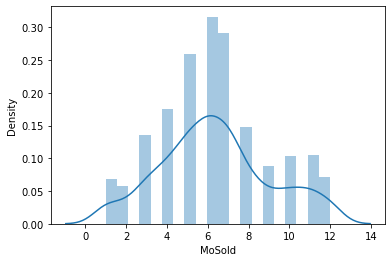



The Distribution Plot for attribute "YrSold" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


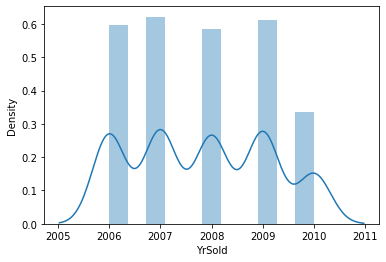



The Distribution Plot for attribute "SaleType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


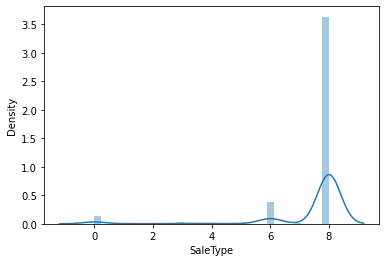



The Distribution Plot for attribute "SaleCondition" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


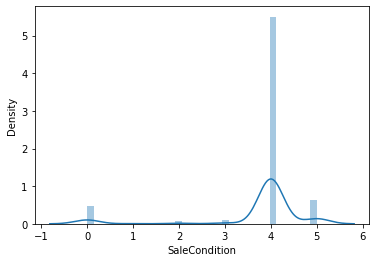



The Distribution Plot for attribute "SalePrice" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


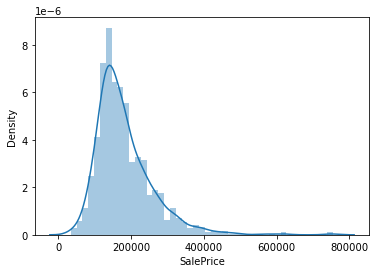

In [73]:
for i in df_train.columns:
    print(f'The Distribution Plot for attribute "{i}" is-\n {sns.distplot(df_train[i])}')
    plt.show()
    print('\n')

##### As we can see in the above distribution plots almost all of the attributes are skewed both right ad left hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method

##### Outliers

In [74]:
z=np.abs(zscore(df_train))
np.where(z>3)

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64),
 array([ 9, 20, 34, ..., 39, 62, 63], dtype=int64))

In [75]:
print(z.iloc[1,9])
print(z.iloc[1,20])
print(z.iloc[1166,62])

3.295414143816642
6.09040757742434
5.775751744301283


In [76]:
z1=np.abs(zscore(df_test))
np.where(z1>3)

(array([  1,   1,   3,   8,   8,   8,   9,  10,  10,  10,  11,  12,  12,
         12,  13,  13,  13,  13,  14,  15,  19,  20,  20,  23,  23,  23,
         23,  23,  23,  24,  24,  24,  29,  29,  29,  30,  30,  32,  33,
         33,  34,  34,  34,  36,  38,  40,  45,  45,  46,  46,  47,  47,
         47,  49,  50,  51,  52,  53,  53,  54,  55,  55,  55,  58,  58,
         58,  58,  58,  58,  66,  69,  71,  71,  71,  71,  71,  71,  72,
         72,  72,  73,  73,  73,  74,  79,  81,  81,  81,  82,  82,  83,
         83,  85,  85,  85,  86,  86,  87,  88,  91,  92,  92,  92, 102,
        102, 105, 105, 105, 106, 106, 107, 107, 107, 109, 109, 109, 112,
        113, 113, 114, 115, 115, 115, 116, 117, 118, 119, 122, 123, 123,
        124, 124, 127, 127, 127, 127, 128, 128, 128, 128, 128, 129, 129,
        129, 130, 130, 133, 134, 134, 134, 139, 140, 140, 140, 141, 141,
        141, 141, 141, 141, 141, 142, 142, 143, 143, 144, 146, 146, 146,
        146, 146, 147, 148, 151, 154, 154, 154, 155

In [77]:
print(z1.iloc[1,73])
print(z1.iloc[1,74])
print(z1.iloc[3,7])

0.8635554105330157
6.494180025568835
3.998799140862078


#### Boxplots To check the Outliers

The Box-Plot for attribute "Id" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


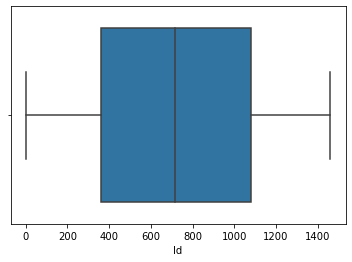



The Box-Plot for attribute "MSSubClass" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


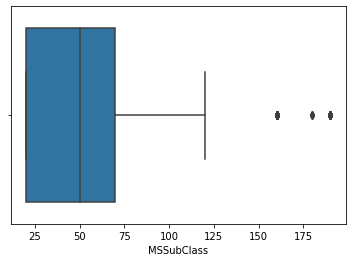



The Box-Plot for attribute "MSZoning" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


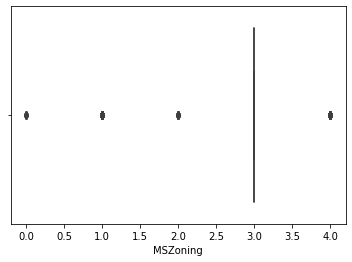



The Box-Plot for attribute "LotFrontage" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


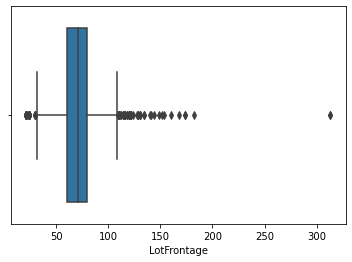



The Box-Plot for attribute "LotArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


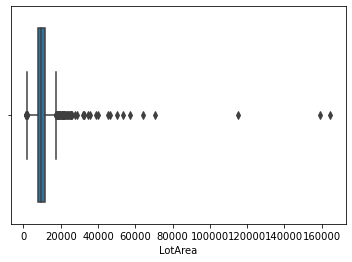



The Box-Plot for attribute "Street" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


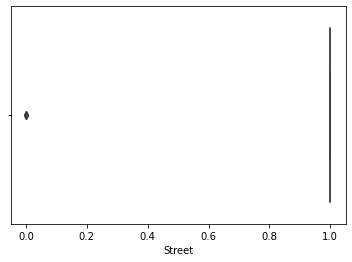



The Box-Plot for attribute "LotShape" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


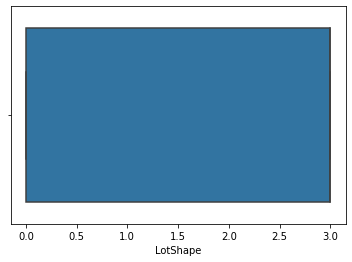



The Box-Plot for attribute "LandContour" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


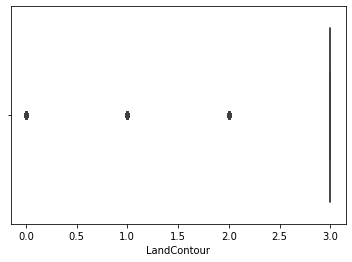



The Box-Plot for attribute "LotConfig" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


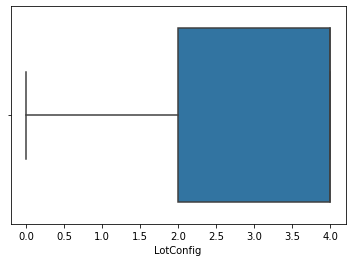



The Box-Plot for attribute "LandSlope" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


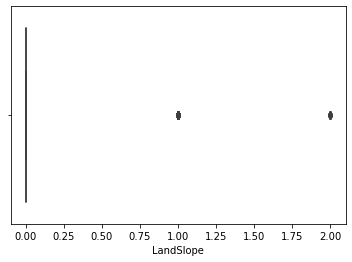



The Box-Plot for attribute "Neighborhood" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


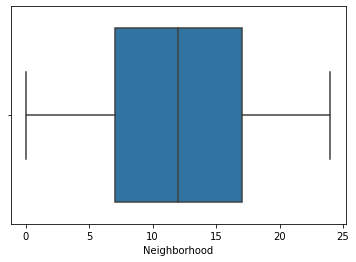



The Box-Plot for attribute "Condition1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


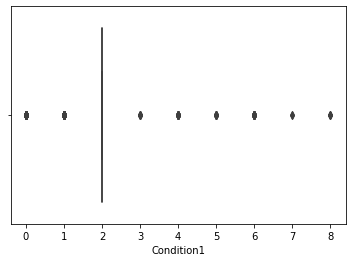



The Box-Plot for attribute "Condition2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


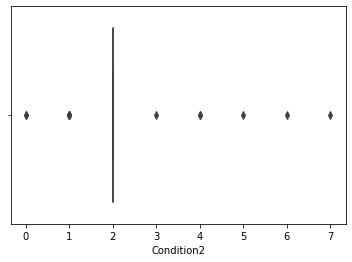



The Box-Plot for attribute "BldgType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


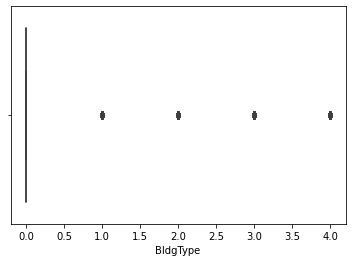



The Box-Plot for attribute "HouseStyle" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


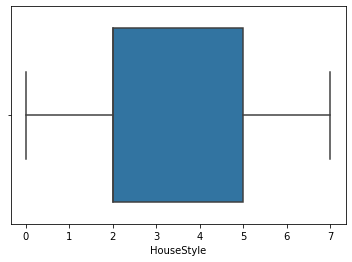



The Box-Plot for attribute "OverallQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


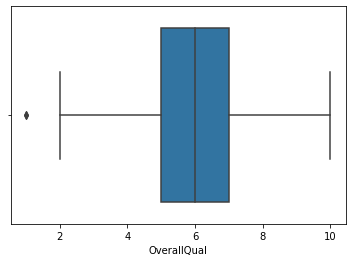



The Box-Plot for attribute "OverallCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


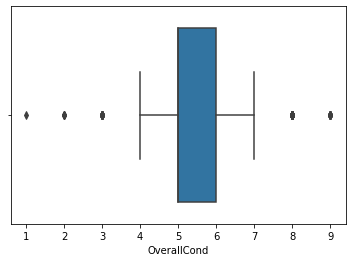



The Box-Plot for attribute "YearBuilt" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


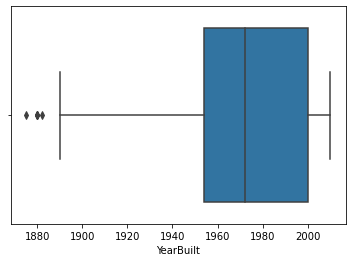



The Box-Plot for attribute "YearRemodAdd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


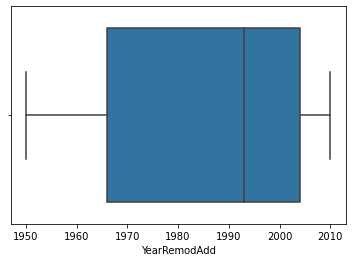



The Box-Plot for attribute "RoofStyle" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


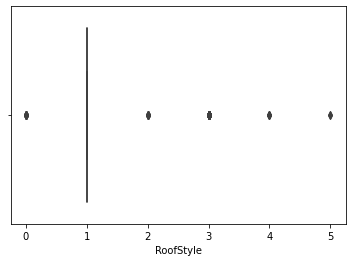



The Box-Plot for attribute "RoofMatl" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


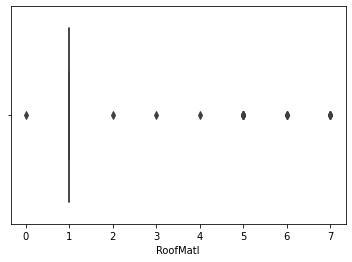



The Box-Plot for attribute "Exterior1st" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


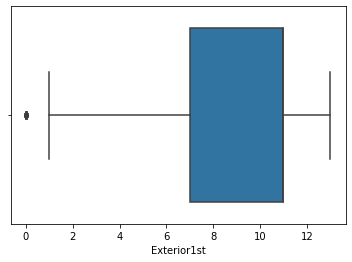



The Box-Plot for attribute "Exterior2nd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


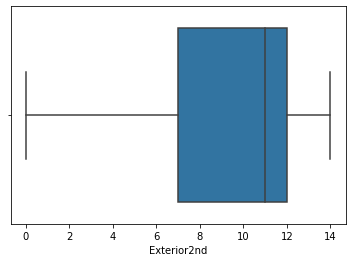



The Box-Plot for attribute "MasVnrType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


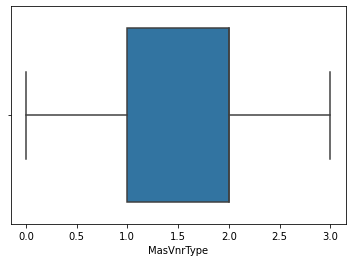



The Box-Plot for attribute "MasVnrArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


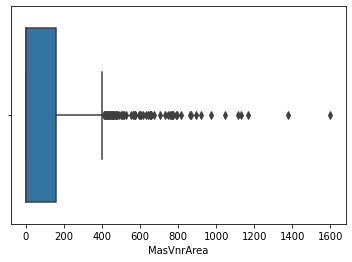



The Box-Plot for attribute "ExterQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


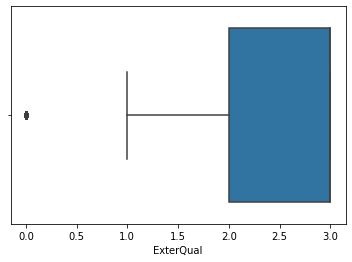



The Box-Plot for attribute "ExterCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


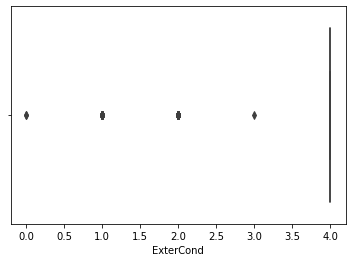



The Box-Plot for attribute "Foundation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


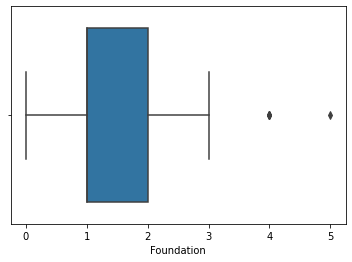



The Box-Plot for attribute "BsmtQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


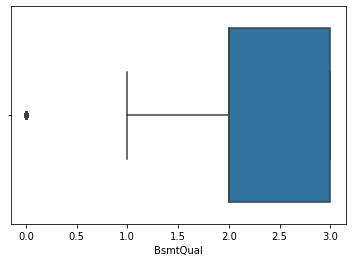



The Box-Plot for attribute "BsmtCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


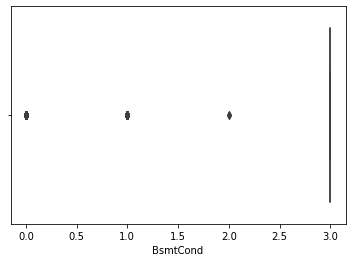



The Box-Plot for attribute "BsmtExposure" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


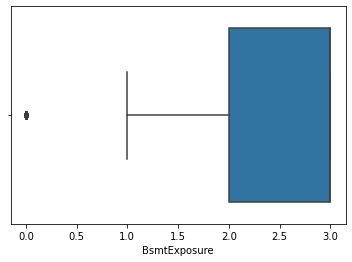



The Box-Plot for attribute "BsmtFinType1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


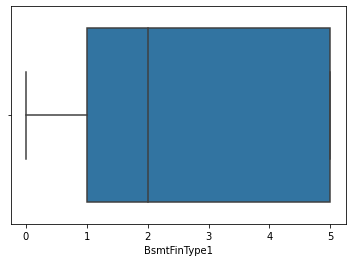



The Box-Plot for attribute "BsmtFinSF1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


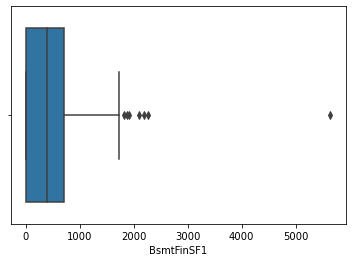



The Box-Plot for attribute "BsmtFinType2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


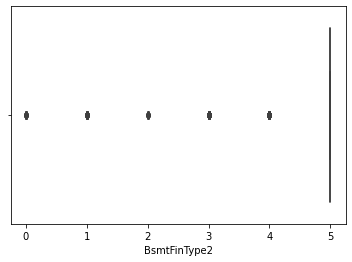



The Box-Plot for attribute "BsmtFinSF2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


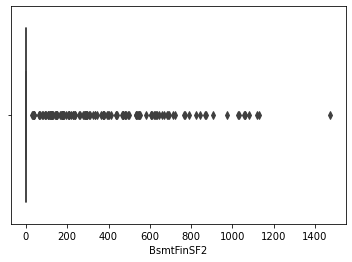



The Box-Plot for attribute "BsmtUnfSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


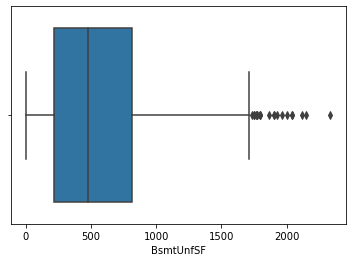



The Box-Plot for attribute "TotalBsmtSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


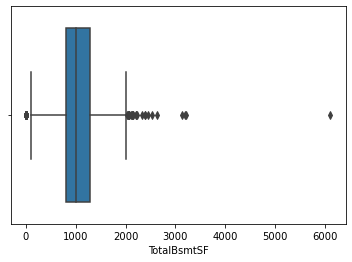



The Box-Plot for attribute "Heating" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


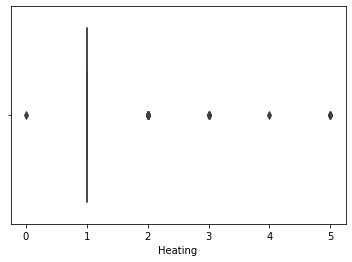



The Box-Plot for attribute "HeatingQC" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


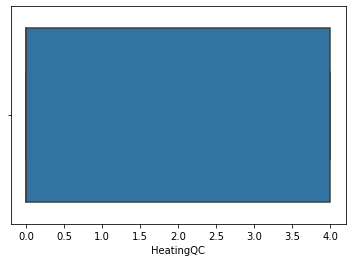



The Box-Plot for attribute "CentralAir" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


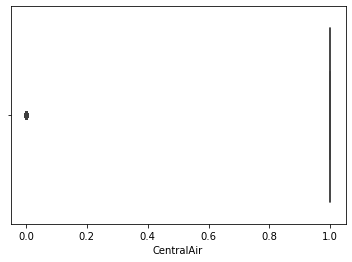



The Box-Plot for attribute "Electrical" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


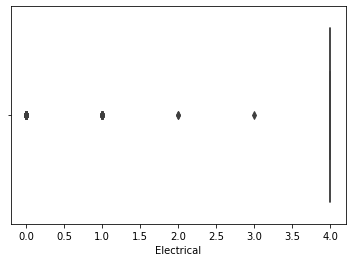



The Box-Plot for attribute "1stFlrSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


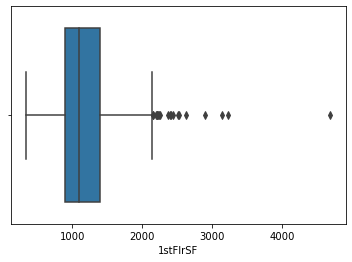



The Box-Plot for attribute "2ndFlrSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


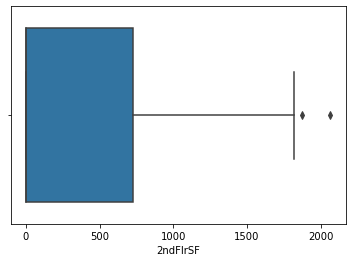



The Box-Plot for attribute "LowQualFinSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


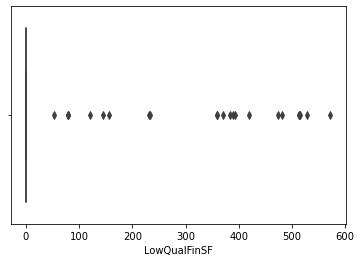



The Box-Plot for attribute "GrLivArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


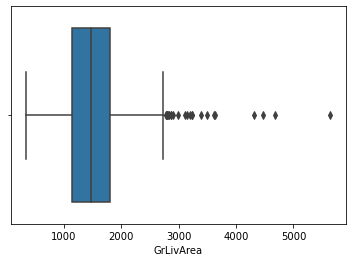



The Box-Plot for attribute "BsmtFullBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


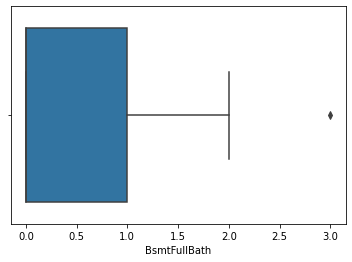



The Box-Plot for attribute "BsmtHalfBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


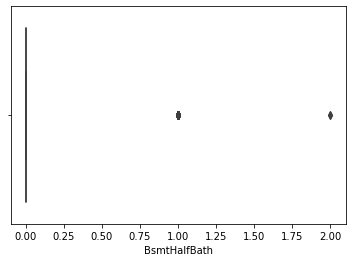



The Box-Plot for attribute "FullBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


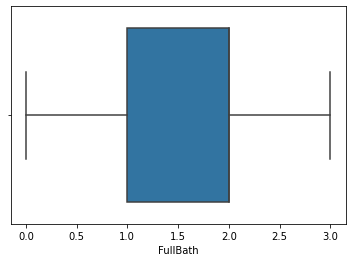



The Box-Plot for attribute "HalfBath" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


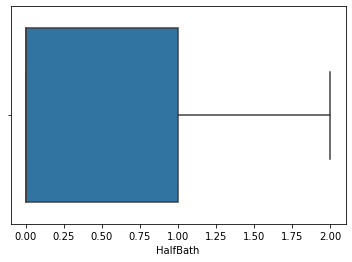



The Box-Plot for attribute "BedroomAbvGr" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


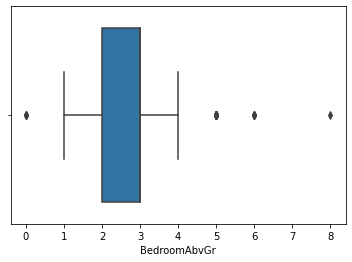



The Box-Plot for attribute "KitchenAbvGr" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


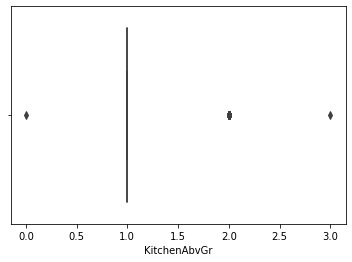



The Box-Plot for attribute "KitchenQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


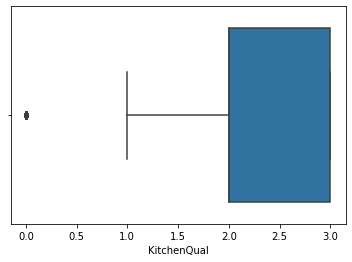



The Box-Plot for attribute "TotRmsAbvGrd" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


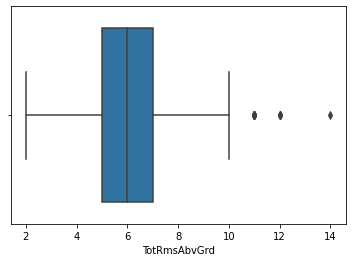



The Box-Plot for attribute "Functional" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


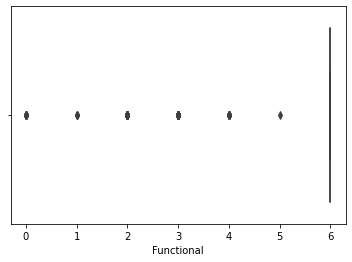



The Box-Plot for attribute "Fireplaces" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


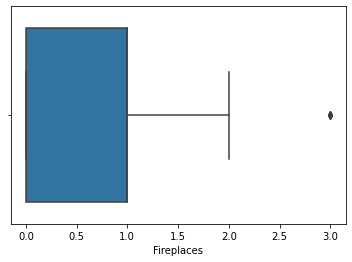



The Box-Plot for attribute "FireplaceQu" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


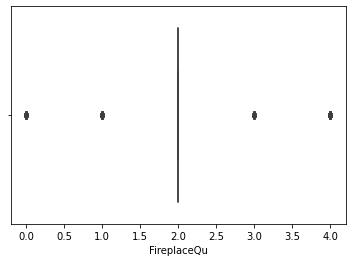



The Box-Plot for attribute "GarageType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


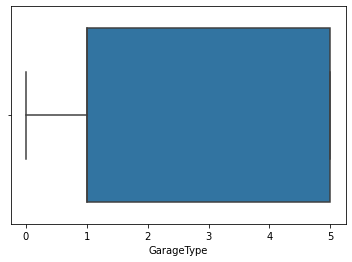



The Box-Plot for attribute "GarageYrBlt" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


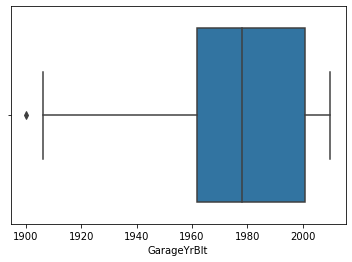



The Box-Plot for attribute "GarageFinish" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


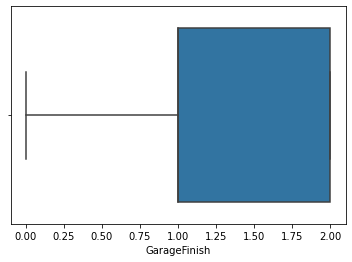



The Box-Plot for attribute "GarageCars" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


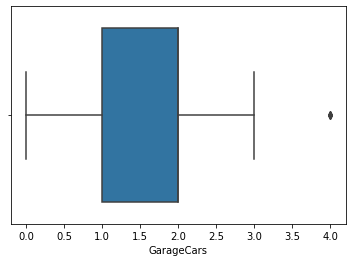



The Box-Plot for attribute "GarageArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


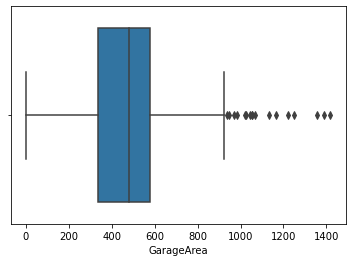



The Box-Plot for attribute "GarageQual" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


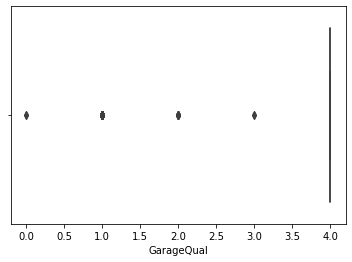



The Box-Plot for attribute "GarageCond" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


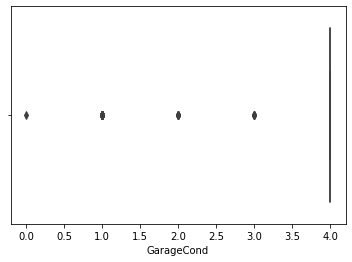



The Box-Plot for attribute "PavedDrive" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


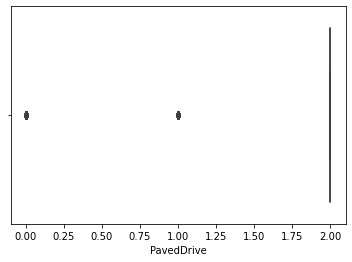



The Box-Plot for attribute "WoodDeckSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


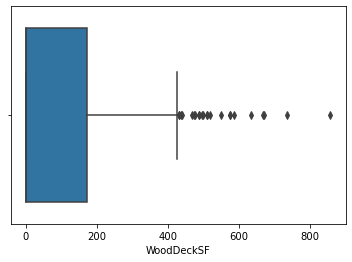



The Box-Plot for attribute "OpenPorchSF" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


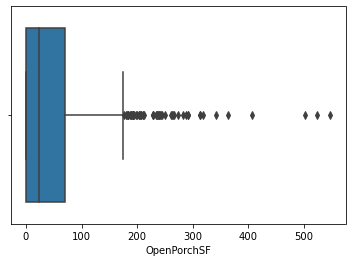



The Box-Plot for attribute "EnclosedPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


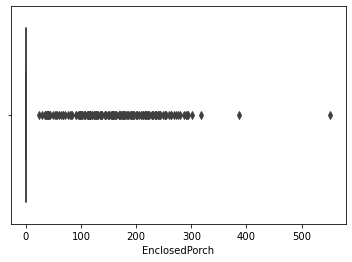



The Box-Plot for attribute "3SsnPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


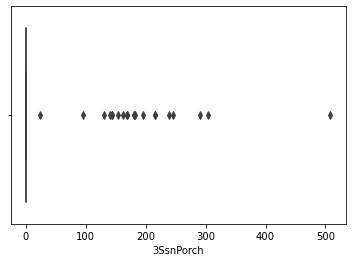



The Box-Plot for attribute "ScreenPorch" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


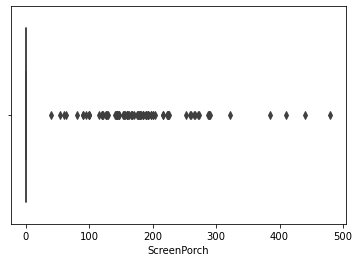



The Box-Plot for attribute "PoolArea" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


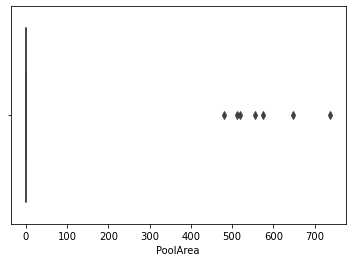



The Box-Plot for attribute "MiscVal" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


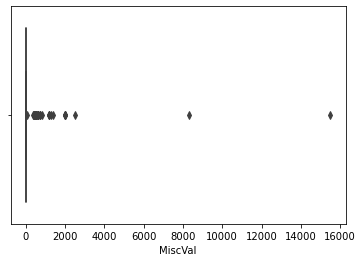



The Box-Plot for attribute "MoSold" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


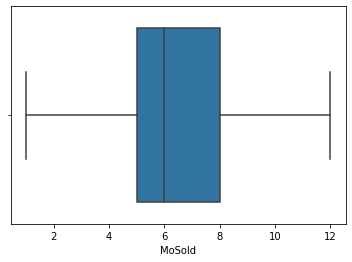



The Box-Plot for attribute "YrSold" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


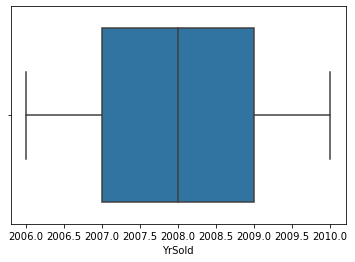



The Box-Plot for attribute "SaleType" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


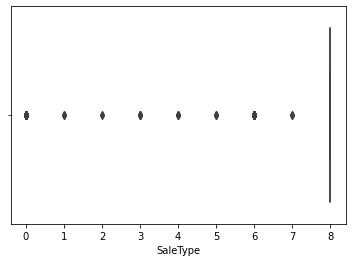



The Box-Plot for attribute "SaleCondition" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


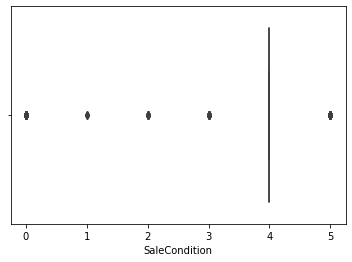



The Box-Plot for attribute "SalePrice" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


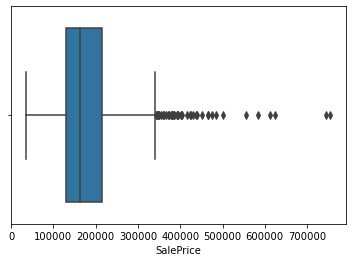

In [78]:
for i in df_train.columns:
    print(f'The Box-Plot for attribute "{i}" is-\n {sns.boxplot(df_train[i])}')
    plt.show()
    print('\n')

##### Data Cleansing

1. Remove Negative Correlation

In [79]:
#will drop all the zero correlated columns in train dataset
df=df_train.drop(['MasVnrType'],axis=1)
df

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0     127         120         3     70.98847     4928       1         0   
1     889          20         3     95.00000    15865       1         0   
2     793          60         3     92.00000     9920       1         0   
3     110          20         3    105.00000    11751       1         0   
4     422          20         3     70.98847    16635       1         0   
...   ...         ...       ...          ...      ...     ...       ...   
1163  289          20         3     70.98847     9819       1         0   
1164  554          20         3     67.00000     8777       1         3   
1165  196         160         3     24.00000     2280       1         3   
1166   31          70         0     50.00000     8500       1         3   
1167  617          60         3     70.98847     7861       1         0   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0               3          4          0            13           2           2   
1               3          4          1            12           2           2   
2               3          1          0            15           2           2   
3               3          4          0            14           2           2   
4               3          2          0            14           2           2   
...           ...        ...        ...           ...         ...         ...   
1163            3          4          0            19           2           2   
1164            3          4          0             7           1           2   
1165            3          2          0            13           2           2   
1166            3          4          0             9           1           2   
1167            3          4          0             8           2           2   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            4           2            6            5       1976          1976   
1            0           2            8            6       1970          1970   
2            0           5            7            5       1996          1997   
3            0           2            6            6       1977          1977   
4            0           2            6            7       1977          2000   
...        ...         ...          ...          ...        ...           ...   
1163         0           2            5            5       1967          1967   
1164         0           2            4            5       1949          2003   
1165         3           5            6            6       1976          1976   
1166         0           5            4            4       1920          1950   
1167         0           5            6            5       2002          2003   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  \
0             1         1            8            9         0.0          3   
1             0         5           12           13         0.0          2   
2             1         1            7            7         0.0          2   
3             3         1            8            9       480.0          3   
4             1         1            4            4       126.0          2   
...         ...       ...          ...          ...         ...        ...   
1163          1         1            7            7        31.0          3   
1164          1         1           11           12         0.0          3   
1165          1         1            8            2         0.0          3   
1166          2         1            3            3         0.0          3   
1167          1         1           11           12         0.0          2   

      ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0             4           1         2         3             3             0   
1             2           2         3         1             1    

In [80]:
#will drop all the same columns in test dataset too to maintain the columns in both the dataset
df1=df_test.drop(['MasVnrType'],axis=1)
df1

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0     337          20         2    86.000000    14157       1         0   
1    1018         120         2    66.425101     5814       1         0   
2     929          20         2    66.425101    11838       1         3   
3    1148          70         2    75.000000    12000       1         3   
4    1227          60         2    86.000000    14598       1         0   
..    ...         ...       ...          ...      ...     ...       ...   
287    83          20         2    78.000000    10206       1         3   
288  1048          20         2    57.000000     9245       1         1   
289    17          20         2    66.425101    11241       1         0   
290   523          50         3    50.000000     5000       1         3   
291  1379         160         3    21.000000     1953       1         3   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0              1          0          0          0            21           2   
1              3          0          1          0            21           2   
2              3          0          4          0             4           2   
3              0          0          4          0             5           2   
4              3          0          1          0            20           1   
..           ...        ...        ...        ...           ...         ...   
287            3          0          4          0            20           2   
288            3          0          4          0             4           2   
289            3          0          1          0            11           2   
290            3          0          0          0             2           1   
291            3          0          4          0             1           2   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0             0         0           2            9            5       2005   
1             0         4           2            8            5       1984   
2             0         0           2            8            5       2001   
3             0         0           5            7            7       1941   
4             0         0           5            6            5       2007   
..          ...       ...         ...          ...          ...        ...   
287           0         0           2            8            5       2007   
288           0         0           2            5            5       1994   
289           0         0           2            6            7       1970   
290           0         0           0            6            7       1947   
291           0         3           5            6            5       1973   

     YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
0            2006          3         0            9           11       200.0   
1            1984          1         0            5            5         0.0   
2            2001          3         0            9           11         0.0   
3            1950          1         0            6            7         0.0   
4            2007          1         0            9           11        74.0   
..            ...        ...       ...          ...          ...         ...   
287          2007          1         0            9           11       468.0   
288          1995          1         0            9           11         0.0   
289          1970          1         0           10           12       180.0   
290          1950          1         0            4            4         0.0   
291          1973          1         0            5            5       408.0   

     ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0            2          3           2         0         2             1   
1            2          3           1         2         2             0   
2            2          3         

##### 2.Removing Multicollinearity

In [81]:
x=df.drop('SalePrice',axis=1)
x

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0     127         120         3     70.98847     4928       1         0   
1     889          20         3     95.00000    15865       1         0   
2     793          60         3     92.00000     9920       1         0   
3     110          20         3    105.00000    11751       1         0   
4     422          20         3     70.98847    16635       1         0   
...   ...         ...       ...          ...      ...     ...       ...   
1163  289          20         3     70.98847     9819       1         0   
1164  554          20         3     67.00000     8777       1         3   
1165  196         160         3     24.00000     2280       1         3   
1166   31          70         0     50.00000     8500       1         3   
1167  617          60         3     70.98847     7861       1         0   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0               3          4          0            13           2           2   
1               3          4          1            12           2           2   
2               3          1          0            15           2           2   
3               3          4          0            14           2           2   
4               3          2          0            14           2           2   
...           ...        ...        ...           ...         ...         ...   
1163            3          4          0            19           2           2   
1164            3          4          0             7           1           2   
1165            3          2          0            13           2           2   
1166            3          4          0             9           1           2   
1167            3          4          0             8           2           2   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            4           2            6            5       1976          1976   
1            0           2            8            6       1970          1970   
2            0           5            7            5       1996          1997   
3            0           2            6            6       1977          1977   
4            0           2            6            7       1977          2000   
...        ...         ...          ...          ...        ...           ...   
1163         0           2            5            5       1967          1967   
1164         0           2            4            5       1949          2003   
1165         3           5            6            6       1976          1976   
1166         0           5            4            4       1920          1950   
1167         0           5            6            5       2002          2003   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  \
0             1         1            8            9         0.0          3   
1             0         5           12           13         0.0          2   
2             1         1            7            7         0.0          2   
3             3         1            8            9       480.0          3   
4             1         1            4            4       126.0          2   
...         ...       ...          ...          ...         ...        ...   
1163          1         1            7            7        31.0          3   
1164          1         1           11           12         0.0          3   
1165          1         1            8            2         0.0          3   
1166          2         1            3            3         0.0          3   
1167          1         1           11           12         0.0          2   

      ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0             4           1         2         3             3             0   
1             2           2         3         1             1    

In [82]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
#calculating variance_inflation_factor Score
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['VIF_Score']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df2)
    
vif()

         Features     VIF_Score
0              Id      4.303247
1      MSSubClass     14.088534
2        MSZoning     32.200069
3     LotFrontage     19.528842
4         LotArea      4.156805
..            ...           ...
69        MiscVal      1.094049
70         MoSold      7.006316
71         YrSold  45647.981932
72       SaleType     25.191702
73  SaleCondition     15.030199

[74 rows x 2 columns]


In [84]:
#will remove columns those are giving same information to target variables
df3=df.drop(['BsmtFinType1','BldgType','OverallCond','MSSubClass','LotConfig','SaleType','YrSold','LowQualFinSF','Id','MiscVal','BsmtHalfBath','BsmtFinSF2'],axis=1)
df3

MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0            3     70.98847     4928       1         0            3   
1            3     95.00000    15865       1         0            3   
2            3     92.00000     9920       1         0            3   
3            3    105.00000    11751       1         0            3   
4            3     70.98847    16635       1         0            3   
...        ...          ...      ...     ...       ...          ...   
1163         3     70.98847     9819       1         0            3   
1164         3     67.00000     8777       1         3            3   
1165         3     24.00000     2280       1         3            3   
1166         0     50.00000     8500       1         3            3   
1167         3     70.98847     7861       1         0            3   

      LandSlope  Neighborhood  Condition1  Condition2  HouseStyle  \
0             0            13           2           2           2   
1             1            12           2           2           2   
2             0            15           2           2           5   
3             0            14           2           2           2   
4             0            14           2           2           2   
...         ...           ...         ...         ...         ...   
1163          0            19           2           2           2   
1164          0             7           1           2           2   
1165          0            13           2           2           5   
1166          0             9           1           2           5   
1167          0             8           2           2           5   

      OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0               6       1976          1976          1         1            8   
1               8       1970          1970          0         5           12   
2               7       1996          1997          1         1            7   
3               6       1977          1977          3         1            8   
4               6       1977          2000          1         1            4   
...           ...        ...           ...        ...       ...          ...   
1163            5       1967          1967          1         1            7   
1164            4       1949          2003          1         1           11   
1165            6       1976          1976          1         1            8   
1166            4       1920          1950          2         1            3   
1167            6       2002          2003          1         1           11   

      Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0               9         0.0          3          4           1         2   
1              13         0.0          2          2           2         3   
2               7         0.0          2          4           2         2   
3               9       480.0          3          4           1         2   
4               4       126.0          2          4           1         2   
...           ...         ...        ...        ...         ...       ...   
1163            7        31.0          3          2           1         3   
1164           12         0.0          3          4           1         3   
1165            2         0.0          3          4           1         2   
1166            3         0.0          3          1           0         3   
1167           12         0.0          2          4           2         2   

      BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  \
0            3             3         120             5        958   
1            1             1         351             4       1043   
2            3             0         862             5        255   
3            3             3         705             5       1139   
4            3             3        1246             5        356   
...        ...          

In [85]:
#will drop all the same columns in test dataset too to maintain the columns in both the dataset
df4=df1.drop(['BsmtFinType1','BldgType','OverallCond','MSSubClass','LotConfig','SaleType','YrSold','LowQualFinSF','Id','MiscVal','BsmtHalfBath','BsmtFinSF2'],axis=1)
df4

MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  Utilities  \
0           2    86.000000    14157       1         0            1          0   
1           2    66.425101     5814       1         0            3          0   
2           2    66.425101    11838       1         3            3          0   
3           2    75.000000    12000       1         3            0          0   
4           2    86.000000    14598       1         0            3          0   
..        ...          ...      ...     ...       ...          ...        ...   
287         2    78.000000    10206       1         3            3          0   
288         2    57.000000     9245       1         1            3          0   
289         2    66.425101    11241       1         0            3          0   
290         3    50.000000     5000       1         3            3          0   
291         3    21.000000     1953       1         3            3          0   

     LandSlope  Neighborhood  Condition1  Condition2  HouseStyle  OverallQual  \
0            0            21           2           0           2            9   
1            0            21           2           0           2            8   
2            0             4           2           0           2            8   
3            0             5           2           0           5            7   
4            0            20           1           0           5            6   
..         ...           ...         ...         ...         ...          ...   
287          0            20           2           0           2            8   
288          0             4           2           0           2            5   
289          0            11           2           0           2            6   
290          0             2           1           0           0            6   
291          0             1           2           0           5            6   

     YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0         2005          2006          3         0            9           11   
1         1984          1984          1         0            5            5   
2         2001          2001          3         0            9           11   
3         1941          1950          1         0            6            7   
4         2007          2007          1         0            9           11   
..         ...           ...        ...       ...          ...          ...   
287       2007          2007          1         0            9           11   
288       1994          1995          1         0            9           11   
289       1970          1970          1         0           10           12   
290       1947          1950          1         0            4            4   
291       1973          1973          1         0            5            5   

     MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         200.0          2          3           2         0         2   
1           0.0          2          3           1         2         2   
2           0.0          2          3           2         2         2   
3           0.0          3          3           1         3         2   
4          74.0          2          3           2         2         2   
..          ...        ...        ...         ...       ...       ...   
287       468.0          3          3           2         2         2   
288         0.0          3          3           2         2         2   
289       180.0          3          3           1         3         2   
290         0.0          3          2           1         3         2   
291       408.0          3          3           1         3         0   

     BsmtExposure  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  \
0               1        1249             5        673         1922        0   
1               0        1036             5        184         1220      

##### 3.Removing Outliers

In [86]:
df5=df3[(z<3).all(axis=1)]
df5

MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0            3     70.98847     4928       1         0            3   
2            3     92.00000     9920       1         0            3   
5            3     58.00000    14054       1         0            3   
6            3     70.98847    11341       1         0            3   
11           3     44.00000     9548       1         0            3   
...        ...          ...      ...     ...       ...          ...   
1158         3     70.98847    11250       1         0            3   
1161         3     70.98847    10762       1         0            3   
1163         3     70.98847     9819       1         0            3   
1165         3     24.00000     2280       1         3            3   
1167         3     70.98847     7861       1         0            3   

      LandSlope  Neighborhood  Condition1  Condition2  HouseStyle  \
0             0            13           2           2           2   
2             0            15           2           2           5   
5             0             8           2           2           5   
6             0            19           2           2           2   
11            0             5           2           2           5   
...         ...           ...         ...         ...         ...   
1158          0            24           2           2           2   
1161          0             8           2           2           5   
1163          0            19           2           2           2   
1165          0            13           2           2           5   
1167          0             8           2           2           5   

      OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0               6       1976          1976          1         1            8   
2               7       1996          1997          1         1            7   
5               7       2006          2006          1         1           11   
6               5       1957          1996          3         1           12   
11              7       2003          2003          1         1           11   
...           ...        ...           ...        ...       ...          ...   
1158            6       1977          1977          1         1            8   
1161            7       1999          1999          1         1           11   
1163            5       1967          1967          1         1            7   
1165            6       1976          1976          1         1            8   
1167            6       2002          2003          1         1           11   

      Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0               9         0.0          3          4           1         2   
2               7         0.0          2          4           2         2   
5              12         0.0          2          4           2         2   
6              13       180.0          3          4           1         2   
11             12       223.0          2          4           2         2   
...           ...         ...        ...        ...         ...       ...   
1158            9         0.0          2          4           1         2   
1161           12       344.0          2          4           2         2   
1163            7        31.0          3          2           1         3   
1165            2         0.0          3          4           1         2   
1167           12         0.0          2          4           2         2   

      BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  \
0            3             3         120             5        958   
2            3             0         862             5        255   
5            3             0           0             5        879   
6            3             3        1302             5         90   
11           3             3         483             5        458   
...        ...          

In [87]:
print(df5.shape)
print(df3.shape)

(482, 63)
(1168, 63)


In [88]:
percentage_loss=(1168-482)*100/1168
percentage_loss

58.73287671232877

###### I'm getting the percentage loss is about 59% which is too high than our threshold value of 10%,so i'll not consider outliers removal for the train dataset

###### Will check outliers presence in test datset too

In [89]:
df6=df4[(z1<3).all(axis=1)]
df6

Empty DataFrame
Columns: [MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LandSlope, Neighborhood, Condition1, Condition2, HouseStyle, OverallQual, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinType2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MoSold, SaleCondition]
Index: []

##### 4.Removing Skewness for train as well as test dataset
Using PowerTransformer method

In [90]:
#train
df3.skew().sort_values()[0:51]

Street          -17.021969
GarageCond       -5.422472
GarageQual       -4.582386
Functional       -3.999663
BsmtFinType2     -3.615783
CentralAir       -3.475188
BsmtCond         -3.293554
PavedDrive       -3.274035
LandContour      -3.125982
Electrical       -3.104209
SaleCondition    -2.671829
ExterCond        -2.516219
ExterQual        -1.810843
MSZoning         -1.796785
KitchenQual      -1.408106
BsmtQual         -1.343781
BsmtExposure     -1.166987
GarageYrBlt      -0.662934
Exterior1st      -0.612816
LotShape         -0.603775
Exterior2nd      -0.592349
YearBuilt        -0.579204
YearRemodAdd     -0.495864
GarageFinish     -0.450190
GarageCars       -0.358556
Foundation       -0.002761
Neighborhood      0.043735
FullBath          0.057809
OverallQual       0.175082
GarageArea        0.189665
MoSold            0.220979
BedroomAbvGr      0.243855
HouseStyle        0.285680
HeatingQC         0.449933
BsmtFullBath      0.627106
TotRmsAbvGrd      0.644657
HalfBath          0.656492
F

In [91]:
df3.skew().sort_values()[50:64]

LotFrontage       2.710383
MasVnrArea        2.834658
Condition1        3.008289
EnclosedPorch     3.043610
ScreenPorch       4.105741
KitchenAbvGr      4.365259
LandSlope         4.812568
RoofMatl          7.577352
3SsnPorch         9.770611
Heating          10.103609
LotArea          10.659285
Condition2       11.514458
PoolArea         13.243711
dtype: float64

In [92]:
#test
df4.skew().sort_values()

Street       -12.020386
GarageCond    -5.583300
Functional    -4.911353
BsmtCond      -4.869596
GarageQual    -4.631453
                ...    
3SsnPorch     12.277476
LotArea       12.781805
RoofMatl      13.717569
Condition2    17.088007
Utilities     17.088007
Length: 63, dtype: float64

In [93]:
from sklearn.preprocessing import PowerTransformer

In [94]:
#train
x=df3.drop('SalePrice',axis=1)
x

MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0            3     70.98847     4928       1         0            3   
1            3     95.00000    15865       1         0            3   
2            3     92.00000     9920       1         0            3   
3            3    105.00000    11751       1         0            3   
4            3     70.98847    16635       1         0            3   
...        ...          ...      ...     ...       ...          ...   
1163         3     70.98847     9819       1         0            3   
1164         3     67.00000     8777       1         3            3   
1165         3     24.00000     2280       1         3            3   
1166         0     50.00000     8500       1         3            3   
1167         3     70.98847     7861       1         0            3   

      LandSlope  Neighborhood  Condition1  Condition2  HouseStyle  \
0             0            13           2           2           2   
1             1            12           2           2           2   
2             0            15           2           2           5   
3             0            14           2           2           2   
4             0            14           2           2           2   
...         ...           ...         ...         ...         ...   
1163          0            19           2           2           2   
1164          0             7           1           2           2   
1165          0            13           2           2           5   
1166          0             9           1           2           5   
1167          0             8           2           2           5   

      OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0               6       1976          1976          1         1            8   
1               8       1970          1970          0         5           12   
2               7       1996          1997          1         1            7   
3               6       1977          1977          3         1            8   
4               6       1977          2000          1         1            4   
...           ...        ...           ...        ...       ...          ...   
1163            5       1967          1967          1         1            7   
1164            4       1949          2003          1         1           11   
1165            6       1976          1976          1         1            8   
1166            4       1920          1950          2         1            3   
1167            6       2002          2003          1         1           11   

      Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0               9         0.0          3          4           1         2   
1              13         0.0          2          2           2         3   
2               7         0.0          2          4           2         2   
3               9       480.0          3          4           1         2   
4               4       126.0          2          4           1         2   
...           ...         ...        ...        ...         ...       ...   
1163            7        31.0          3          2           1         3   
1164           12         0.0          3          4           1         3   
1165            2         0.0          3          4           1         2   
1166            3         0.0          3          1           0         3   
1167           12         0.0          2          4           2         2   

      BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  \
0            3             3         120             5        958   
1            1             1         351             4       1043   
2            3             0         862             5        255   
3            3             3         705             5       1139   
4            3             3        1246             5        356   
...        ...          

In [95]:
pt=PowerTransformer(method='yeo-johnson')
x=pt.fit_transform(x)
x

array([[-0.16245555,  0.09365762, -1.21395355, ..., -0.07764847,
        -1.71943737,  0.02973497],
       [-0.16245555,  1.11713521,  1.1005215 , ..., -0.07764847,
         1.32061233,  0.02973497],
       [-0.16245555,  0.99880298,  0.15804797, ..., -0.07764847,
        -0.07674981,  0.02973497],
       ...,
       [-0.16245555, -2.8528568 , -2.68183468, ..., -0.07764847,
         0.28887797,  0.02973497],
       [-2.92646435, -0.99629595, -0.14820341, ..., -0.07764847,
         0.28887797,  0.02973497],
       [-0.16245555,  0.09365762, -0.30241616, ..., -0.07764847,
        -0.07674981,  0.02973497]])

###### Using Standard Scaler

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [97]:
#train
x=df3.drop('SalePrice',axis=1)
x

MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0            3     70.98847     4928       1         0            3   
1            3     95.00000    15865       1         0            3   
2            3     92.00000     9920       1         0            3   
3            3    105.00000    11751       1         0            3   
4            3     70.98847    16635       1         0            3   
...        ...          ...      ...     ...       ...          ...   
1163         3     70.98847     9819       1         0            3   
1164         3     67.00000     8777       1         3            3   
1165         3     24.00000     2280       1         3            3   
1166         0     50.00000     8500       1         3            3   
1167         3     70.98847     7861       1         0            3   

      LandSlope  Neighborhood  Condition1  Condition2  HouseStyle  \
0             0            13           2           2           2   
1             1            12           2           2           2   
2             0            15           2           2           5   
3             0            14           2           2           2   
4             0            14           2           2           2   
...         ...           ...         ...         ...         ...   
1163          0            19           2           2           2   
1164          0             7           1           2           2   
1165          0            13           2           2           5   
1166          0             9           1           2           5   
1167          0             8           2           2           5   

      OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0               6       1976          1976          1         1            8   
1               8       1970          1970          0         5           12   
2               7       1996          1997          1         1            7   
3               6       1977          1977          3         1            8   
4               6       1977          2000          1         1            4   
...           ...        ...           ...        ...       ...          ...   
1163            5       1967          1967          1         1            7   
1164            4       1949          2003          1         1           11   
1165            6       1976          1976          1         1            8   
1166            4       1920          1950          2         1            3   
1167            6       2002          2003          1         1           11   

      Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0               9         0.0          3          4           1         2   
1              13         0.0          2          2           2         3   
2               7         0.0          2          4           2         2   
3               9       480.0          3          4           1         2   
4               4       126.0          2          4           1         2   
...           ...         ...        ...        ...         ...       ...   
1163            7        31.0          3          2           1         3   
1164           12         0.0          3          4           1         3   
1165            2         0.0          3          4           1         2   
1166            3         0.0          3          1           0         3   
1167           12         0.0          2          4           2         2   

      BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  \
0            3             3         120             5        958   
1            1             1         351             4       1043   
2            3             0         862             5        255   
3            3             3         705             5       1139   
4            3             3        1246             5        356   
...        ...          

In [98]:
x=sc.fit_transform(x)
x

array([[-0.02164599,  0.        , -0.62061571, ..., -0.07684505,
        -1.61782184,  0.20793187],
       [-0.02164599,  1.07063136,  0.60090318, ..., -0.07684505,
         1.3614701 ,  0.20793187],
       [-0.02164599,  0.93686671, -0.06307504, ..., -0.07684505,
        -0.12817587,  0.20793187],
       ...,
       [-0.02164599, -2.09513215, -0.91636244, ..., -0.07684505,
         0.24423562,  0.20793187],
       [-4.76211672, -0.93583847, -0.22167034, ..., -0.07684505,
         0.24423562,  0.20793187],
       [-0.02164599,  0.        , -0.29303823, ..., -0.07684505,
        -0.12817587,  0.20793187]])

For the train dataset-
	The mean is  -1.8782540211124225e-16
	The Std. is  1.0

	The distribution plot is- AxesSubplot(0.125,0.125;0.775x0.755)


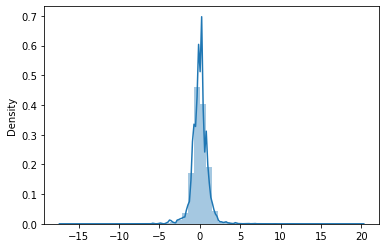

In [99]:
print('For the train dataset-')
print('\tThe mean is ',x.mean())
print('\tThe Std. is ',x.std())
print('\n\tThe distribution plot is-',sns.distplot(x))

##### For Data Set

In [100]:
pt=PowerTransformer(method='yeo-johnson')
x1=pt.fit_transform(df4)
x1

array([[-0.28316498,  0.98225286,  0.84265563, ...,  0.        ,
         0.31891002,  0.01281114],
       [-0.28316498,  0.0357901 , -0.73910444, ...,  0.        ,
         0.66106266, -2.55481962],
       [-0.28316498,  0.0357901 ,  0.52430357, ...,  0.        ,
        -0.03386305,  0.01281114],
       ...,
       [-0.28316498,  0.0357901 ,  0.4322536 , ...,  0.        ,
        -1.17947548,  0.01281114],
       [ 1.7993534 , -0.80954055, -1.00670344, ...,  0.        ,
         1.31899998,  0.01281114],
       [ 1.7993534 , -2.49342934, -2.67127038, ...,  0.        ,
        -0.03386305,  0.01281114]])

In [101]:
x1=sc.fit_transform(df4)
x1

array([[-0.28700579,  0.98160499,  0.2638941 , ...,  0.        ,
         0.27695974,  0.14865423],
       [-0.28700579,  0.        , -0.36303034, ...,  0.        ,
         0.63799655, -3.32390858],
       [-0.28700579,  0.        ,  0.08963571, ...,  0.        ,
        -0.08407707,  0.14865423],
       ...,
       [-0.28700579,  0.        ,  0.04477488, ...,  0.        ,
        -1.16718749,  0.14865423],
       [ 1.80813647, -0.8236549 , -0.42419737, ...,  0.        ,
         1.36007017,  0.14865423],
       [ 1.80813647, -2.27789203, -0.65316043, ...,  0.        ,
        -0.08407707,  0.14865423]])

For the test dataset-
	The mean is  -1.2828278218869498e-16
	The Std. is  0.9920317455237933

	The distribution plot is- AxesSubplot(0.125,0.125;0.775x0.755)


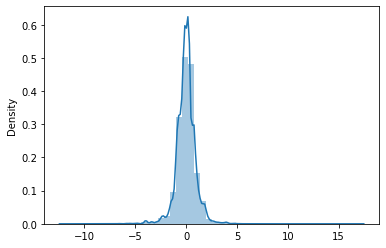

In [102]:
print('For the test dataset-')
print('\tThe mean is ',x1.mean())
print('\tThe Std. is ',x1.std())
print('\n\tThe distribution plot is-',sns.distplot(x1))

##### Using Principle Component Analysis(PCA) for Train and Test Dataset

In [103]:
from sklearn.decomposition import PCA


#for train
pca=PCA(n_components=10)
x_train=pca.fit_transform(x)
x_train

array([[-0.59240918, -1.11859489, -0.52129621, ..., -0.91414883,
         0.67678255, -0.32134662],
       [ 3.15115632,  1.97071918,  3.91485646, ..., -1.76002764,
         1.13808095,  1.19284885],
       [ 2.7930722 ,  0.39139439,  0.13587201, ...,  0.44809947,
         0.50543925, -0.85017453],
       ...,
       [-0.94187872,  0.31797644, -0.94046279, ..., -0.62295834,
         0.34644879, -0.20036817],
       [-6.34938188,  3.49929409, -0.32535192, ..., -1.353474  ,
        -0.83763434,  0.64298837],
       [ 2.15115687, -0.54470698, -1.98853434, ...,  0.59471959,
         0.80034585, -0.24104736]])

In [104]:
#target variable
y=df3['SalePrice']
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [105]:
y_train=y
y_train

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [106]:
print(x_train.shape)
print(y_train.shape)

(1168, 10)
(1168,)


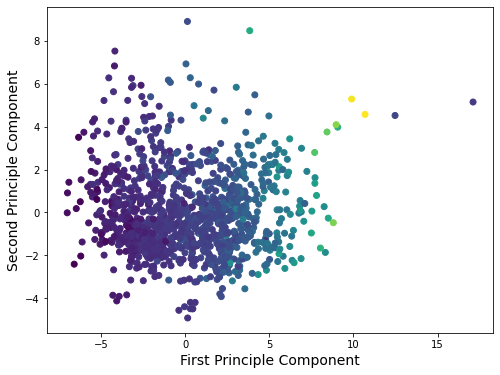

In [107]:
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0:1],x_train[:,1:2],c=y_train)
plt.xlabel('First Principle Component',fontsize=14)
plt.ylabel('Second Principle Component',fontsize=14)
plt.show()

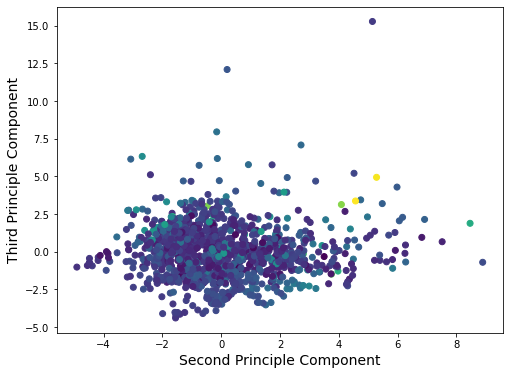

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,1],x_train[:,2],c=y_train)
plt.xlabel('Second Principle Component',fontsize=14)
plt.ylabel('Third Principle Component',fontsize=14)
plt.show()

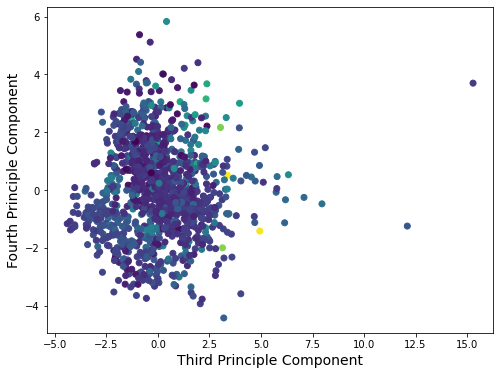

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,2],x_train[:,3],c=y_train)
plt.xlabel('Third Principle Component',fontsize=14)
plt.ylabel('Fourth Principle Component',fontsize=14)
plt.show()

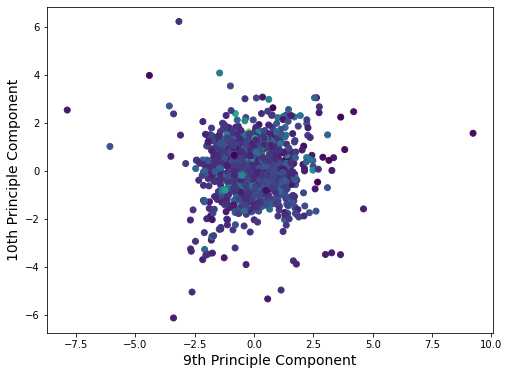

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,8],x_train[:,9],c=y_train)
plt.xlabel('9th Principle Component',fontsize=14)
plt.ylabel('10th Principle Component',fontsize=14)
plt.show()

#### Above diagrams tells us that our feature variables are distributed and mixed well

In [111]:
#test
pca=PCA(n_components=10)
x_test=pca.fit_transform(x1)
x_test

array([[ 6.13032757, -1.83181689,  1.9218913 , ..., -0.23712397,
        -0.85183501,  0.19371559],
       [ 0.83451244, -3.74190522,  1.74654096, ...,  0.10266796,
        -0.58027472,  1.79210015],
       [ 4.02759014, -0.57092157, -0.39765779, ..., -0.92044726,
         0.74327625, -1.4158022 ],
       ...,
       [-0.44752737, -1.79280979,  0.01192152, ..., -0.95316858,
        -0.19535689, -0.69184346],
       [-2.32117158,  1.74332141,  0.73217279, ..., -0.5729049 ,
        -0.57943614, -0.63930388],
       [-3.93743987,  0.46144997, -2.2001838 , ..., -0.69678247,
         1.06009126,  0.33575053]])

In [112]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(1168, 10)
(1168,)
(292, 10)


##### Training and Testing the Model's

In [113]:
#importing machine learning libraries for regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr=LinearRegression()

In [114]:
lr.fit(x_train,y_train)           #training the model
train_pred=lr.predict(x_train)    #predicting the y_train
y_test=lr.predict(x_test)         #predicting the y_test
print(f'Training Accuracy of Linear Regression model is {r2_score(train_pred,y_train)}')

Training Accuracy of Linear Regression model is 0.7350854489584229


#### Finding Out CV Score

In [115]:
from sklearn.model_selection import cross_val_score


for n in range(2,12):
    cvscore=cross_val_score(lr,x_train,y_train,cv=n)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {n} The CV Score of Linear Regression Model is {mean*100} and Standard Deviation is {std}')
    print('\n')

At K-Fold 2 The CV Score of Linear Regression Model is 76.87446648577449 and Standard Deviation is 0.03826379767383864


At K-Fold 3 The CV Score of Linear Regression Model is 77.35698936694493 and Standard Deviation is 0.05428683585569994


At K-Fold 4 The CV Score of Linear Regression Model is 77.72511036937317 and Standard Deviation is 0.06250244046269353


At K-Fold 5 The CV Score of Linear Regression Model is 77.27547818213341 and Standard Deviation is 0.09168698918115452


At K-Fold 6 The CV Score of Linear Regression Model is 77.8327927183069 and Standard Deviation is 0.09185160051448409


At K-Fold 7 The CV Score of Linear Regression Model is 75.17776386592544 and Standard Deviation is 0.14790834456842514


At K-Fold 8 The CV Score of Linear Regression Model is 78.092517196061 and Standard Deviation is 0.10732590225082735


At K-Fold 9 The CV Score of Linear Regression Model is 75.00331860652364 and Standard Deviation is 0.19980710567902873


At K-Fold 10 The CV Score of Linear

In [116]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
en=ElasticNet()
sgd=SGDRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [117]:
#creating a definition to expand the model individually
def model(m):
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    y_test=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {round(r2_score(train_pred,y_train)*100,2)}')
    cvscore=cross_val_score(m,x_train,y_train,cv=8)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'\nAt K-Fold {8} The CV Score the Model "{m}" is {mean*100} and Standard Deviation is {std}')
    print('\n')    

In [118]:
model(ls)

Training Accuracy of model Lasso() is 73.51

At K-Fold 8 The CV Score the Model "Lasso()" is 78.09257695160818 and Standard Deviation is 0.10732365232560241




In [119]:
model(rd)

Training Accuracy of model Ridge() is 73.5

At K-Fold 8 The CV Score the Model "Ridge()" is 78.09346512754887 and Standard Deviation is 0.10729325531693598




In [120]:
model(en)

Training Accuracy of model ElasticNet() is 69.84

At K-Fold 8 The CV Score the Model "ElasticNet()" is 78.09285563693231 and Standard Deviation is 0.09340823047496633




In [121]:
model(sgd)

Training Accuracy of model SGDRegressor() is 73.16

At K-Fold 8 The CV Score the Model "SGDRegressor()" is 77.25807463807352 and Standard Deviation is 0.11929973273722638




In [122]:
model(rf)

Training Accuracy of model RandomForestRegressor() is 97.09

At K-Fold 8 The CV Score the Model "RandomForestRegressor()" is 82.21360261735333 and Standard Deviation is 0.06370234334577668




In [123]:
model(ad)

Training Accuracy of model AdaBoostRegressor() is 84.11

At K-Fold 8 The CV Score the Model "AdaBoostRegressor()" is 76.41121055214313 and Standard Deviation is 0.08123177132125764




In [124]:
model(grd)

Training Accuracy of model GradientBoostingRegressor() is 94.55

At K-Fold 8 The CV Score the Model "GradientBoostingRegressor()" is 81.31081665257143 and Standard Deviation is 0.08786958512256511




##### Hyper Parameter Tuning
To make the model more accurate by providing their best parameters

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
#defining all the parameters of the respective models
dict_ls={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rd={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict_en={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict_ad={'loss':['linear', 'square', 'exponential']}
dict_grd={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}
dict_sgd={'alpha':[.0001,.001,.01,.1,1,10],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant', 'optimal', 'invscaling','adaptive'],'loss':['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive']}

In [127]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    grd=GridSearchCV(machine,dictionary)
    grd.fit(x_train,y_train)
    print(f'The best Parameters of the model {machine} are {grd.best_params_}')

In [128]:
HPT(ls,dict_ls)

The best Parameters of the model Lasso() are {'alpha': 10, 'selection': 'cyclic'}


In [129]:
HPT(rd,dict_rd)

The best Parameters of the model Ridge() are {'alpha': 10, 'solver': 'saga'}


In [130]:
HPT(en,dict_en)

The best Parameters of the model ElasticNet() are {'alpha': 0.1, 'selection': 'cyclic'}


In [135]:
#Redefining the models after getting the parameters
ls=Lasso(alpha=10,selection='cyclic')
rd=Ridge(alpha=10,solver='saga')
en=ElasticNet(alpha=1,selection='random')
rf=RandomForestRegressor(criterion='poisson',max_features=None)
ad=AdaBoostRegressor(loss='exponential')
grd=GradientBoostingRegressor(criterion='mse',loss='huber',max_features='auto')
sgd=SGDRegressor(alpha=1,learning_rate='invscaling',penalty='elasticnet',loss='squared_epsilon_insensitive')
model(ls)

Training Accuracy of model Lasso(alpha=10) is 73.5

At K-Fold 8 The CV Score the Model "Lasso(alpha=10)" is 78.09311091836655 and Standard Deviation is 0.10730365292678912




In [139]:
model(ls)

Training Accuracy of model Lasso(alpha=10) is 73.5

At K-Fold 8 The CV Score the Model "Lasso(alpha=10)" is 78.09311091836655 and Standard Deviation is 0.10730365292678912




In [140]:
model(rd)

Training Accuracy of model Ridge(alpha=10, solver='saga') is 73.44

At K-Fold 8 The CV Score the Model "Ridge(alpha=10, solver='saga')" is 78.10366921323285 and Standard Deviation is 0.1069607765184355




In [141]:
model(en)

Training Accuracy of model ElasticNet(alpha=1, selection='random') is 69.84

At K-Fold 8 The CV Score the Model "ElasticNet(alpha=1, selection='random')" is 78.0928519234855 and Standard Deviation is 0.09340833001488338




In [142]:
model(sgd)

Training Accuracy of model SGDRegressor(alpha=1, loss='squared_epsilon_insensitive', penalty='elasticnet') is 75.93

At K-Fold 8 The CV Score the Model "SGDRegressor(alpha=1, loss='squared_epsilon_insensitive', penalty='elasticnet')" is 73.1178631484152 and Standard Deviation is 0.12245194828305979




In [146]:
model(rf)

Training Accuracy of model RandomForestRegressor(criterion='poisson', max_features=None) is 96.24

At K-Fold 8 The CV Score the Model "RandomForestRegressor(criterion='poisson', max_features=None)" is 76.83258893524068 and Standard Deviation is 0.07515631285459871




In [145]:
model(ad)

Training Accuracy of model AdaBoostRegressor(loss='exponential') is 84.22

At K-Fold 8 The CV Score the Model "AdaBoostRegressor(loss='exponential')" is 76.63822575987919 and Standard Deviation is 0.08246173577121702




In [147]:
model(grd)

Training Accuracy of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='auto') is 93.03

At K-Fold 8 The CV Score the Model "GradientBoostingRegressor(criterion='mse', loss='huber', max_features='auto')" is 84.57906375661395 and Standard Deviation is 0.050749955428698285




#### Saving the Best Model
3rd Best Model (AdaBoostRegressor)

In [148]:
import joblib
file='house_ad.obj'
joblib.dump(ad,file)

['house_ad.obj']

##### Loading the Model

In [150]:
c=joblib.load('house_ad.obj')
c

AdaBoostRegressor(loss='exponential')

##### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [151]:
#making prediction
pred2=c.predict(x_test)
pred2

array([379286.36986301, 214674.99175824, 254019.40298507, 160556.56969697,
       250778.93532338, 107860.21818182, 167856.79750779, 357686.65853659,
       282709.91381872, 225411.19897959, 105580.28421053, 150877.49848943,
       137309.86120996, 236055.12643678, 379286.36986301, 113836.56756757,
       137309.86120996, 136740.59744409, 214661.47031963, 205993.46125461,
       150877.49848943, 167856.79750779, 158510.31      , 114205.89130435,
       105580.28421053, 150877.49848943, 203495.83979328, 158510.31      ,
       174349.81451613, 105580.28421053, 167224.00574713, 225411.19897959,
       247560.87555556, 168419.71957672, 105580.28421053, 192262.47931034,
       216697.37241379, 136740.59744409, 168419.71957672, 160633.3343465 ,
       113836.56756757, 268149.95918367, 216697.37241379, 214661.47031963,
       167856.79750779, 113836.56756757, 113836.56756757, 107860.21818182,
       233904.71563981, 377482.59677419, 150877.49848943, 226102.21813725,
       102652.09433962, 1

In [152]:
#Testing Accuracy of AdaBoostRegressor
accuracy_score=round(r2_score(pred2,y_test)*100,2)
accuracy_score

82.24

<AxesSubplot:ylabel='Density'>

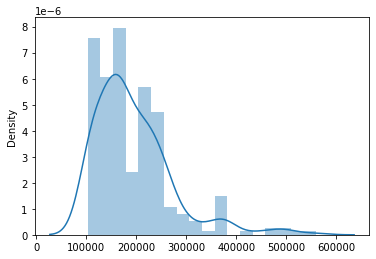

In [153]:
#plotting distribution plot to check normal distribution
sns.distplot(pred2)

Text(0.5, 1.0, 'Best Fitted Line')

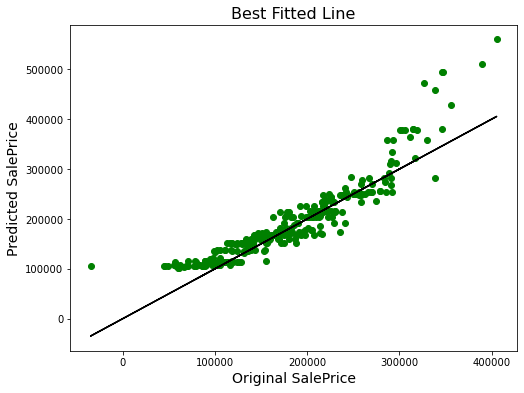

In [154]:
#Plotting Best-Fitted Line
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred2,color='GREEN')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Original SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('Best Fitted Line',fontsize=16)

In [155]:
df_ad=pd.DataFrame(data=([pred2,y_test]),index=['Predicted SalePrice','Original SalePrice'])
df_ad

0              1              2    \
Predicted SalePrice  379286.369863  214674.991758  254019.402985   
Original SalePrice   314796.068439  178273.931631  269272.231661   

                               3              4              5    \
Predicted SalePrice  160556.569697  250778.935323  107860.218182   
Original SalePrice   154610.653130  254084.866267   55556.924369   

                               6              7              8    \
Predicted SalePrice  167856.797508  357686.658537  282709.913819   
Original SalePrice   142340.035493  286646.833612  267216.476017   

                               9              10             11   \
Predicted SalePrice  225411.198980  105580.284211  150877.498489   
Original SalePrice   192812.940311  -34430.952435  130940.216896   

                               12             13             14   \
Predicted SalePrice  137309.861210  236055.126437  379286.369863   
Original SalePrice   139064.629977  274736.672415  315032.390357   

                               15             16             17   \
Predicted SalePrice  113836.567568  137309.861210  136740.597444   
Original SalePrice   123718.545560  110999.853094  118179.789799   

                               18             19             20   \
Predicted SalePrice  214661.470320  205993.461255  150877.498489   
Original SalePrice   179714.450838  176721.887755  128092.462487   

                               21             22             23   \
Predicted SalePrice  167856.797508  158510.310000  114205.891304   
Original SalePrice   168304.467063  158843.740505  119538.568626   

                               24             25             26   \
Predicted SalePrice  105580.284211  150877.498489  203495.839793   
Original SalePrice    68566.945601  117435.500361  198348.199354   

                              27             28             29   \
Predicted SalePrice  158510.31000  174349.814516  105580.284211   
Original SalePrice   150592.54656  191266.017949   79841.465676   

                               30             31             32   \
Predicted SalePrice  167224.005747  225411.198980  247560.875556   
Original SalePrice   179675.606256  198493.731177  257966.742451   

                               33             34             35   \
Predicted SalePrice  168419.719577  105580.284211  192262.479310   
Original SalePrice   193685.572916   45606.806492  189573.636805   

                               36             37             38   \
Predicted SalePrice  216697.372414  136740.597444  168419.719577   
Original SalePrice   207296.322877   98698.198299  156222.710070   

                               39             40             41   \
Predicted SalePrice  160633.334347  113836.567568  268149.959184   
Original SalePrice   143655.813692   89052.334843  290767.983373   

                               42             43             44   \
Predicted SalePrice  216697.372414  214661.470320  167856.797508   
Original SalePrice   222852.744622  206333.281971  147638.502042   

                               45             46             47   \
Predicted SalePrice  113836.567568  113836.567568  107860.218182   
Original SalePrice   128740.301451  113996.338951   89080.560090   

                               48             49             50   \
Predicted SalePrice  233904.715640  377482.596774  150877.498489   
Original SalePrice   215670.089764  300838.229914  157073.054707   

                               51             52             53   \
Predicted SalePrice  226102.218137  102652.094340  105580.284211   
Original SalePrice   217101.022703   61492.906743   61771.369323   

                               54             55             56   \
Predicted SalePrice  256425.410405  137309.861210  148805.042289   
Original SalePrice   278923.494766  106053.483983  136862.447981   

                               57             58             59   \
Predicted SalePrice  216697.372414  150877.498489  254019.402985   
Ori

#### 2nd Best Model (RandomForestRegressor)

In [156]:
import joblib
file='house_rf.obj'
joblib.dump(rf,file)

['house_rf.obj']

##### Loading the Model

In [157]:
a=joblib.load('house_rf.obj')
a

RandomForestRegressor(criterion='poisson', max_features=None)

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [158]:
#making prediction
pred=a.predict(x_test)
pred

array([361369.72, 182477.  , 257569.45, 136950.84, 255973.58, 116060.5 ,
       168605.  , 326637.94, 259991.46, 179566.56, 155552.24, 140877.58,
       188920.6 , 307135.4 , 349708.78, 108772.44, 127544.5 , 128407.75,
       194016.34, 188741.57, 137520.42, 160292.5 , 144509.8 , 148705.  ,
       103136.37, 131551.84, 184776.4 , 139702.  , 173550.5 , 107141.26,
       175805.5 , 188833.77, 242920.26, 225920.94, 113793.76, 170144.  ,
       196355.32, 122373.  , 169512.5 , 156602.  ,  99910.14, 283792.9 ,
       205541.5 , 190752.9 , 162787.5 , 103112.13, 120815.32, 108984.76,
       218693.91, 368159.98, 135620.63, 213736.24, 132651.08, 121320.51,
       302824.02, 133381.5 , 124376.5 , 187731.1 , 222320.4 , 270441.05,
       116424.5 , 190353.32, 130767.2 , 146216.52, 242608.5 , 117254.91,
       158391.62, 194719.1 , 171119.  , 152788.37, 291272.74, 261203.12,
       151275.78, 198566.5 , 158663.9 , 230486.53, 327532.47, 189162.7 ,
       300786.18, 147701.56, 222209.79, 133610.25, 

In [159]:
#Testing Accuracy of RandomForestRegressor
accuracy_score=round(r2_score(pred,y_test)*100,2)
accuracy_score

78.41

<AxesSubplot:ylabel='Density'>

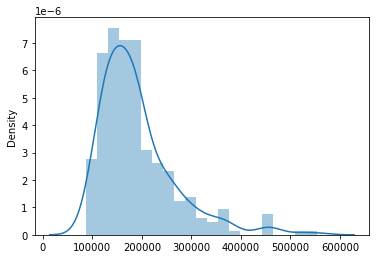

In [160]:
#plotting distribution plot to check normal distribution
sns.distplot(pred)

Text(0.5, 1.0, 'Best Fitted Line')

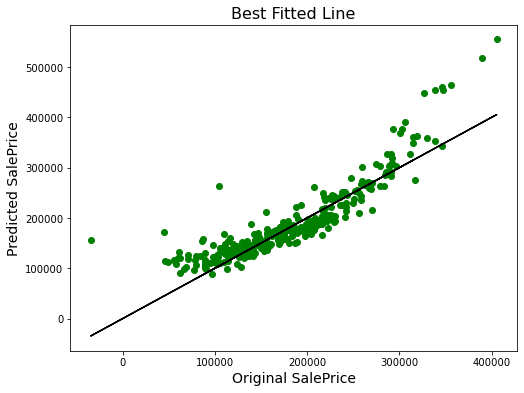

In [161]:
#Plotting Best-Fitted Line
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='GREEN')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Original SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('Best Fitted Line',fontsize=16)

In [162]:
df_rf=pd.DataFrame(data=([pred,y_test]),index=['Predicted SalePrice','Original SalePrice'])
df_rf

0              1              2    \
Predicted SalePrice  361369.720000  182477.000000  257569.450000   
Original SalePrice   314796.068439  178273.931631  269272.231661   

                              3              4              5    \
Predicted SalePrice  136950.84000  255973.580000  116060.500000   
Original SalePrice   154610.65313  254084.866267   55556.924369   

                               6              7              8    \
Predicted SalePrice  168605.000000  326637.940000  259991.460000   
Original SalePrice   142340.035493  286646.833612  267216.476017   

                               9              10             11   \
Predicted SalePrice  179566.560000  155552.240000  140877.580000   
Original SalePrice   192812.940311  -34430.952435  130940.216896   

                               12             13             14   \
Predicted SalePrice  188920.600000  307135.400000  349708.780000   
Original SalePrice   139064.629977  274736.672415  315032.390357   

                              15             16             17   \
Predicted SalePrice  108772.44000  127544.500000  128407.750000   
Original SalePrice   123718.54556  110999.853094  118179.789799   

                               18             19             20   \
Predicted SalePrice  194016.340000  188741.570000  137520.420000   
Original SalePrice   179714.450838  176721.887755  128092.462487   

                               21             22             23   \
Predicted SalePrice  160292.500000  144509.800000  148705.000000   
Original SalePrice   168304.467063  158843.740505  119538.568626   

                               24             25             26   \
Predicted SalePrice  103136.370000  131551.840000  184776.400000   
Original SalePrice    68566.945601  117435.500361  198348.199354   

                              27             28             29   \
Predicted SalePrice  139702.00000  173550.500000  107141.260000   
Original SalePrice   150592.54656  191266.017949   79841.465676   

                               30             31             32   \
Predicted SalePrice  175805.500000  188833.770000  242920.260000   
Original SalePrice   179675.606256  198493.731177  257966.742451   

                               33             34             35   \
Predicted SalePrice  225920.940000  113793.760000  170144.000000   
Original SalePrice   193685.572916   45606.806492  189573.636805   

                               36             37            38   \
Predicted SalePrice  196355.320000  122373.000000  169512.50000   
Original SalePrice   207296.322877   98698.198299  156222.71007   

                               39            40             41   \
Predicted SalePrice  156602.000000  99910.140000  283792.900000   
Original SalePrice   143655.813692  89052.334843  290767.983373   

                               42             43             44   \
Predicted SalePrice  205541.500000  190752.900000  162787.500000   
Original SalePrice   222852.744622  206333.281971  147638.502042   

                               45             46            47   \
Predicted SalePrice  103112.130000  120815.320000  108984.76000   
Original SalePrice   128740.301451  113996.338951   89080.56009   

                               48             49             50   \
Predicted SalePrice  218693.910000  368159.980000  135620.630000   
Original SalePrice   215670.089764  300838.229914  157073.054707   

                               51             52             53   \
Predicted SalePrice  213736.240000  132651.080000  121320.510000   
Original SalePrice   217101.022703   61492.906743   61771.369323   

                               54             55             56   \
Predicted SalePrice  302824.020000  133381.500000  124376.500000   
Original SalePrice   278923.494766  106053.483983  136862.447981   

                               57            58             59   \
Predicted SalePrice  187731.100000  222320.40000  270441.050000   
Original SalePrice  

#### 1st Best Model (GradientBoostingRegressor)

In [163]:
import joblib
file='house_grd.obj'
joblib.dump(grd,file)

['house_grd.obj']

In [164]:
b=joblib.load('house_grd.obj')
b

GradientBoostingRegressor(criterion='mse', loss='huber', max_features='auto')

##### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [165]:
#making prediction
pred1=b.predict(x_test)
pred1

array([364190.47529973, 181530.52976353, 249008.41873447, 153121.80573558,
       254259.71439826,  99224.37594264, 149268.26541758, 337703.8575128 ,
       275663.73092717, 180947.57234271,  45471.83164495, 140264.90289044,
       128547.49588472, 241032.21164371, 334027.08718458, 119646.23218025,
       123735.99608366, 125417.19083715, 177831.18821599, 173505.58695542,
       138705.83273268, 160158.75329364, 149482.35491869, 122510.2861994 ,
        97164.99009062, 129400.22908714, 187500.37796448, 145159.01989115,
       182647.01766498,  83782.34619289, 168509.05771824, 185696.27523255,
       230160.45119533, 172784.61195428,  82979.06136167, 179898.09455262,
       189129.22066946, 124146.0594946 , 165901.26383781, 152985.62612894,
       102339.62159971, 295789.43547878, 200564.23045068, 181785.87263673,
       148240.19721438, 117229.2801779 , 121835.13469601,  92120.37495327,
       202186.39363544, 359605.48620678, 141626.06207816, 211543.21486116,
       103873.93904594,  

In [166]:
#Testing Accuracy of GradientBoostingRegressor
accuracy_score=round(r2_score(pred1,y_test)*100,2)
accuracy_score

89.02

<AxesSubplot:ylabel='Density'>

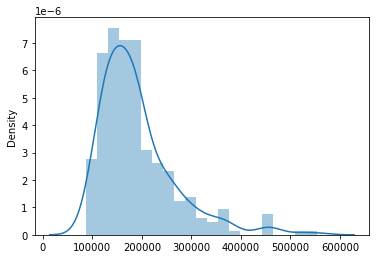

In [167]:
#plotting distribution plot to check normal distribution
sns.distplot(pred)

Text(0.5, 1.0, 'Best Fitted Line')

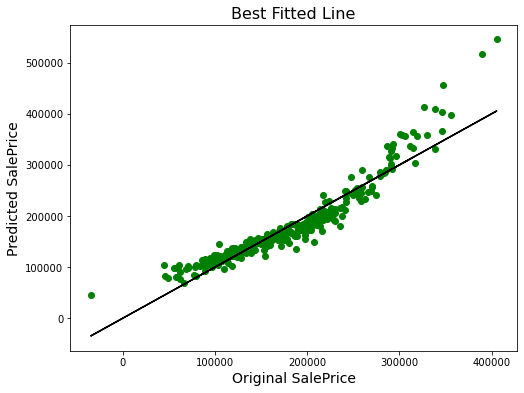

In [168]:
#Plotting Best-Fitted Line
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred1,color='GREEN')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Original SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('Best Fitted Line',fontsize=16)

In [169]:
df_grd=pd.DataFrame(data=([pred1,y_test]),index=['Predicted SalePrice','Original SalePrice'])
df_grd

0              1              2    \
Predicted SalePrice  364190.475300  181530.529764  249008.418734   
Original SalePrice   314796.068439  178273.931631  269272.231661   

                               3              4             5    \
Predicted SalePrice  153121.805736  254259.714398  99224.375943   
Original SalePrice   154610.653130  254084.866267  55556.924369   

                               6              7              8    \
Predicted SalePrice  149268.265418  337703.857513  275663.730927   
Original SalePrice   142340.035493  286646.833612  267216.476017   

                               9             10             11   \
Predicted SalePrice  180947.572343  45471.831645  140264.902890   
Original SalePrice   192812.940311 -34430.952435  130940.216896   

                               12             13             14   \
Predicted SalePrice  128547.495885  241032.211644  334027.087185   
Original SalePrice   139064.629977  274736.672415  315032.390357   

                              15             16             17   \
Predicted SalePrice  119646.23218  123735.996084  125417.190837   
Original SalePrice   123718.54556  110999.853094  118179.789799   

                               18             19             20   \
Predicted SalePrice  177831.188216  173505.586955  138705.832733   
Original SalePrice   179714.450838  176721.887755  128092.462487   

                               21             22             23   \
Predicted SalePrice  160158.753294  149482.354919  122510.286199   
Original SalePrice   168304.467063  158843.740505  119538.568626   

                              24             25             26   \
Predicted SalePrice  97164.990091  129400.229087  187500.377964   
Original SalePrice   68566.945601  117435.500361  198348.199354   

                               27             28            29   \
Predicted SalePrice  145159.019891  182647.017665  83782.346193   
Original SalePrice   150592.546560  191266.017949  79841.465676   

                               30             31             32   \
Predicted SalePrice  168509.057718  185696.275233  230160.451195   
Original SalePrice   179675.606256  198493.731177  257966.742451   

                               33            34             35   \
Predicted SalePrice  172784.611954  82979.061362  179898.094553   
Original SalePrice   193685.572916  45606.806492  189573.636805   

                               36             37             38   \
Predicted SalePrice  189129.220669  124146.059495  165901.263838   
Original SalePrice   207296.322877   98698.198299  156222.710070   

                               39             40             41   \
Predicted SalePrice  152985.626129  102339.621600  295789.435479   
Original SalePrice   143655.813692   89052.334843  290767.983373   

                               42             43             44   \
Predicted SalePrice  200564.230451  181785.872637  148240.197214   
Original SalePrice   222852.744622  206333.281971  147638.502042   

                               45             46            47   \
Predicted SalePrice  117229.280178  121835.134696  92120.374953   
Original SalePrice   128740.301451  113996.338951  89080.560090   

                               48             49             50   \
Predicted SalePrice  202186.393635  359605.486207  141626.062078   
Original SalePrice   215670.089764  300838.229914  157073.054707   

                               51             52            53   \
Predicted SalePrice  211543.214861  103873.939046  77824.918247   
Original SalePrice   217101.022703   61492.906743  61771.369323   

                               54             55             56   \
Predicted SalePrice  286494.429315  122110.546809  138701.348247   
Original SalePrice   278923.494766  106053.483983  136862.447981   

                               57             58             59   \
Predicted SalePrice  195085.488563  136254.373513  258981.059465   
Original SalePrice   213

### Conclusion
I have tested out the prediction over the best three models.Out of the three, GradientBoostingRegressor is the top model as it giving the testing accuracy as almost 89% which is higher than that of RandomForestRegressor as well as AdaBoostRegressor which are giving testing accuracy as 87% and 82% respectively.Also RandomForestRegressor and GradientBoostingRegressor training accuracy is more than 93% as well and it indicates that biasness and variance are optimal and model is regularized as well. Hence GradientBoostingRegressor is my top accurate model in predicting the SalePrice of the house.Also as you can see in the original and predicted SalePrice row,almost all the corresponding data's are equal mostly for gradientboosting and randomforest model and the best fit line is containing the most data points as well and the distribution is normal distribution

##### Also, kindly find the attributes those are really important while selling the houses at higher prices are given below-
OverallQual-Rates the overall material and finish of the house

GrLivArea- Above grade (ground) living area square feet

GarageCars- Size of garage in car capacity

GarageArea- Size of garage in square feet

TotalBsmtSF- Total square feet of basement area

1stFlrSF- First Floor square feet

FullBath-Full bathrooms above grade

TotRmsAbvGrd-Total rooms above grade (does not include bathrooms)

YearBuilt-Original construction date

YearRemodAdd-Remodel date (same as construction date if no remodeling or additions)

MasVnrArea-Masonry veneer area in square feet

Fireplaces-Number of fireplaces

GarageYrBlt-Year garage was built

Foundation-Type of foundation

WoodDeckSF-Wood deck area in square feet

LotFrontage-Linear feet of street connected to property

2ndFlrSF-Second floor square feet

OpenPorchSF- Open porch area in square feet

BsmtFinSF1-Type 1 finished square feet